# Projet 2 : Analysez des données de systèmes éducatifs
Date début : 02/10/2024

## Importation des librairies utiles

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import colormaps
from matplotlib import colors
from matplotlib.lines import Line2D
%matplotlib inline

import math

from sklearn.preprocessing import StandardScaler

## Importation des données

### Définition des chemins et fichiers et direction de l'espace de travail

In [2]:
data_folder = "D:/GoogleDrive/Mon Drive/formations/OpenClassrooms/P2/"
file_prefix = "EdStats"
file_sufix = ".csv"
os.chdir(os.path.dirname(data_folder))

### Lecture des 5 fichiers csv

In [3]:
data = pd.read_csv(file_prefix+"Data"+file_sufix, encoding = 'utf-8-sig')
country = pd.read_csv(file_prefix+"Country"+file_sufix, encoding = 'utf-8-sig')
series = pd.read_csv(file_prefix+"Series"+file_sufix, encoding = 'utf-8-sig')
country_series = pd.read_csv(file_prefix+"Country-Series"+file_sufix, encoding = 'utf-8-sig')
footNote = pd.read_csv(file_prefix+"FootNote"+file_sufix, encoding = 'utf-8-sig')

### Traitement des colonnes

#### Liste des colonnes avant traitement

In [4]:
print("data : ")
print(data.columns)
print("country : ")
print(country.columns)
print("series : ")
print(series.columns)
print("country_series : ")
print(country_series.columns)
print("footNote : ")
print(footNote.columns)

data : 
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')
country : 
Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other g

#### Conversion des noms de colonnes pour supprimer les guillemets

In [5]:
data.columns = data.columns.str.replace('\"', '')
country.columns = country.columns.str.replace('\"', '')
series.columns = series.columns.str.replace('\"', '')
country_series.columns = country_series.columns.str.replace('\"', '')
footNote.columns = footNote.columns.str.replace('\"', '')

#### Suppression des dernières colonnes "unnamed"

In [6]:
data = data.iloc[:,:-1]
country = country.iloc[:,:-1]
series = series.iloc[:,:-1]
country_series = country_series.iloc[:,:-1]
footNote = footNote.iloc[:,:-1]

#### Liste des colonnes après traitement

In [7]:
print("data : ")
print(data.columns)
print("country : ")
print(country.columns)
print("series : ")
print(series.columns)
print("country_series : ")
print(country_series.columns)
print("footNote : ")
print(footNote.columns)

data : 
Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100'],
      dtype='object')
country : 
Index(['Country Code', 'Short Name', 'Table Name', 'Long Name', '2-alpha code',
       'Currency Unit', 'Special Notes', 'Region', 'Income Group', 'WB-2 code',
       'National accounts base year', 'National accounts reference year',
       'SNA price valuation', 'Lending category', 'Other groups',
       

## Premier aperçu des données

### Dimensions

In [8]:
data_dim = data.shape
country_dim = country.shape
series_dim = series.shape
country_series_dim = country_series.shape
footNote_dim = footNote.shape

print("Dimension du dataframe data : lignes %i, colonnes %i" %(data_dim[0], data_dim[1]))
print("Dimension du dataframe country : lignes %i, colonnes %i" %(country_dim[0], country_dim[1]))
print("Dimension du dataframe series : lignes %i, colonnes %i" %(series_dim[0], series_dim[1]))
print("Dimension du dataframe country_series : lignes %i, colonnes %i" %(country_series_dim[0], country_series_dim[1]))
print("Dimension du dataframe footNote : lignes %i, colonnes %i" %(footNote_dim[0], footNote_dim[1]))

Dimension du dataframe data : lignes 886930, colonnes 69
Dimension du dataframe country : lignes 241, colonnes 31
Dimension du dataframe series : lignes 3665, colonnes 20
Dimension du dataframe country_series : lignes 613, colonnes 3
Dimension du dataframe footNote : lignes 643638, colonnes 4


In [9]:
data.dtypes.values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype

In [10]:
country.dtypes

Country Code                                          object
Short Name                                            object
Table Name                                            object
Long Name                                             object
2-alpha code                                          object
Currency Unit                                         object
Special Notes                                         object
Region                                                object
Income Group                                          object
WB-2 code                                             object
National accounts base year                           object
National accounts reference year                     float64
SNA price valuation                                   object
Lending category                                      object
Other groups                                          object
System of National Accounts                           object
Alternative conversion f

In [11]:
series.dtypes

Series Code                             object
Topic                                   object
Indicator Name                          object
Short definition                        object
Long definition                         object
Unit of measure                        float64
Periodicity                             object
Base Period                             object
Other notes                             object
Aggregation method                      object
Limitations and exceptions              object
Notes from original source             float64
General comments                        object
Source                                  object
Statistical concept and methodology     object
Development relevance                   object
Related source links                    object
Other web links                        float64
Related indicators                     float64
License Type                           float64
dtype: object

In [12]:
country_series.dtypes

CountryCode    object
SeriesCode     object
DESCRIPTION    object
dtype: object

In [13]:
footNote.dtypes

CountryCode    object
SeriesCode     object
Year           object
DESCRIPTION    object
dtype: object

### VIsualisation des premières (et éventuellement dernières) lignes

#### Data

In [14]:
data.head()

Country Name Country Code  \
0   Arab World          ARB   
1   Arab World          ARB   
2   Arab World          ARB   
3   Arab World          ARB   
4   Arab World          ARB   

                                      Indicator Name  Indicator Code  \
0  Adjusted net enrolment rate, lower secondary, ...      UIS.NERA.2   
1  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.F   
2  Adjusted net enrolment rate, lower secondary, ...  UIS.NERA.2.GPI   
3  Adjusted net enrolment rate, lower secondary, ...    UIS.NERA.2.M   
4  Adjusted net enrolment rate, primary, both sex...     SE.PRM.TENR   

        1970       1971       1972       1973       1974      1975  ...  2055  \
0        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
1        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
2        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
3        NaN        NaN        NaN        NaN        NaN       NaN  ...   NaN   
4  54.822121  54.894138  56.209438  57.267109  57.991138  59.36554  ...   NaN   

   2060  2065  2070  2075  2080  2085  2090  2095  2100  
0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
1   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
3   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
4   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

In [15]:
data.tail()

Country Name Country Code  \
886925     Zimbabwe          ZWE   
886926     Zimbabwe          ZWE   
886927     Zimbabwe          ZWE   
886928     Zimbabwe          ZWE   
886929     Zimbabwe          ZWE   

                                           Indicator Name  \
886925  Youth illiterate population, 15-24 years, male...   
886926  Youth literacy rate, population 15-24 years, b...   
886927  Youth literacy rate, population 15-24 years, f...   
886928  Youth literacy rate, population 15-24 years, g...   
886929  Youth literacy rate, population 15-24 years, m...   

              Indicator Code  1970  1971  1972  1973  1974  1975  ...  2055  \
886925      UIS.LP.AG15T24.M   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886926     SE.ADT.1524.LT.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886927  SE.ADT.1524.LT.FE.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886928  SE.ADT.1524.LT.FM.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   
886929  SE.ADT.1524.LT.MA.ZS   NaN   NaN   NaN   NaN   NaN   NaN  ...   NaN   

        2060  2065  2070  2075  2080  2085  2090  2095  2100  
886925   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886926   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886927   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886928   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
886929   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  

[5 rows x 69 columns]

#### Country

In [16]:
country.head()

Country Code   Short Name   Table Name                     Long Name  \
0          ABW        Aruba        Aruba                         Aruba   
1          AFG  Afghanistan  Afghanistan  Islamic State of Afghanistan   
2          AGO       Angola       Angola   People's Republic of Angola   
3          ALB      Albania      Albania           Republic of Albania   
4          AND      Andorra      Andorra       Principality of Andorra   

  2-alpha code   Currency Unit  \
0           AW   Aruban florin   
1           AF  Afghan afghani   
2           AO  Angolan kwanza   
3           AL    Albanian lek   
4           AD            Euro   

                                       Special Notes  \
0  SNA data for 2000-2011 are updated from offici...   
1  Fiscal year end: March 20; reporting period fo...   
2  April 2013 database update: Based on IMF data,...   
3                                                NaN   
4                                                NaN   

                      Region          Income Group WB-2 code  ...  \
0  Latin America & Caribbean  High income: nonOECD        AW  ...   
1                 South Asia            Low income        AF  ...   
2         Sub-Saharan Africa   Upper middle income        AO  ...   
3      Europe & Central Asia   Upper middle income        AL  ...   
4      Europe & Central Asia  High income: nonOECD        AD  ...   

     Government Accounting concept           IMF data dissemination standard  \
0                              NaN                                       NaN   
1  Consolidated central government  General Data Dissemination System (GDDS)   
2     Budgetary central government  General Data Dissemination System (GDDS)   
3     Budgetary central government  General Data Dissemination System (GDDS)   
4                              NaN                                       NaN   

                            Latest population census  \
0                                               2010   
1                                               1979   
2                                               1970   
3                                               2011   
4  2011. Population figures compiled from adminis...   

                             Latest household survey  \
0                                                NaN   
1  Multiple Indicator Cluster Survey (MICS), 2010/11   
2               Malaria Indicator Survey (MIS), 2011   
3       Demographic and Health Survey (DHS), 2008/09   
4                                                NaN   

   Source of most recent Income and expenditure data  \
0                                                NaN   
1            Integrated household survey (IHS), 2008   
2            Integrated household survey (IHS), 2008   
3  Living Standards Measurement Study Survey (LSM...   
4                                                NaN   

  Vital registration complete Latest agricultural census  \
0                         Yes                        NaN   
1                         NaN                    2013/14   
2                         NaN                       2015   
3                         Yes                       2012   
4                         Yes                        NaN   

  Latest industrial data Latest trade data Latest water withdrawal data  
0                    NaN            2012.0                          NaN  
1                    NaN            2012.0                         2000  
2                    NaN               NaN                         2005  
3                 2010.0            2012.0                         2006  
4                    NaN            2006.0                          NaN  

[5 rows x 31 columns]

#### Series

In [17]:
series.head()

Series Code       Topic  \
0  BAR.NOED.1519.FE.ZS  Attainment   
1     BAR.NOED.1519.ZS  Attainment   
2  BAR.NOED.15UP.FE.ZS  Attainment   
3     BAR.NOED.15UP.ZS  Attainment   
4  BAR.NOED.2024.FE.ZS  Attainment   

                                      Indicator Name  \
0  Barro-Lee: Percentage of female population age...   
1  Barro-Lee: Percentage of population age 15-19 ...   
2  Barro-Lee: Percentage of female population age...   
3  Barro-Lee: Percentage of population age 15+ wi...   
4  Barro-Lee: Percentage of female population age...   

                                    Short definition  \
0  Percentage of female population age 15-19 with...   
1  Percentage of population age 15-19 with no edu...   
2  Percentage of female population age 15+ with n...   
3  Percentage of population age 15+ with no educa...   
4  Percentage of female population age 20-24 with...   

                                     Long definition  Unit of measure  \
0  Percentage of female population age 15-19 with...              NaN   
1  Percentage of population age 15-19 with no edu...              NaN   
2  Percentage of female population age 15+ with n...              NaN   
3  Percentage of population age 15+ with no educa...              NaN   
4  Percentage of female population age 20-24 with...              NaN   

  Periodicity Base Period Other notes Aggregation method  \
0         NaN         NaN         NaN                NaN   
1         NaN         NaN         NaN                NaN   
2         NaN         NaN         NaN                NaN   
3         NaN         NaN         NaN                NaN   
4         NaN         NaN         NaN                NaN   

  Limitations and exceptions  Notes from original source General comments  \
0                        NaN                         NaN              NaN   
1                        NaN                         NaN              NaN   
2                        NaN                         NaN              NaN   
3                        NaN                         NaN              NaN   
4                        NaN                         NaN              NaN   

                                              Source  \
0  Robert J. Barro and Jong-Wha Lee: http://www.b...   
1  Robert J. Barro and Jong-Wha Lee: http://www.b...   
2  Robert J. Barro and Jong-Wha Lee: http://www.b...   
3  Robert J. Barro and Jong-Wha Lee: http://www.b...   
4  Robert J. Barro and Jong-Wha Lee: http://www.b...   

  Statistical concept and methodology Development relevance  \
0                                 NaN                   NaN   
1                                 NaN                   NaN   
2                                 NaN                   NaN   
3                                 NaN                   NaN   
4                                 NaN                   NaN   

  Related source links  Other web links  Related indicators  License Type  
0                  NaN              NaN                 NaN           NaN  
1                  NaN              NaN                 NaN           NaN  
2                  NaN              NaN                 NaN           NaN  
3                  NaN              NaN                 NaN           NaN  
4                  NaN              NaN                 NaN           NaN

#### Country_series

In [18]:
country_series.head()

CountryCode         SeriesCode  \
0         ABW        SP.POP.TOTL   
1         ABW        SP.POP.GROW   
2         AFG        SP.POP.GROW   
3         AFG  NY.GDP.PCAP.PP.CD   
4         AFG        SP.POP.TOTL   

                                         DESCRIPTION  
0  Data sources : United Nations World Population...  
1  Data sources: United Nations World Population ...  
2  Data sources: United Nations World Population ...  
3                 Estimates are based on regression.  
4  Data sources : United Nations World Population...

#### FootNote

In [19]:
footNote.head()

CountryCode      SeriesCode    Year          DESCRIPTION
0         ABW  SE.PRE.ENRL.FE  YR2001  Country estimation.
1         ABW  SE.TER.TCHR.FE  YR2005  Country estimation.
2         ABW  SE.PRE.TCHR.FE  YR2000  Country estimation.
3         ABW  SE.SEC.ENRL.GC  YR2004  Country estimation.
4         ABW     SE.PRE.TCHR  YR2006  Country estimation.

## Analyse de la qualité des DataFrame

### Valeurs manquantes

#### Data

In [20]:
data.isnull().sum()[0:4]

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
dtype: int64

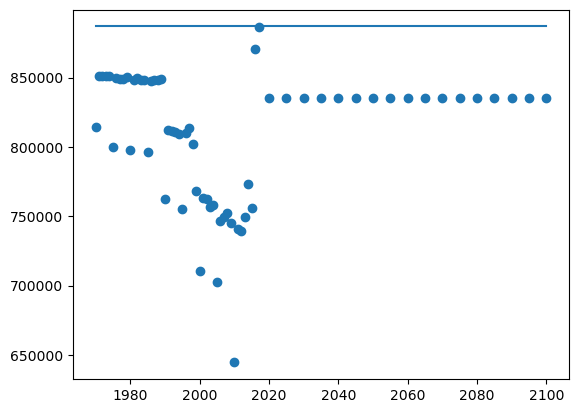

In [21]:
data_isnull = data.isnull().sum()
data_isnull_year = np.zeros((data_dim[1]-4, 2))
data_isnull_year[:,0] = [int(numeric_string) for numeric_string in data_isnull.index[4:].values]
data_isnull_year[:,1] = data_isnull[4:]
plt.scatter(data_isnull_year[:,0], data_isnull_year[:,1])
plt.plot(data_isnull_year[:,0], data_dim[0]*np.ones(((data_dim[1]-4,1))))
plt.show()

#### Sélection des données à partir de l'année 2000

In [22]:
data_2000 = data.drop([str(i) for i in range(1970, 2000)], axis=1)
data_years = [int(numeric_string) for numeric_string in data_2000.columns[4:].values]

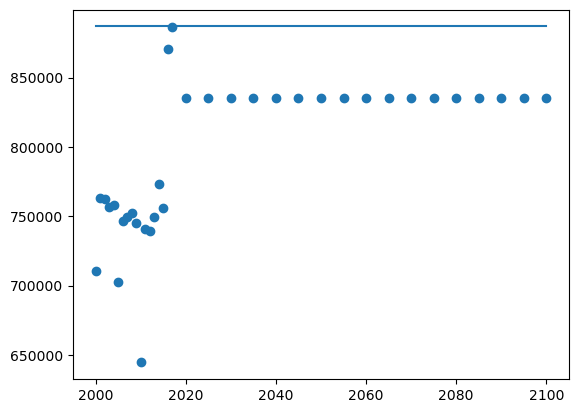

In [23]:
plt.scatter(data_years, data_2000.isnull().sum().values[4:])
plt.plot(data_years, data_2000.shape[0]*np.ones(((len(data_years),1))))
plt.show()

#### Series

In [24]:
print("Nombre de lignes du dataframe series : %i"%series_dim[0])
series.isnull().sum()[series.isnull().sum().values > 3500]

Nombre de lignes du dataframe series : 3665


Unit of measure                        3665
Periodicity                            3566
Aggregation method                     3618
Limitations and exceptions             3651
Notes from original source             3665
General comments                       3651
Statistical concept and methodology    3642
Development relevance                  3662
Other web links                        3665
Related indicators                     3665
License Type                           3665
dtype: int64

In [25]:
series = series.drop(
    ['Unit of measure', 'Notes from original source', 'Other web links', 'Related indicators', 'License Type'],
    axis=1)
series_dim = series.shape

In [26]:
series.dtypes

Series Code                            object
Topic                                  object
Indicator Name                         object
Short definition                       object
Long definition                        object
Periodicity                            object
Base Period                            object
Other notes                            object
Aggregation method                     object
Limitations and exceptions             object
General comments                       object
Source                                 object
Statistical concept and methodology    object
Development relevance                  object
Related source links                   object
dtype: object

#### Country et FootNote

In [27]:
country.isnull().sum()

Country Code                                           0
Short Name                                             0
Table Name                                             0
Long Name                                              0
2-alpha code                                           3
Currency Unit                                         26
Special Notes                                         96
Region                                                27
Income Group                                          27
WB-2 code                                              1
National accounts base year                           36
National accounts reference year                     209
SNA price valuation                                   44
Lending category                                      97
Other groups                                         183
System of National Accounts                           26
Alternative conversion factor                        194
PPP survey year                

In [28]:
country_series.isnull().sum()

CountryCode    0
SeriesCode     0
DESCRIPTION    0
dtype: int64

In [29]:
footNote.isnull().sum()

CountryCode    0
SeriesCode     0
Year           0
DESCRIPTION    0
dtype: int64

### Pays

In [30]:
income_high_array = ['High income: nonOECD', 'High income: OECD']

In [31]:
country_high = country.loc[country['Income Group'].isin(income_high_array)]

#### Fonction de représentation des pays

In [32]:
def plot_repartition_country(country, title):
    fig = plt.figure(figsize=(10,5))

    i = 1
    for string in ['Region', 'Income Group']:
        ax = plt.subplot(1,2,i)
        wedges, texts, autotexts = ax.pie(country[string].value_counts(),
                                          autopct=lambda x:'{:.0f}'.format(x/100*country[string].value_counts().sum()),
                                         pctdistance=1.1)

        if(i==1):
            ax.legend(wedges, country[string].value_counts().index.values, loc="center right", bbox_to_anchor=(0, 0.5))
        else:
            ax.legend(wedges, country[string].value_counts().index.values, loc="center left", bbox_to_anchor=(1, 0.5))
        ax.set_title(string + ' ({:.0f})'.format(country[string].value_counts().values.sum()))
        i=i+1

    fig.suptitle('Nombre de pays : ' + title)
    plt.show()

#### Répartition des pays et concentration sur les pays à hauts revenus

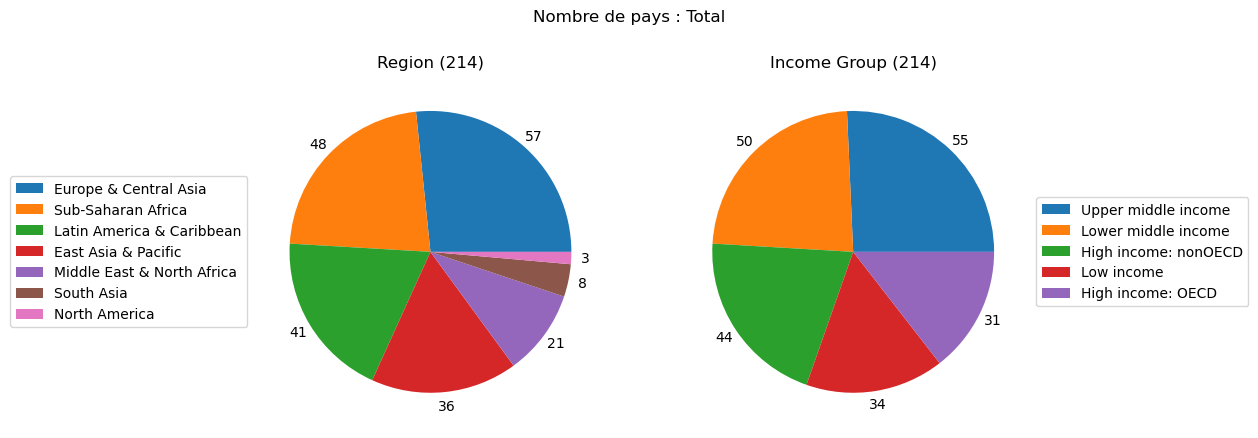

In [33]:
plot_repartition_country(country, 'Total')

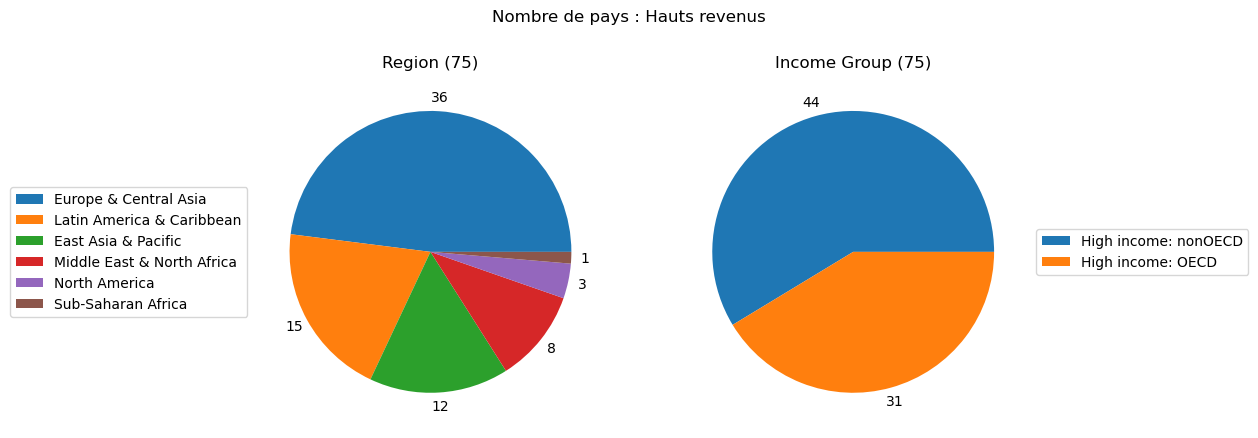

In [34]:
plot_repartition_country(country_high, 'Hauts revenus')

### Calcul des statistiques

In [35]:
up_country = 150
up_country_high = 58
up_mean_high = 15

#### Fonctions de calculs des statistiques d'une série (ou d'un topic)

In [36]:
def calcul_stats_series(data, series):
    data_grouped = data.loc[data['nb_val']>0].groupby('Indicator Code')

    series_stats = pd.DataFrame()
    series_stats['nb_val_tot'] = data_grouped['nb_val'].sum()
    series_stats['nb_country'] = data_grouped['nb_val'].size()
    series_stats['nb_val_mean'] = data_grouped['nb_val'].mean()
    series_stats['nb_val_max'] = data_grouped['nb_val'].max()
    series_stats['nb_val_min'] = data_grouped['nb_val'].min()
    series_stats['nb_val_std'] = data_grouped['nb_val'].std()
    series_stats['nb_val_d1'] = data_grouped['nb_val'].quantile(0.1)
    series_stats['nb_val_q1'] = data_grouped['nb_val'].quantile(0.25)

    series = series.join(series_stats, on='Series Code')
    return series

In [37]:
def calcul_stats_topic(series):
    series_grouped = series.groupby('Topic')

    topic = pd.DataFrame()
    topic['nb_series'] = series_grouped.size()
    topic['nb_country_max'] = series_grouped['nb_country'].max()
    topic['nb_val_mean_max'] = series_grouped['nb_val_mean'].max()
    topic['nb_val_q1_max'] = series_grouped['nb_val_q1'].max()
    topic['nb_val_d1_max'] = series_grouped['nb_val_d1'].max()
    topic['Topic'] = topic.index

    return topic

#### Nombre de valeurs sur chaque ligne

In [38]:
data_2000['nb_val'] = data_2000.iloc[:,4:].shape[1]-data_2000.iloc[:,4:].isnull().sum(axis=1)

#### Pays à hauts revenus

In [39]:
data_2000_high = data_2000.loc[data_2000['Country Code'].isin(country_high['Country Code'])]

In [40]:
print('nombre de colonnes des tableaux de données')
print('data_2000 : {}'.format(data_2000.shape[1]))
print('data_2000_high : {}'.format(data_2000_high.shape[1]))
print('nombre de lignes des tableaux')
print('data_2000 : {}'.format(data_2000.shape[0]))
print('data_2000_high : {}'.format(data_2000_high.shape[0]))
print('ratio de lignes : {:.2f}%'.format(data_2000_high.shape[0]/data_2000.shape[0]*100))

nombre de colonnes des tableaux de données
data_2000 : 40
data_2000_high : 40
nombre de lignes des tableaux
data_2000 : 886930
data_2000_high : 274875
ratio de lignes : 30.99%


#### Series

In [41]:
series_2000 = calcul_stats_series(data_2000, series)

In [42]:
series_2000_high = calcul_stats_series(data_2000_high, series)

In [43]:
series.name = '1970-2100, tous pays'
series_2000.name = '2000-2100, tous pays'
series_2000_high.name = '2000-2100, hauts revenus'

In [44]:
print('Nombre de lignes des tableaux de séries (vérification)')
print(series.name + ' : {}'.format(series.shape[0]))
print(series_2000.name + ' : {}'.format(series_2000.shape[0]))
print(series_2000_high.name + ' : {}'.format(series_2000_high.shape[0]))

Nombre de lignes des tableaux de séries (vérification)
1970-2100, tous pays : 3665
2000-2100, tous pays : 3665
2000-2100, hauts revenus : 3665


#### Topic

In [45]:
topic_2000 = calcul_stats_topic(series_2000)

In [46]:
topic_2000_high = calcul_stats_topic(series_2000_high)

In [47]:
topic_2000_up = topic_2000.loc[topic_2000['nb_country_max'] >= up_country]
topic_2000_high_up = topic_2000_high.loc[topic_2000_high['nb_country_max'] >= up_country_high]
topic_2000_high_up2 = topic_2000_high_up.loc[topic_2000_high_up['nb_val_mean_max'] >= up_mean_high]

### Représentation des séries et Topic

#### Fonctions de représentation

In [48]:
def plot_series(series_array, plot1_columns, plot2_columns):
    fig = plt.figure(figsize=(15,5))
    colors_list = ['b', 'r', 'g', 'm', 'c', 'k', 'y']

    plot_series_subplot(series_array, plot1_columns, 1, colors_list)

    handles, labels = plt.subplot(1,2,1).get_legend_handles_labels()

    plot_series_subplot(series_array, plot2_columns, 2, colors_list)

    plt.show()

In [49]:
def plot_series_subplot(series_array, plot_columns, n_subplot, colors_list):
    ax = plt.subplot(1,2,n_subplot)
    x = []
    for i in range(len(series_array)):
        if (len(plot_columns)==1):
            x.append(series_array[i].index.values)
        else:
            x.append(series_array[i][plot_columns[0]])
        ax.scatter(x[i], series_array[i][plot_columns[-1]], color=colors_list[i], label=series_array[i].name)

    if (len(plot_columns)==1):
        ax.set_xlabel('Index')
    else:
        ax.set_xlabel(plot_columns[0])

    if(n_subplot == 2):
        ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    ax.set_ylabel(plot_columns[-1])
    ax.set_title(plot_columns[-1])
    ax.grid()

In [50]:
def plot_series_stat(series_df, column_id, columns_plot_array, vline_values_array, filter_text, select_id):
    Y_pos = np.arange(len(series_df))
    colors_list = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
    i = 0
    for string in columns_plot_array:
        plt.scatter(series_df[string], Y_pos, color=colors_list[i], label=string)
        i = i+1
    plt.yticks(Y_pos, series_df[column_id])

    i = 0
    for x in vline_values_array:
        plt.plot(x*np.ones(((len(series_df),1))), Y_pos, label=str(x), color=colors_list[i], linestyle=':')
        i = i+1

    ax = plt.gca()
    for string in select_id:
        y_label_index, = np.where(series_df[column_id].values == string)
        plt.setp(ax.get_yticklabels()[y_label_index[0]], color='red')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=len(columns_plot_array))
    plt.grid()
    plt.title('Statistiques par {:s} : '.format(column_id) + filter_text)
    plt.show()

In [51]:
def plot_series_country_subplot(series_df, columns_plot_array, cond, name_title, n_subplot, colors_list, linestyles):
    ax=plt.subplot(1,2,n_subplot)
    i = 0
    if('nb_country' in list(cond)):
        ax.axvline(x=cond['nb_country'], color='k', linestyle='--')
    for string in columns_plot_array:
        ax.scatter(series_df['nb_country'], series_df[string], color=colors_list[i], label=string)
        if(string in list(cond)):
            ax.axhline(cond[string], color=colors_list[i], linestyle=linestyles[i])
        i = i+1
    ax.grid()
    ax.set_xlabel('nb_country')
    if(n_subplot == 1):
        ax.legend(loc='center right', bbox_to_anchor=(-0.05, 0.5))
    else:
        ax.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
    ax.set_title(name_title)

In [52]:
def plot_series_country(series_array, columns_plot_array, cond_array, name_array):
    fig = plt.figure(figsize=(15,6))
    colors_list = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
    linestyles = ['-', '--', '-.', ':', ',', 'o', '|']

    for i in range(2):
        plot_series_country_subplot(series_array[i], columns_plot_array, cond_array[i], name_array[i], i+1, colors_list, linestyles)

    plt.show()

#### Series (valeurs manquantes)

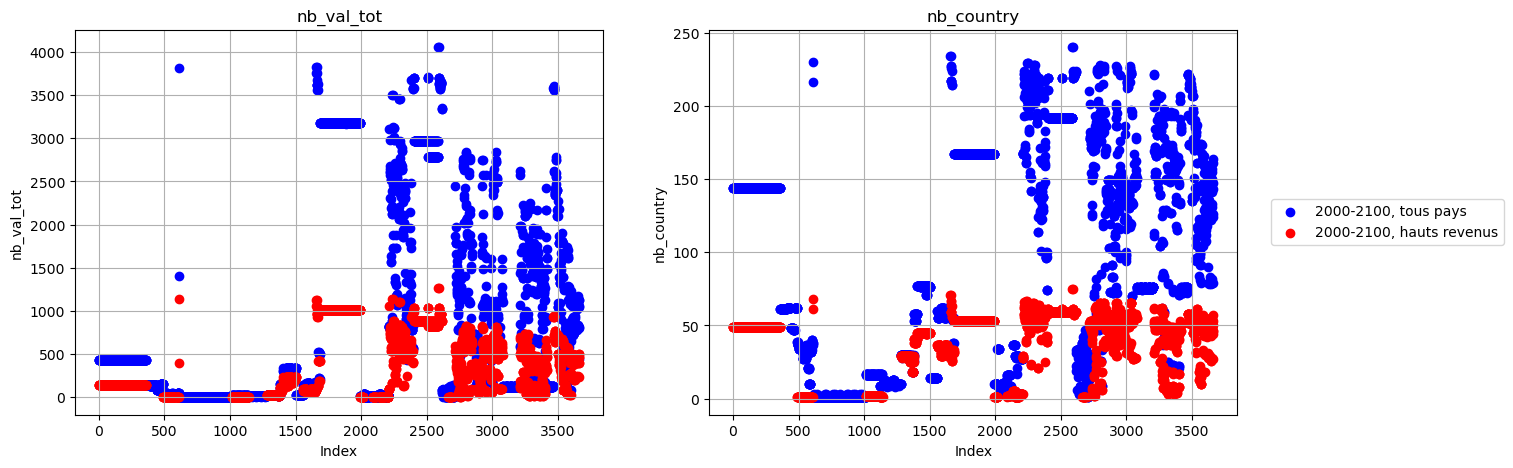

In [53]:
plot_series([series_2000, series_2000_high], ['nb_val_tot'], ['nb_country'])

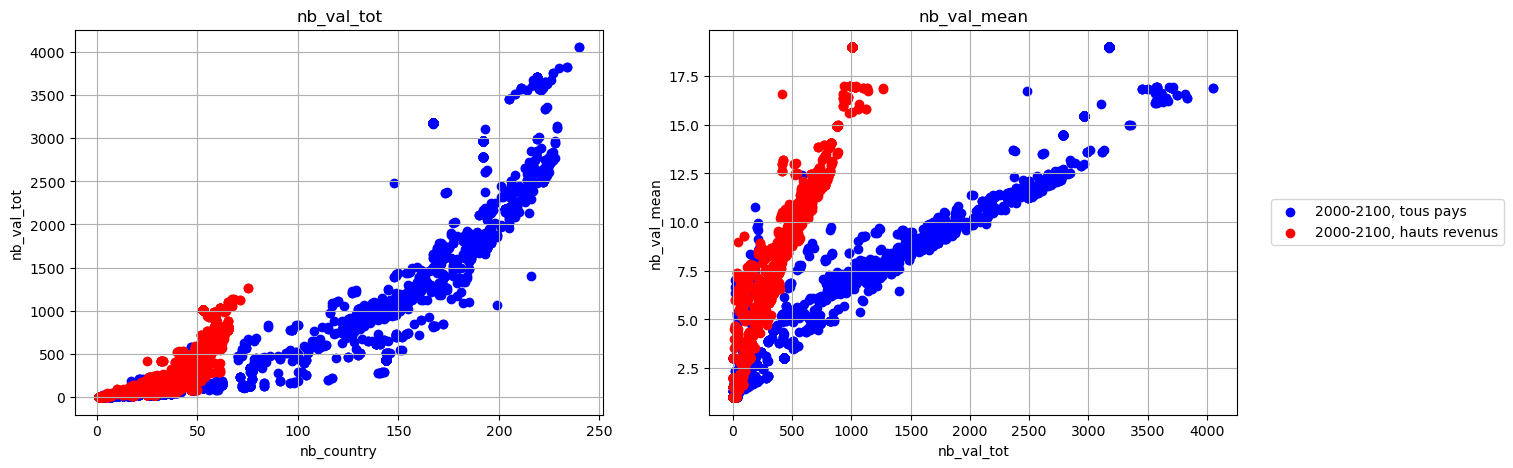

In [54]:
plot_series([series_2000, series_2000_high], ['nb_country', 'nb_val_tot'], ['nb_val_tot', 'nb_val_mean'])

#### Topic (sans et avec filtres)

##### Tous pays

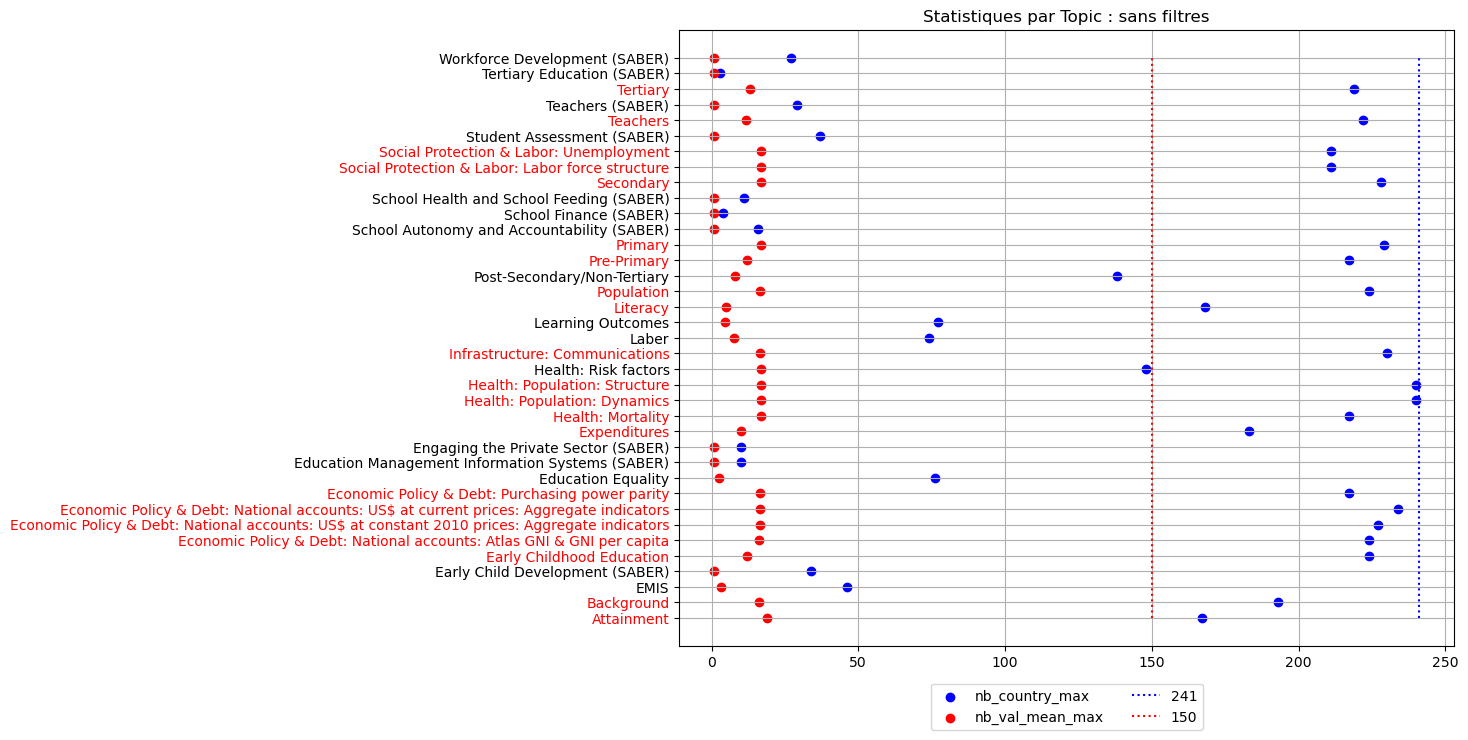

In [55]:
plt.figure(figsize=(10,8))
plot_series_stat(topic_2000, 'Topic',
                 ['nb_country_max','nb_val_mean_max'],
                 [country.shape[0], up_country],
                 'sans filtres',
                 topic_2000_up['Topic'].values
                )

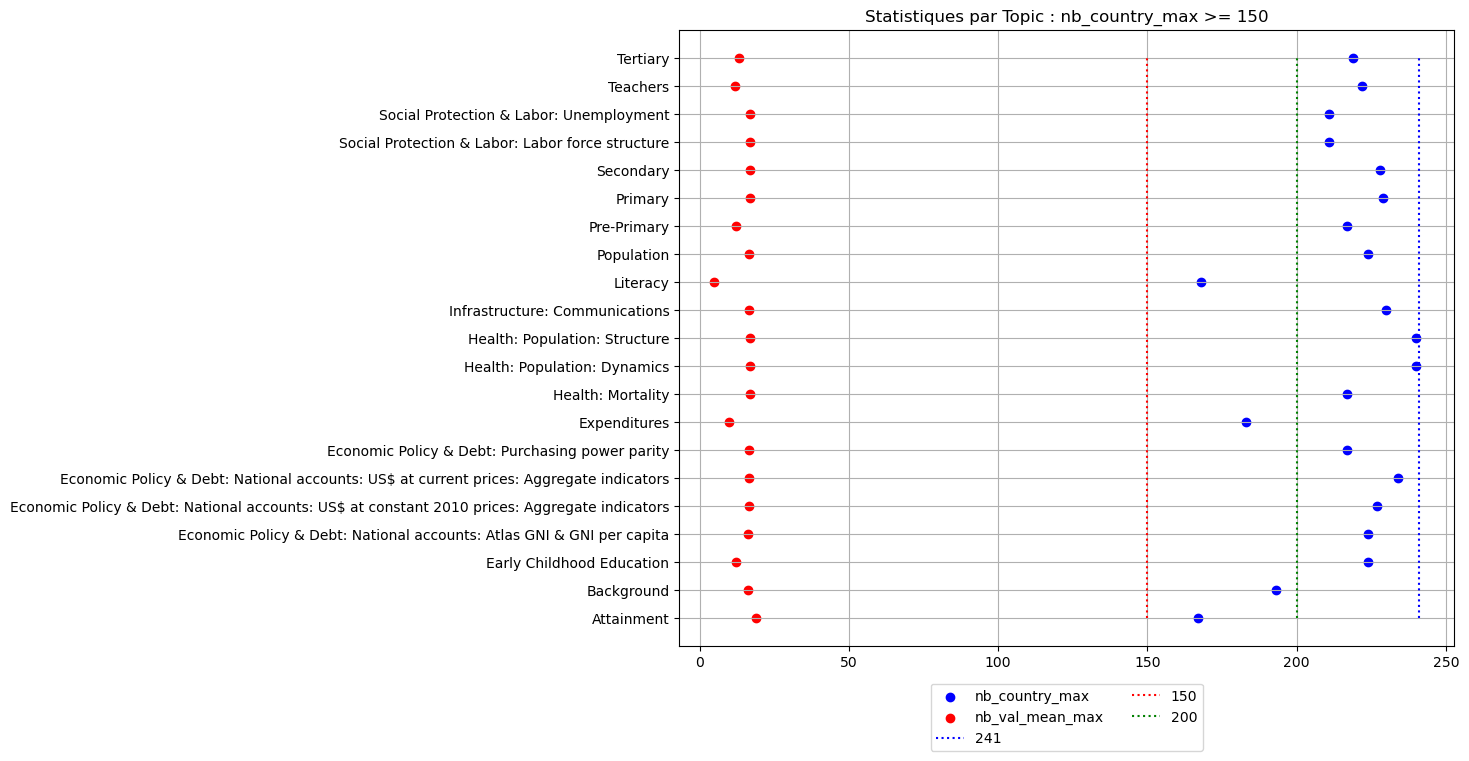

In [56]:
plt.figure(figsize=(10,8))
plot_series_stat(topic_2000_up, 'Topic',
                 ['nb_country_max','nb_val_mean_max'],
                 [country.shape[0], up_country, 200],
                 'nb_country_max >= {:.0f}'.format(up_country),
                 []
                )

##### Hauts revenus

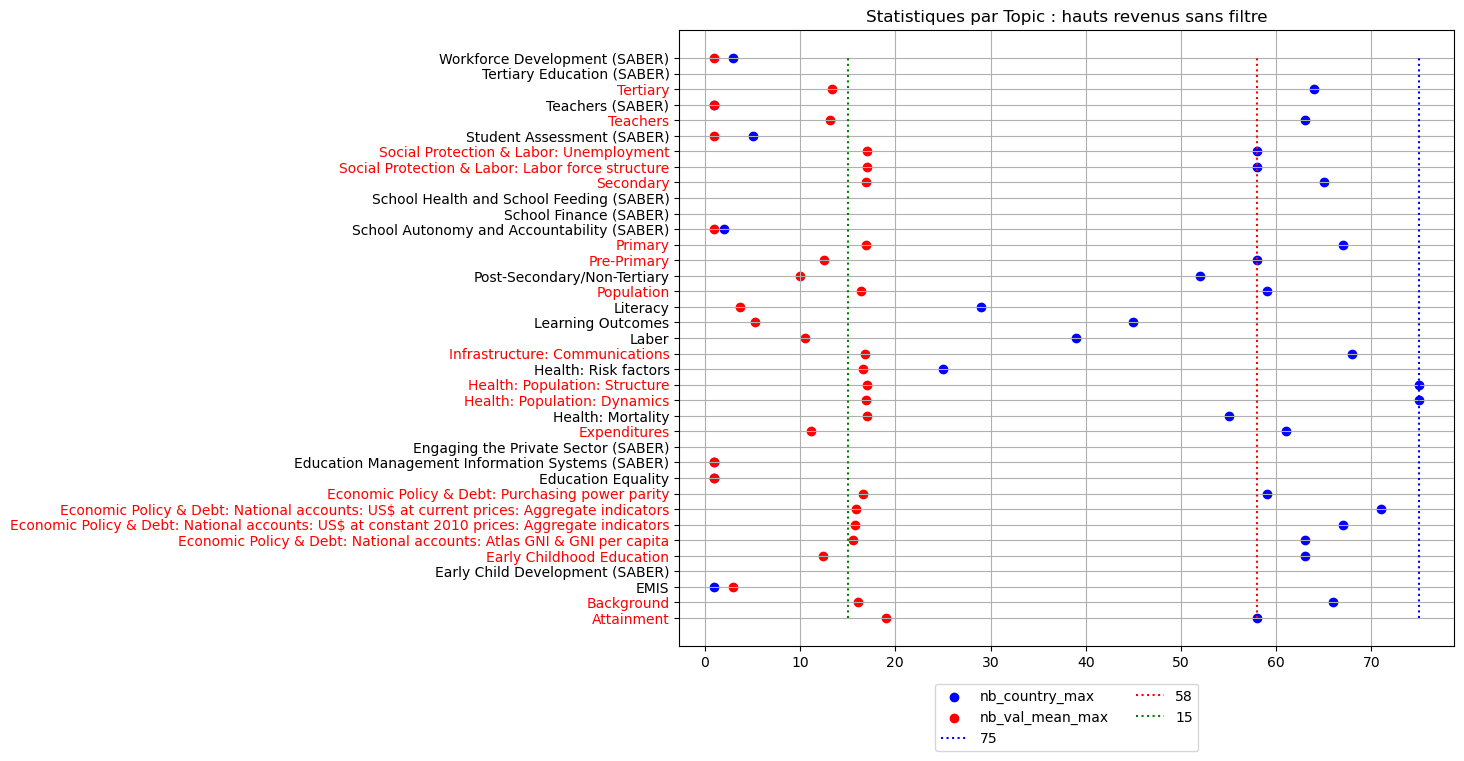

In [57]:
plt.figure(figsize=(10,8))
plot_series_stat(topic_2000_high, 'Topic',
                 ['nb_country_max','nb_val_mean_max'],
                 [country_high.shape[0], up_country_high, up_mean_high],
                 'hauts revenus sans filtre',
                 topic_2000_high_up['Topic'].values
                )

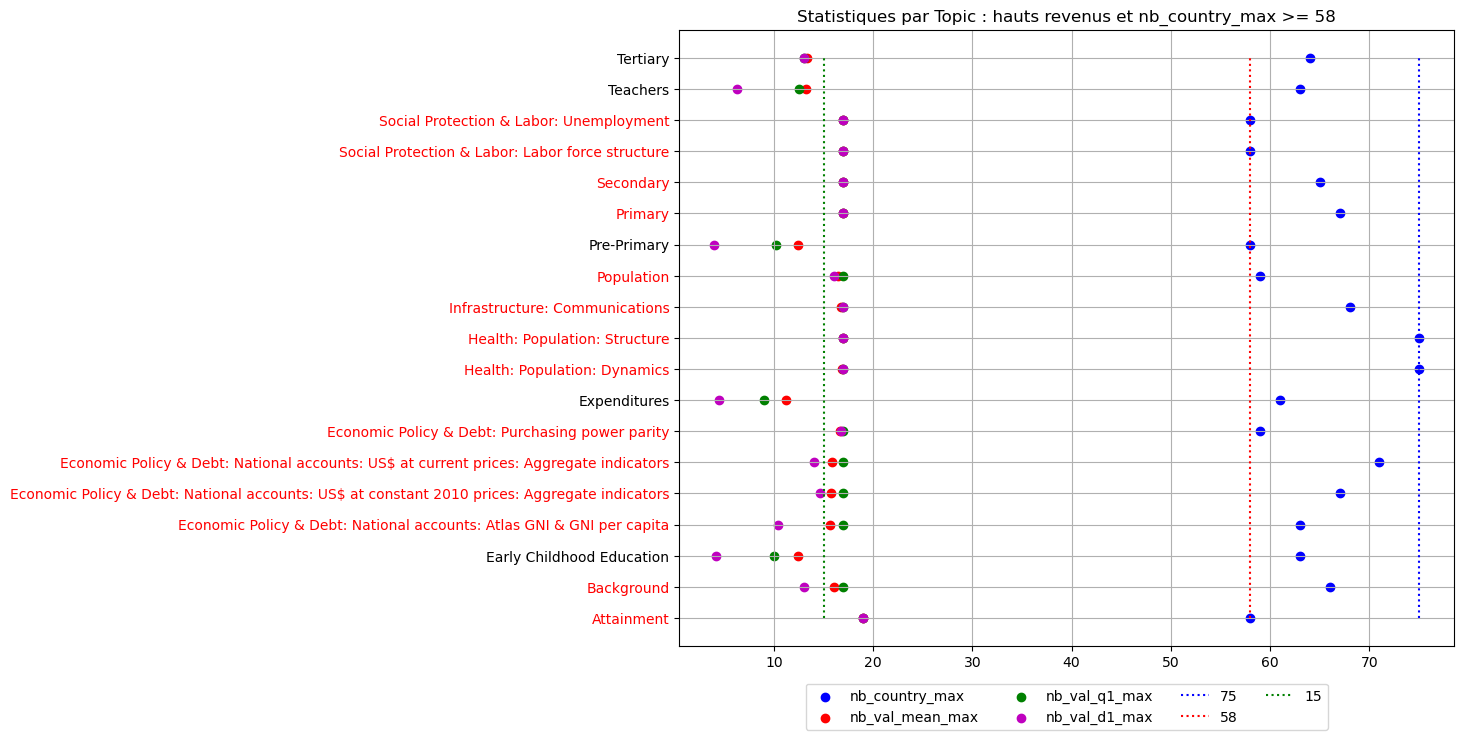

In [58]:
plt.figure(figsize=(10,8))
plot_series_stat(topic_2000_high_up, 'Topic',
                 ['nb_country_max','nb_val_mean_max', 'nb_val_q1_max', 'nb_val_d1_max'],
                 [country_high.shape[0], up_country_high, up_mean_high],
                 'hauts revenus et nb_country_max >= {:.0f}'.format(up_country_high),
                 topic_2000_high_up2['Topic'].values
                )

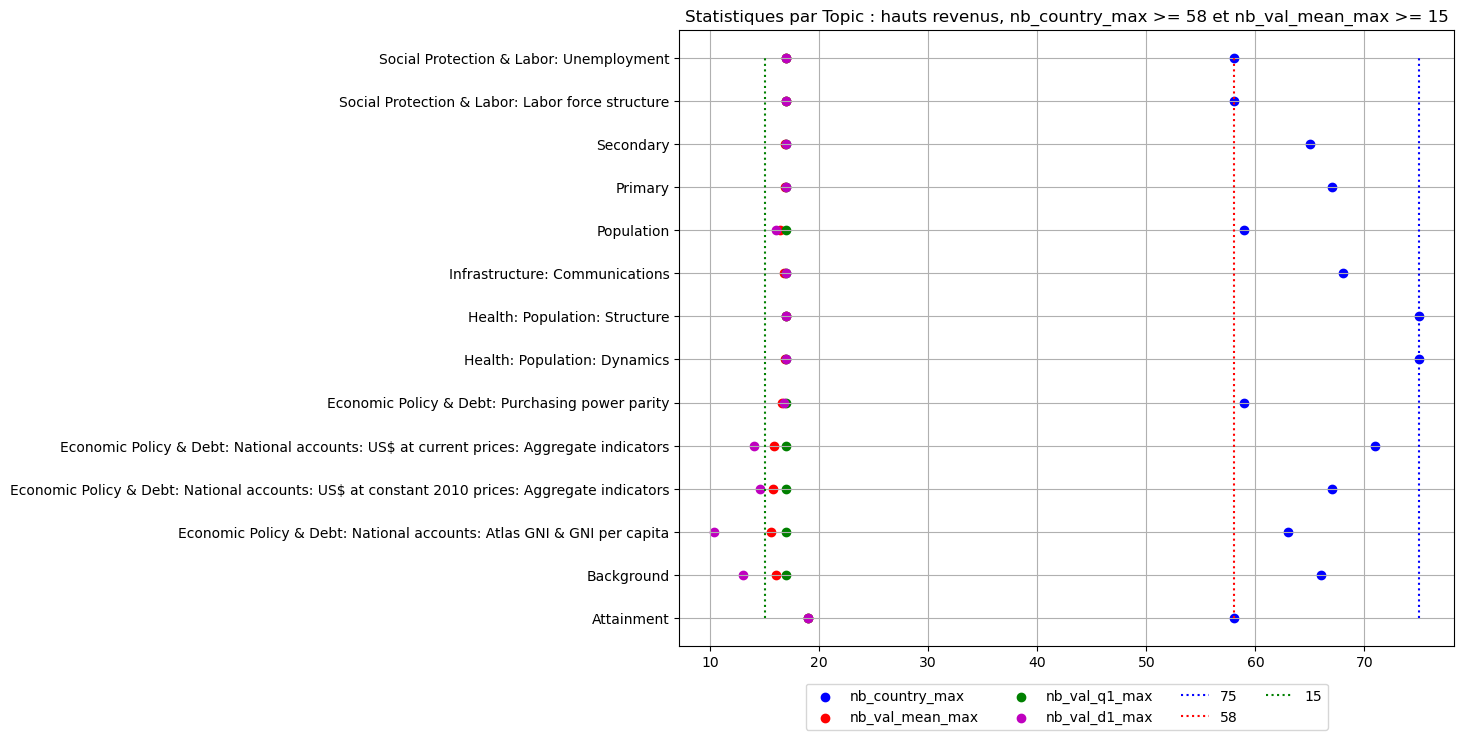

In [59]:
plt.figure(figsize=(10,8))
plot_series_stat(topic_2000_high_up2, 'Topic',
                 ['nb_country_max','nb_val_mean_max', 'nb_val_q1_max', 'nb_val_d1_max'],
                 [country_high.shape[0], up_country_high, up_mean_high],
                 'hauts revenus, nb_country_max >= {:.0f} et nb_val_mean_max >= {:.0f}'.format(up_country_high, up_mean_high),
                 []
                )

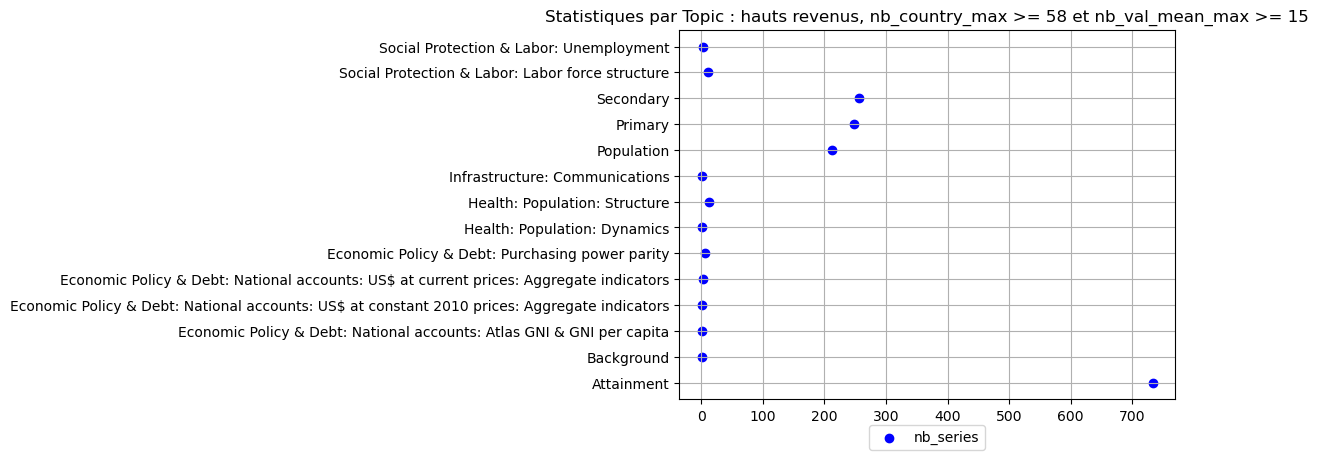

In [60]:
plot_series_stat(topic_2000_high_up2, 'Topic',
                 ['nb_series'],
                 [],
                 'hauts revenus, nb_country_max >= {:.0f} et nb_val_mean_max >= {:.0f}'.format(up_country_high, up_mean_high),
                 []
                )

### Choix des indicateurs

In [61]:
indicator_name_array = []

#### Fonctions de filtres

In [62]:
def filter_series_topic(series, topic):
    return series.loc[series['Topic'].isin(topic)]

In [63]:
def filter_series_cond(series, cond):
    for string in list(cond):
        series = series.loc[series[string]>=cond[string]]
    return series

In [64]:
def filter_series_all(series, series_high, topic, cond, cond_high):
    series_filter_topic = filter_series_topic(series, topic)
    series_high_filter_topic = filter_series_topic(series_high, topic)
    series_filter_topic_cond = filter_series_cond(series_filter_topic, cond)
    series_high_filter_topic_cond = filter_series_cond(series_high_filter_topic, cond_high)
    return [series_filter_topic,
            series_high_filter_topic,
            series_filter_topic_cond,
            series_high_filter_topic_cond
            ]

In [65]:
def create_title_topic_cond(title_topic, cond):
    title_topic_cond = title_topic
    for string in list(cond):
        title_topic_cond = title_topic_cond + string +' >= {:.0f}'.format(cond[string]) + ', '
    title_topic_cond = title_topic_cond[:-2]
    return title_topic_cond

In [66]:
def create_title_all(topic, cond, cond_high):
    title_topic = 'Topic ' + topic + ", "
    title_topic_cond = create_title_topic_cond(title_topic, cond)
    title_topic_cond_high = create_title_topic_cond(title_topic, cond_high)
    return [title_topic,
            title_topic_cond,
            title_topic_cond_high
            ]

#### Secondary (2)

In [67]:
topic_name_array = ["Enrolment in secondary education, both sexes (number)",
                        "Theoretical duration of upper secondary education (years)"]

##### Conditions

In [68]:
topic = ["Secondary"]

In [69]:
cond = {'nb_country':200,
        'nb_val_q1':10,
        'nb_val_mean':10
       }

In [70]:
cond_high = {'nb_country':60,
        'nb_val_q1':12,
        'nb_val_mean':12
       }

##### Représentation

In [71]:
indicator_name_array = np.hstack((indicator_name_array, topic_name_array))

In [72]:
[title_topic,
 title_topic_cond,
 title_topic_cond_high
 ] = create_title_all(topic[0], cond, cond_high)

In [73]:
[series_2000_filter_topic,
 series_2000_high_filter_topic,
 series_2000_filter_topic_cond,
 series_2000_high_filter_topic_cond
] = filter_series_all(series_2000, series_2000_high, topic, cond, cond_high)

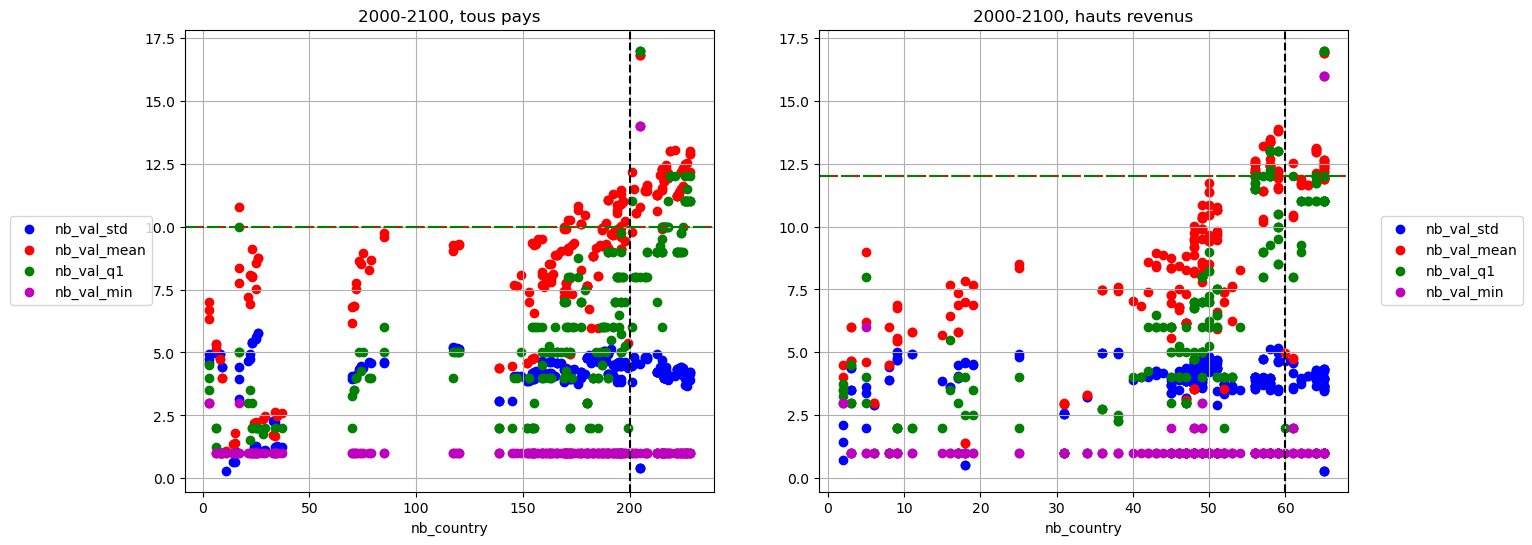

In [74]:
plot_series_country([series_2000_filter_topic, series_2000_high_filter_topic],
                    ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                    [cond, cond_high],
                    [series_2000.name, series_2000_high.name]
                   )

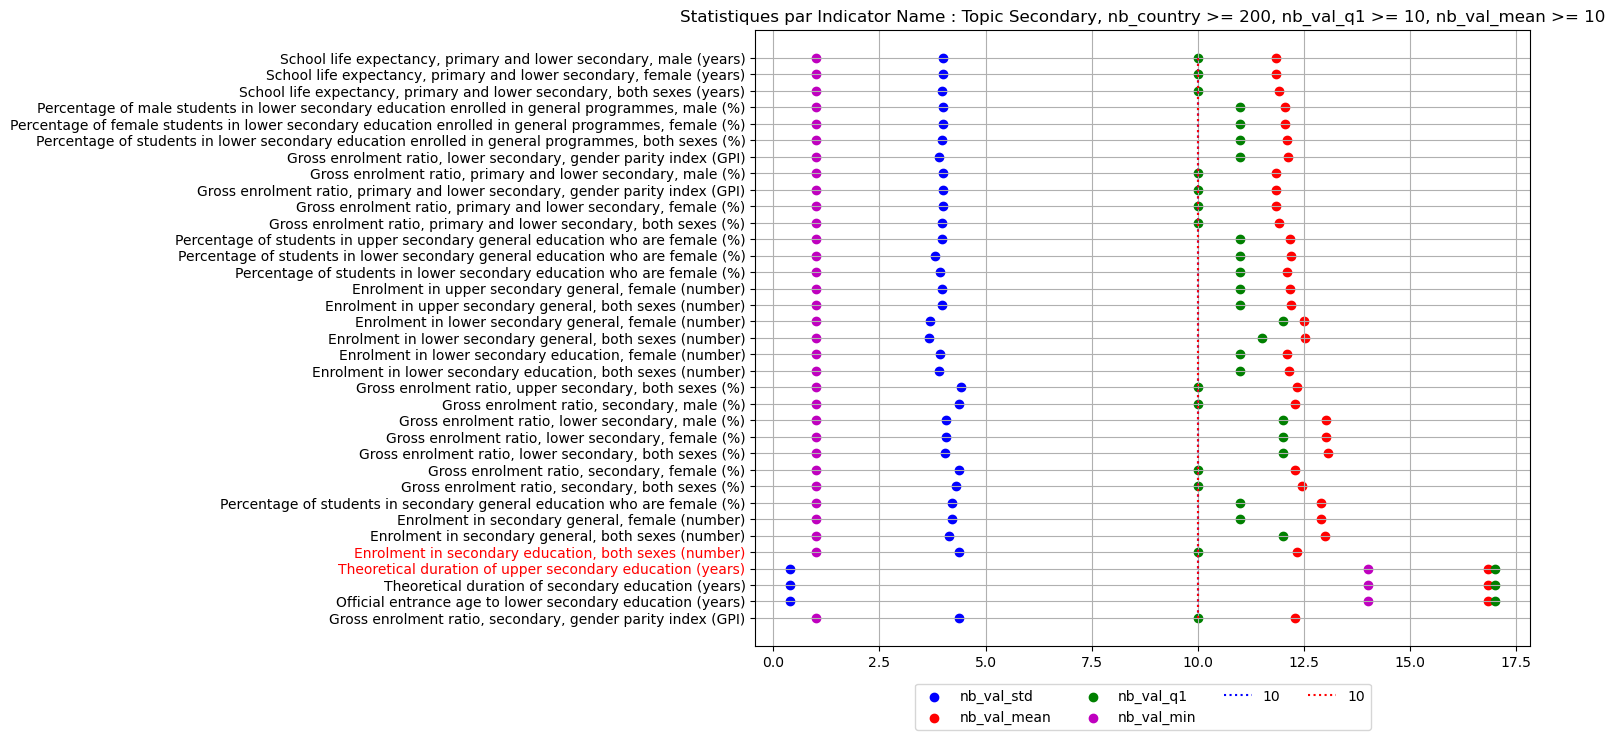

In [75]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond['nb_val_mean'], cond['nb_val_q1']],
                 title_topic_cond,
                 topic_name_array
                )

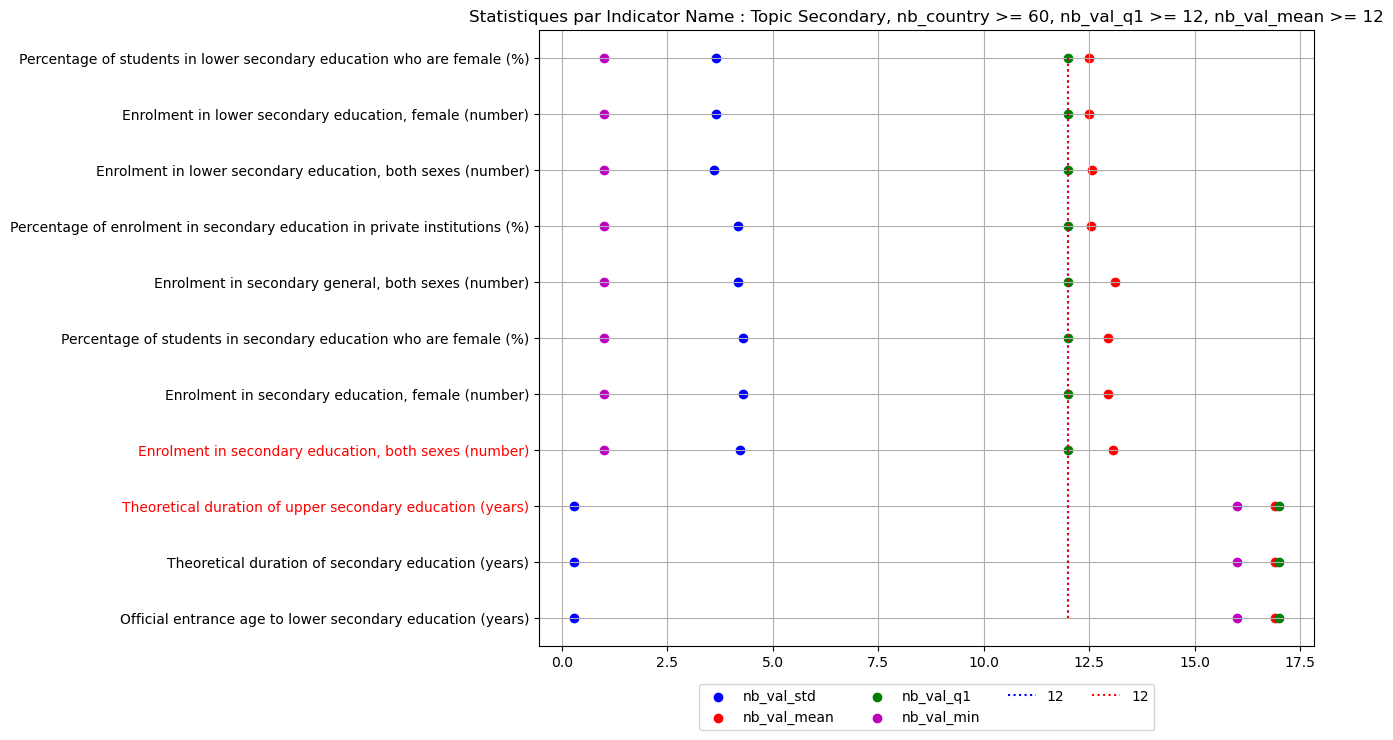

In [76]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_high_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond_high['nb_val_mean'], cond_high['nb_val_q1']],
                 title_topic_cond_high,
                 topic_name_array
                )

#### Population (3)

In [77]:
topic_name_array = ["Population of the official age for upper secondary education, both sexes (number)",
                    "Population of the official age for secondary education, both sexes (number)",
                    "Population of the official age for tertiary education, both sexes (number)"]

##### Conditions

In [78]:
topic = ["Population"]

In [79]:
cond = {'nb_country':200,
        'nb_val_mean':10
       }

In [80]:
cond_high = {'nb_country':56,
        'nb_val_mean':12
       }

##### Représentation

In [81]:
indicator_name_array = np.hstack((indicator_name_array, topic_name_array))

In [82]:
[title_topic,
 title_topic_cond,
 title_topic_cond_high
 ] = create_title_all(topic[0], cond, cond_high)

In [83]:
[series_2000_filter_topic,
 series_2000_high_filter_topic,
 series_2000_filter_topic_cond,
 series_2000_high_filter_topic_cond
] = filter_series_all(series_2000, series_2000_high, topic, cond, cond_high)

In [84]:
series_2000_filter_topic_cond = series_2000_filter_topic_cond.loc[
    (series_2000_filter_topic_cond['Indicator Name'].str.contains("Population of the official age"))
    &((series_2000_filter_topic_cond['Indicator Name'].str.contains("secondary"))
      |(series_2000_filter_topic_cond['Indicator Name'].str.contains("tertiary")))
]

In [85]:
series_2000_high_filter_topic_cond = series_2000_high_filter_topic_cond.loc[
    (series_2000_high_filter_topic_cond['Indicator Name'].str.contains("Population of the official age"))
    &((series_2000_high_filter_topic_cond['Indicator Name'].str.contains("secondary"))
      |(series_2000_high_filter_topic_cond['Indicator Name'].str.contains("tertiary")))
]

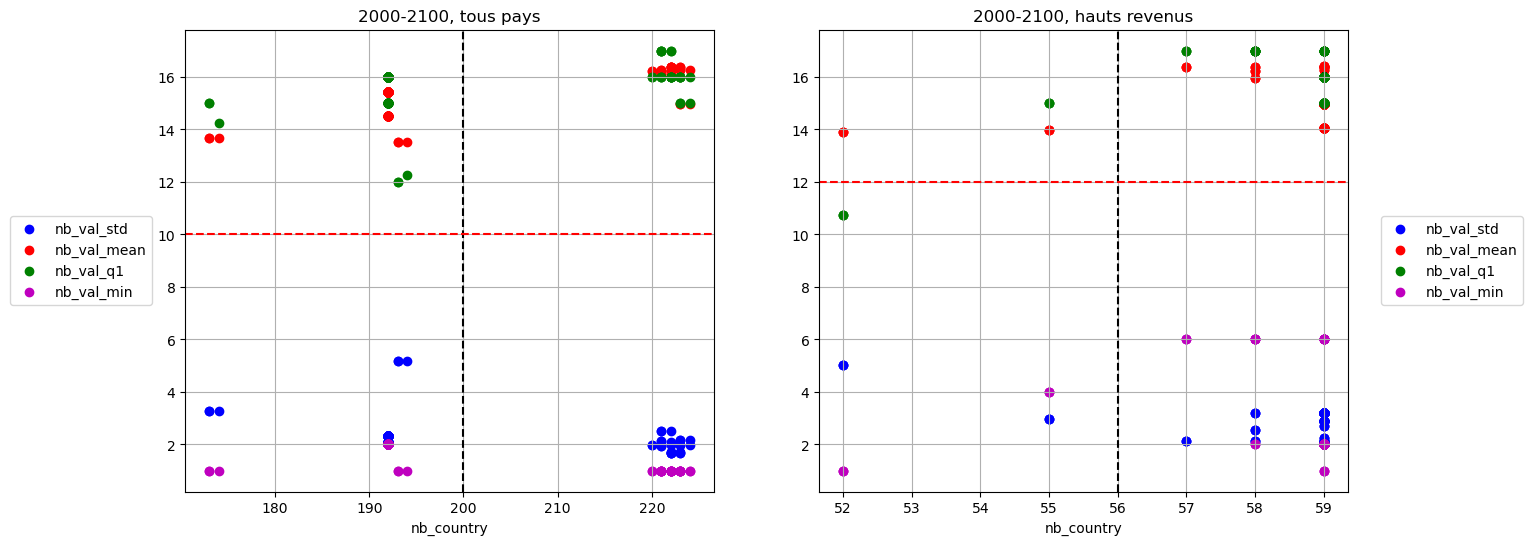

In [86]:
plot_series_country([series_2000_filter_topic, series_2000_high_filter_topic],
                    ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                    [cond, cond_high],
                    [series_2000.name, series_2000_high.name]
                   )

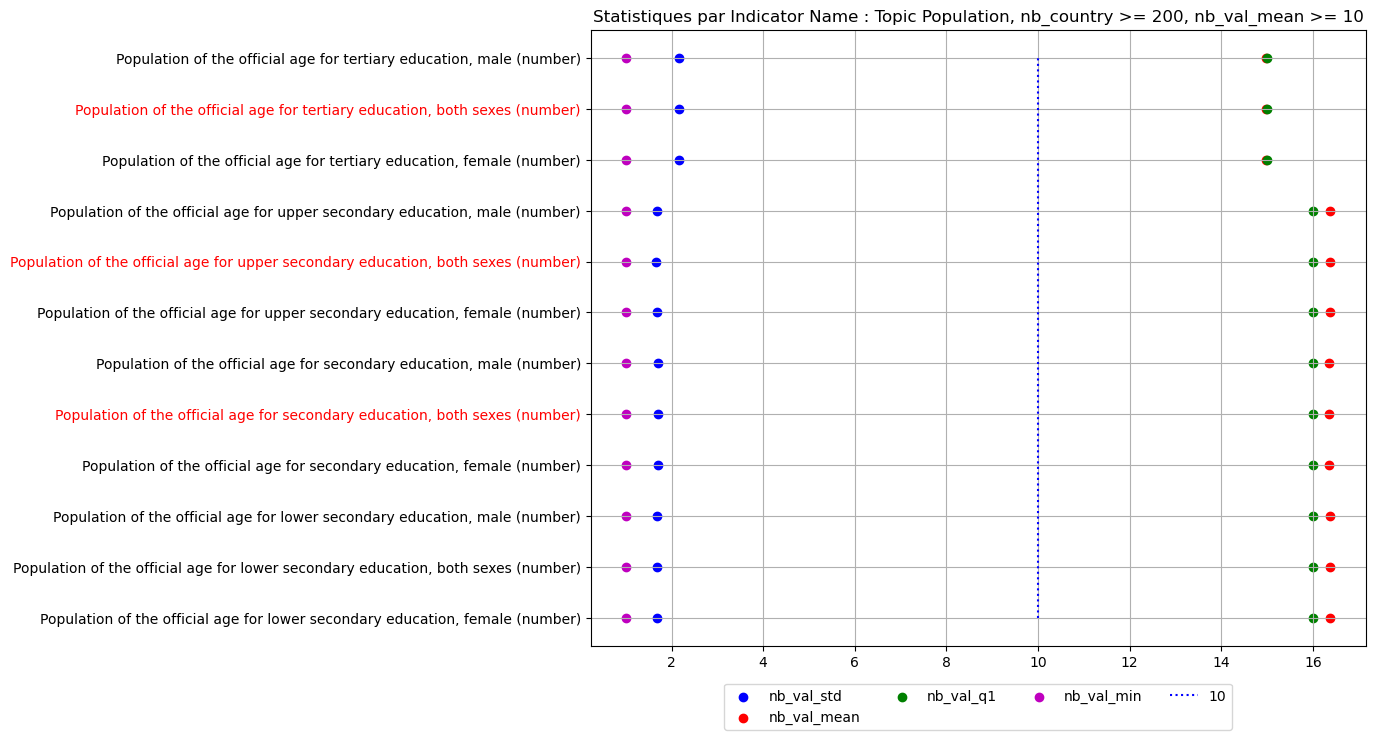

In [87]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond['nb_val_mean']],
                 title_topic_cond,
                 topic_name_array
                )

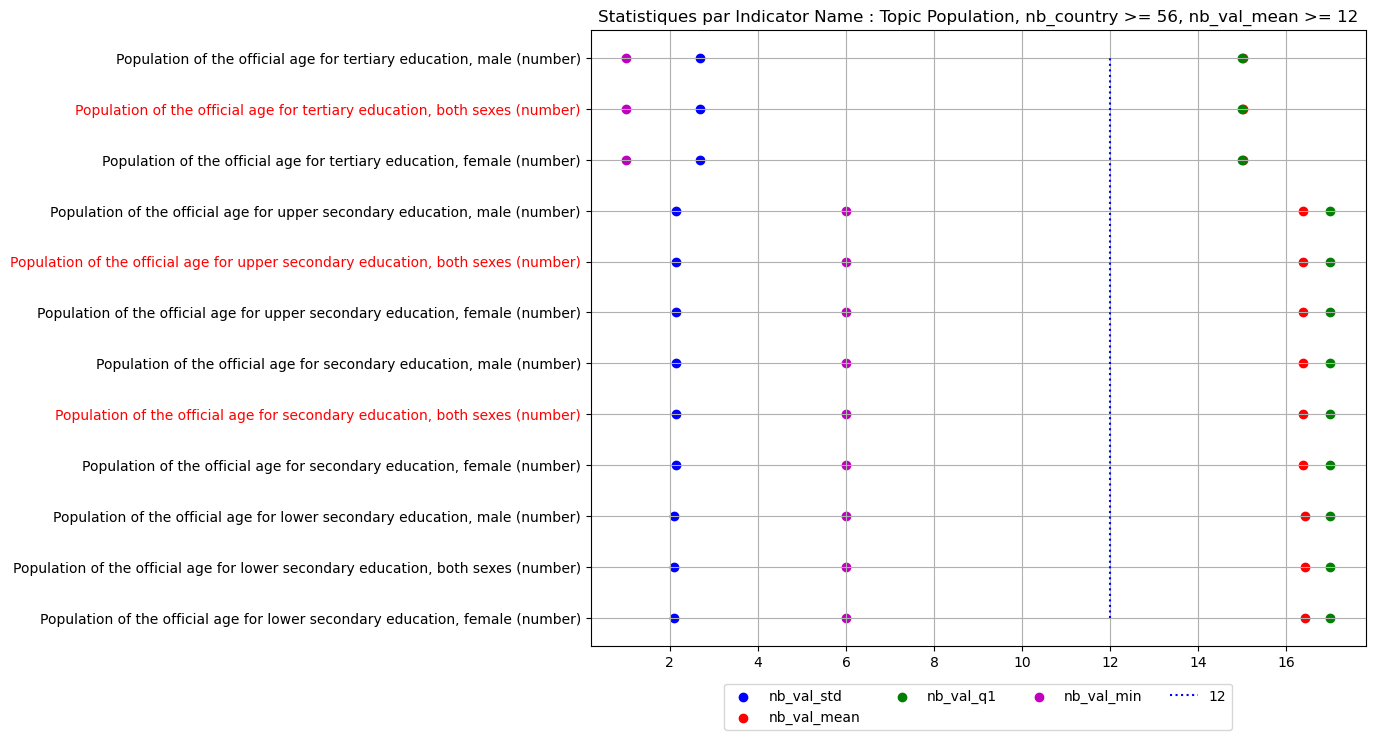

In [88]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_high_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond_high['nb_val_mean']],
                 title_topic_cond_high,
                 topic_name_array
                )

#### Health: Population: Structure (1)

In [89]:
topic_name_array = ['Population, total']

##### Conditions

In [90]:
topic = ["Health: Population: Structure"]

In [91]:
cond = {'nb_country':200,
        'nb_val_mean':10
       }

In [92]:
cond_high = {'nb_country':56,
        'nb_val_mean':12
       }

##### Représentation

In [93]:
indicator_name_array = np.hstack((indicator_name_array, topic_name_array))

In [94]:
[title_topic,
 title_topic_cond,
 title_topic_cond_high
 ] = create_title_all(topic[0], cond, cond_high)

In [95]:
[series_2000_filter_topic,
 series_2000_high_filter_topic,
 series_2000_filter_topic_cond,
 series_2000_high_filter_topic_cond
] = filter_series_all(series_2000, series_2000_high, topic, cond, cond_high)

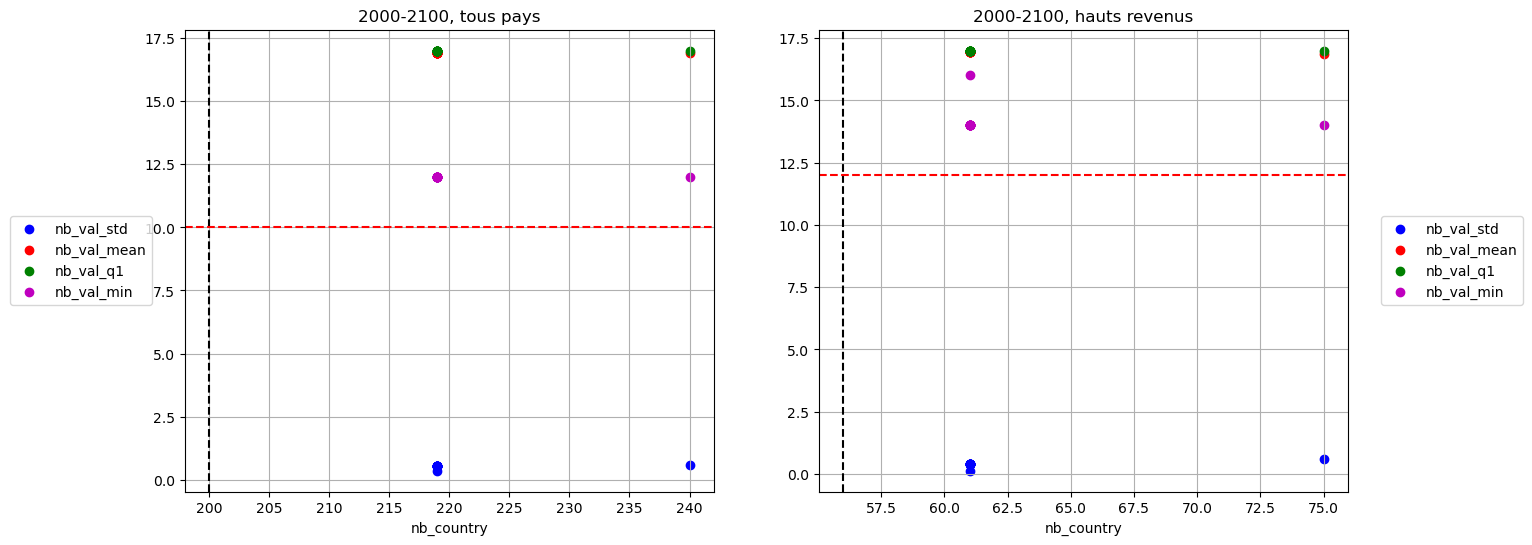

In [96]:
plot_series_country([series_2000_filter_topic, series_2000_high_filter_topic],
                    ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                    [cond, cond_high],
                    [series_2000.name, series_2000_high.name]
                   )

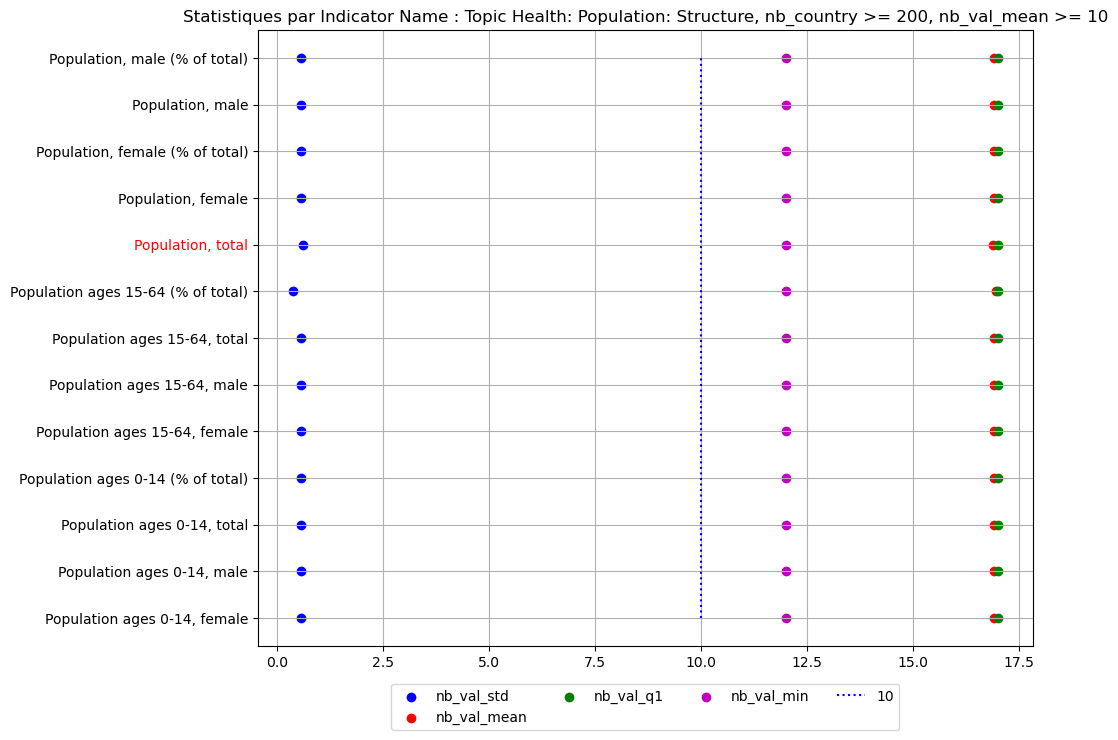

In [97]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond['nb_val_mean']],
                 title_topic_cond,
                 topic_name_array
                )

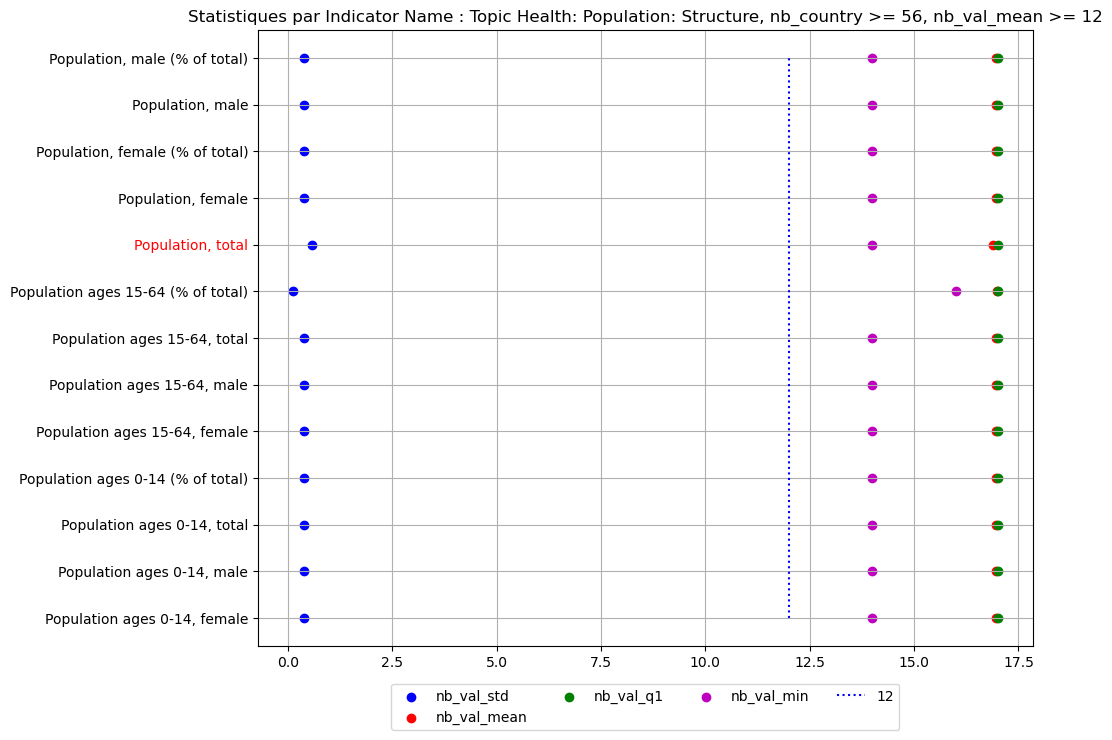

In [98]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_high_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond_high['nb_val_mean']],
                 title_topic_cond_high,
                 topic_name_array
                )

#### Attainment (2)

In [99]:
topic_name_array = ["Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total",
                    "Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total"]

##### Conditions

In [100]:
topic = ["Attainment"]

In [101]:
cond = {'nb_country':150,
        'nb_val_mean':15
       }

In [102]:
cond_high = {'nb_country':50,
        'nb_val_mean':15
       }

##### Représentation

In [103]:
indicator_name_array = np.hstack((indicator_name_array, topic_name_array))

In [104]:
[title_topic,
 title_topic_cond,
 title_topic_cond_high
 ] = create_title_all(topic[0], cond, cond_high)

In [105]:
[series_2000_filter_topic,
 series_2000_high_filter_topic,
 series_2000_filter_topic_cond,
 series_2000_high_filter_topic_cond
] = filter_series_all(series_2000, series_2000_high, topic, cond, cond_high)

In [106]:
series_2000_filter_topic_cond = series_2000_filter_topic_cond.loc[
    (series_2000_filter_topic_cond['Indicator Name'].str.contains("Population in thousands"))
    &((series_2000_filter_topic_cond['Indicator Name'].str.contains("Secondary"))
      |(series_2000_filter_topic_cond['Indicator Name'].str.contains("Tertiary")))
]

In [107]:
series_2000_high_filter_topic_cond = series_2000_high_filter_topic_cond.loc[
    (series_2000_high_filter_topic_cond['Indicator Name'].str.contains("Population in thousands"))
    &((series_2000_high_filter_topic_cond['Indicator Name'].str.contains("Secondary"))
      |(series_2000_high_filter_topic_cond['Indicator Name'].str.contains("Tertiary")))
]

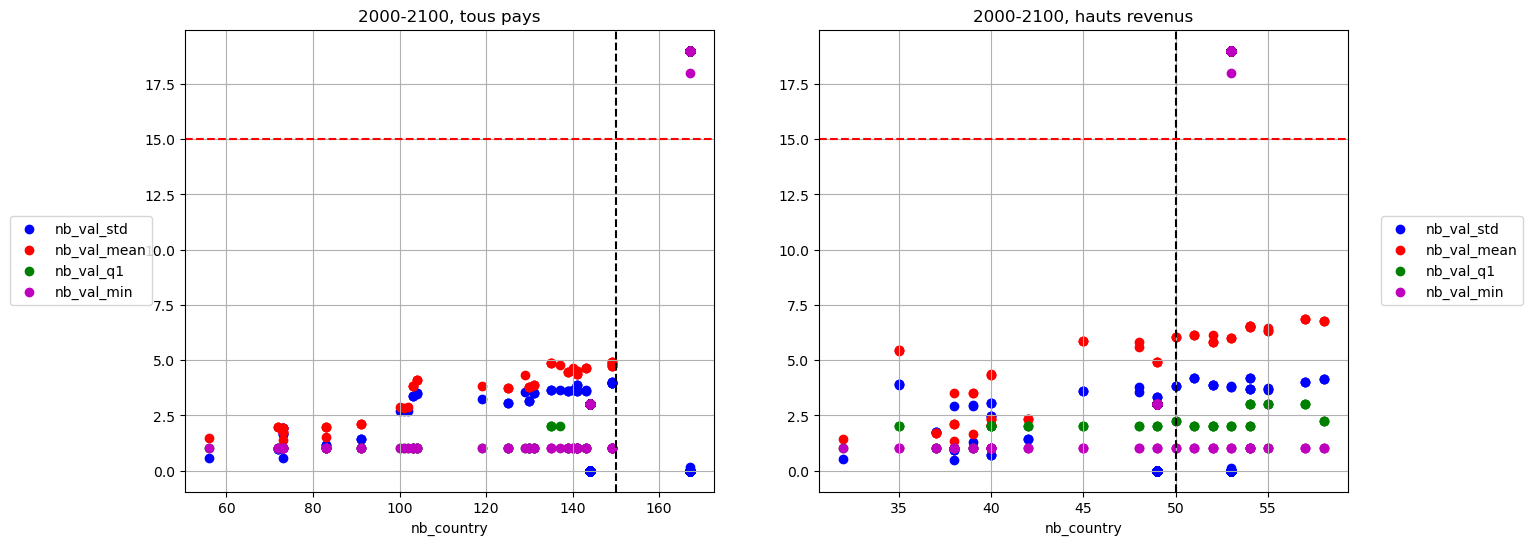

In [108]:
plot_series_country([series_2000_filter_topic, series_2000_high_filter_topic],
                    ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                    [cond, cond_high],
                    [series_2000.name, series_2000_high.name]
                   )

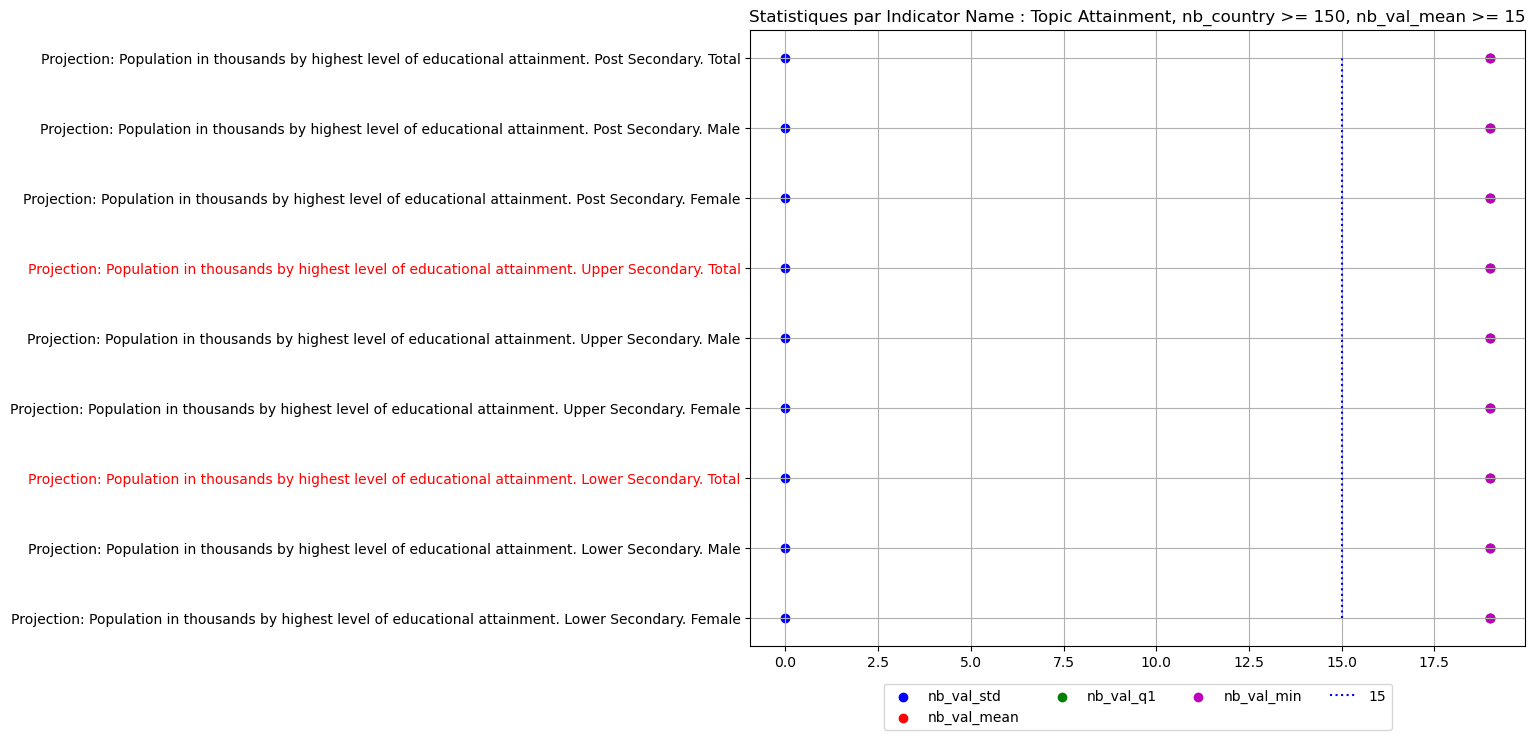

In [109]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond['nb_val_mean']],
                 title_topic_cond,
                 topic_name_array
                )

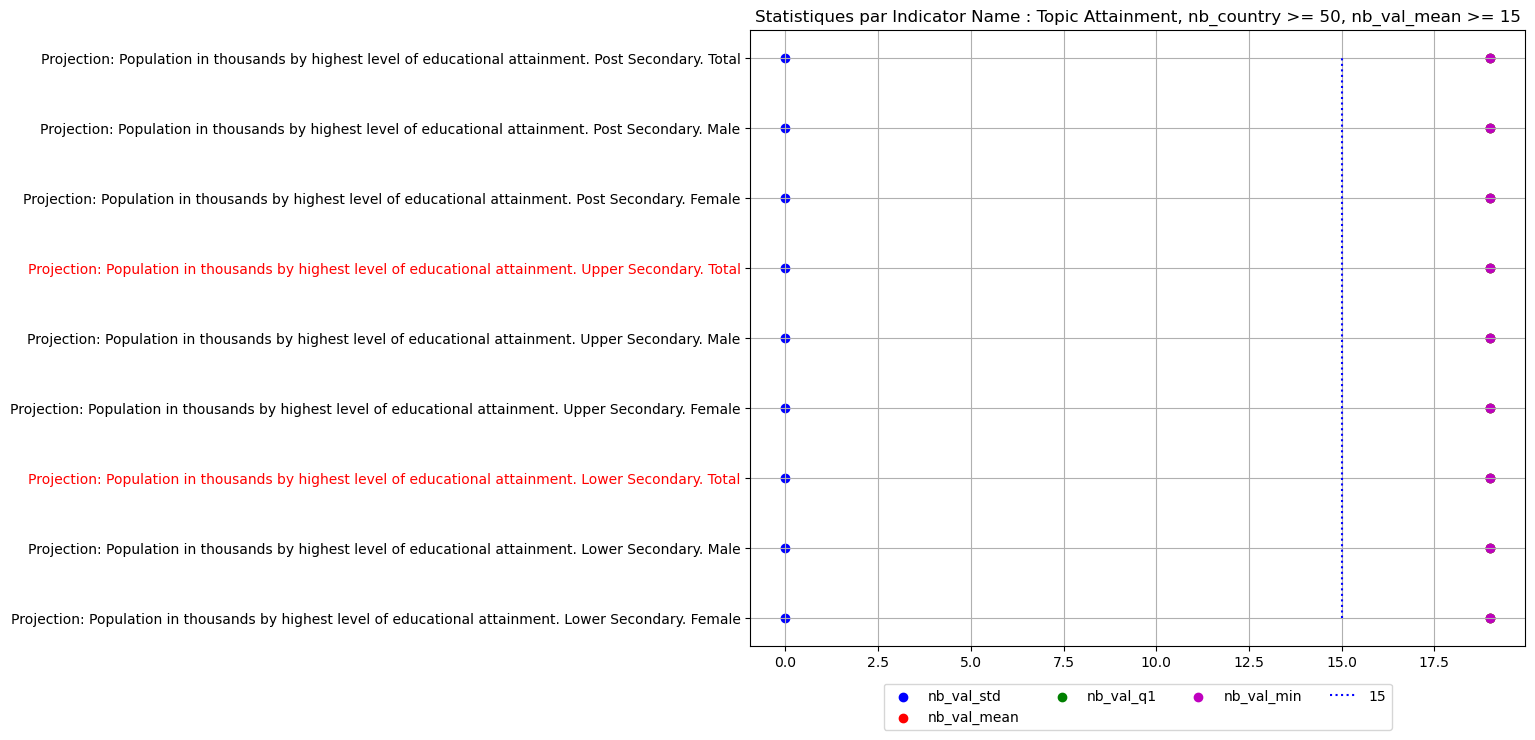

In [110]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_high_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond_high['nb_val_mean']],
                 title_topic_cond_high,
                 topic_name_array
                )

#### Other (3)

In [111]:
topic_name_array = ["Population growth (annual %)",
                    "GNI per capita, PPP (current international $)",
                    "Internet users (per 100 people)"]

##### Conditions

In [112]:
topic = topic_2000_high_up2.loc[topic_2000_high_up2['nb_series']<13, 'Topic'].values

In [113]:
cond = {'nb_country':150,
        'nb_val_mean':10
       }

In [114]:
cond_high = {'nb_country':55,
        'nb_val_mean':15
       }

##### Représentation

In [115]:
indicator_name_array = np.hstack((indicator_name_array, topic_name_array))

In [116]:
[title_topic,
 title_topic_cond,
 title_topic_cond_high
 ] = create_title_all(topic[0], cond, cond_high)

In [117]:
[series_2000_filter_topic,
 series_2000_high_filter_topic,
 series_2000_filter_topic_cond,
 series_2000_high_filter_topic_cond
] = filter_series_all(series_2000, series_2000_high, topic, cond, cond_high)

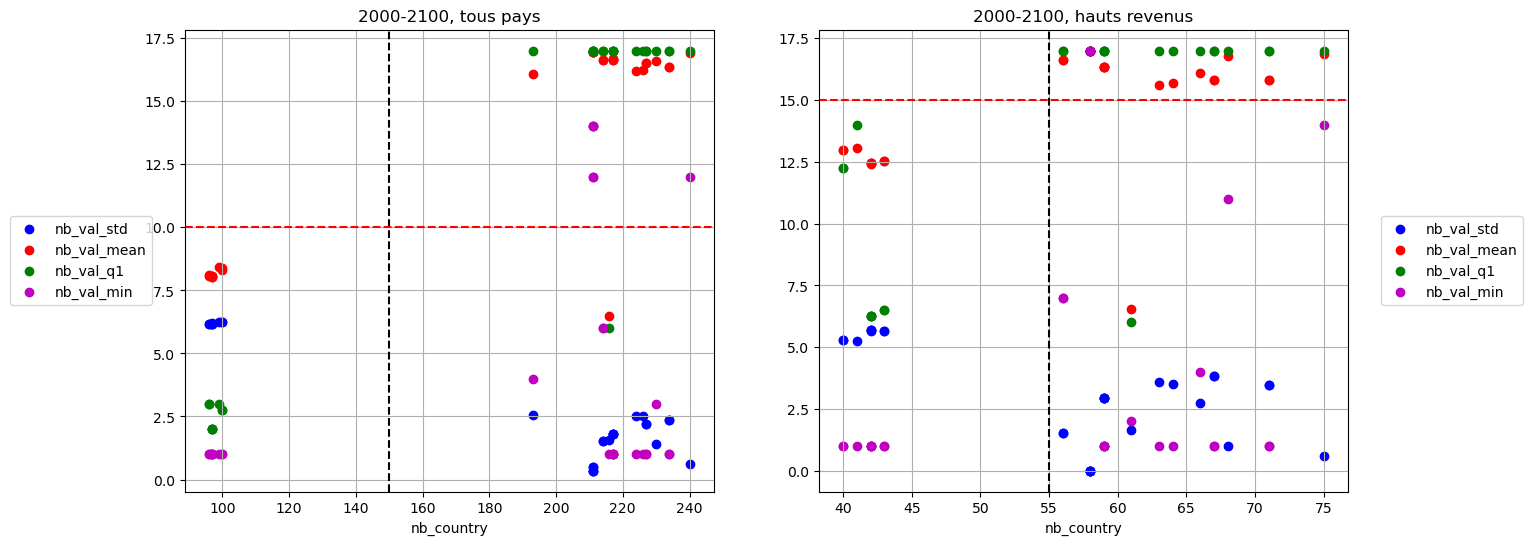

In [118]:
plot_series_country([series_2000_filter_topic, series_2000_high_filter_topic],
                    ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                    [cond, cond_high],
                    [series_2000.name, series_2000_high.name]
                   )

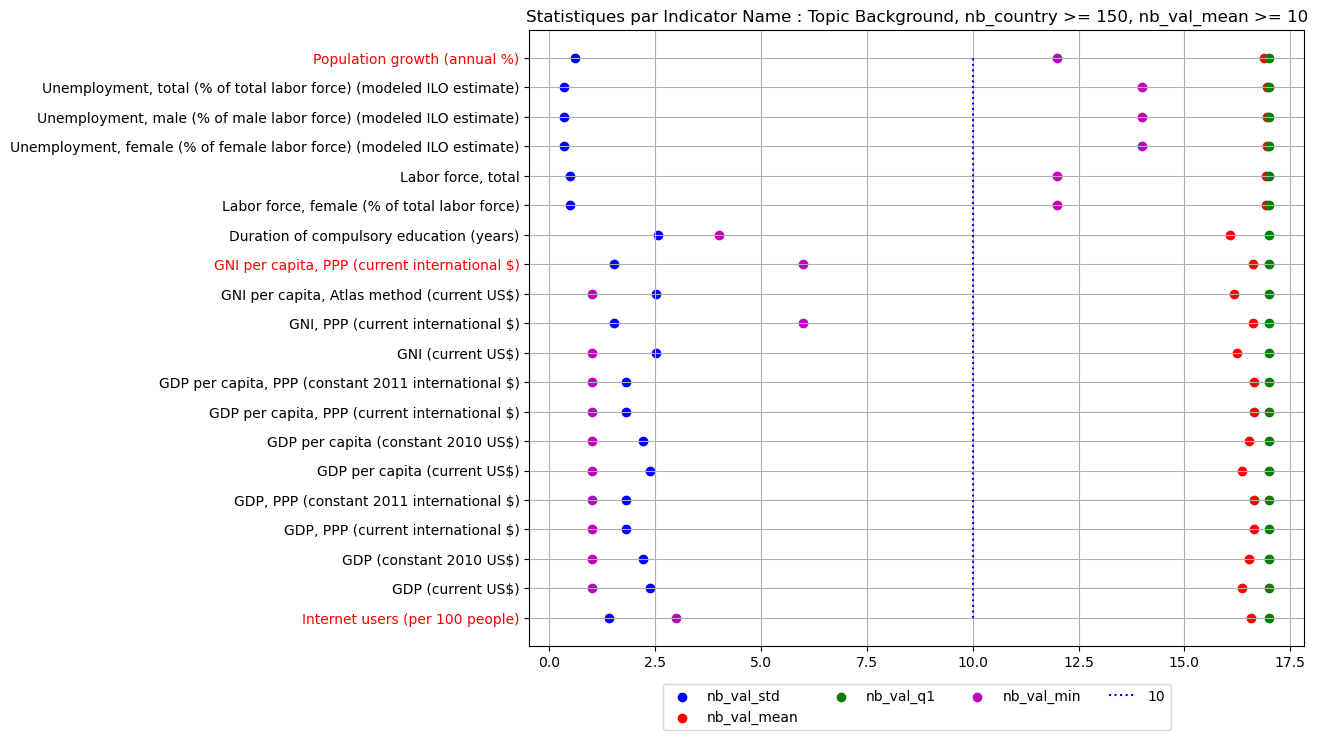

In [119]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond['nb_val_mean']],
                 title_topic_cond,
                 topic_name_array
                )

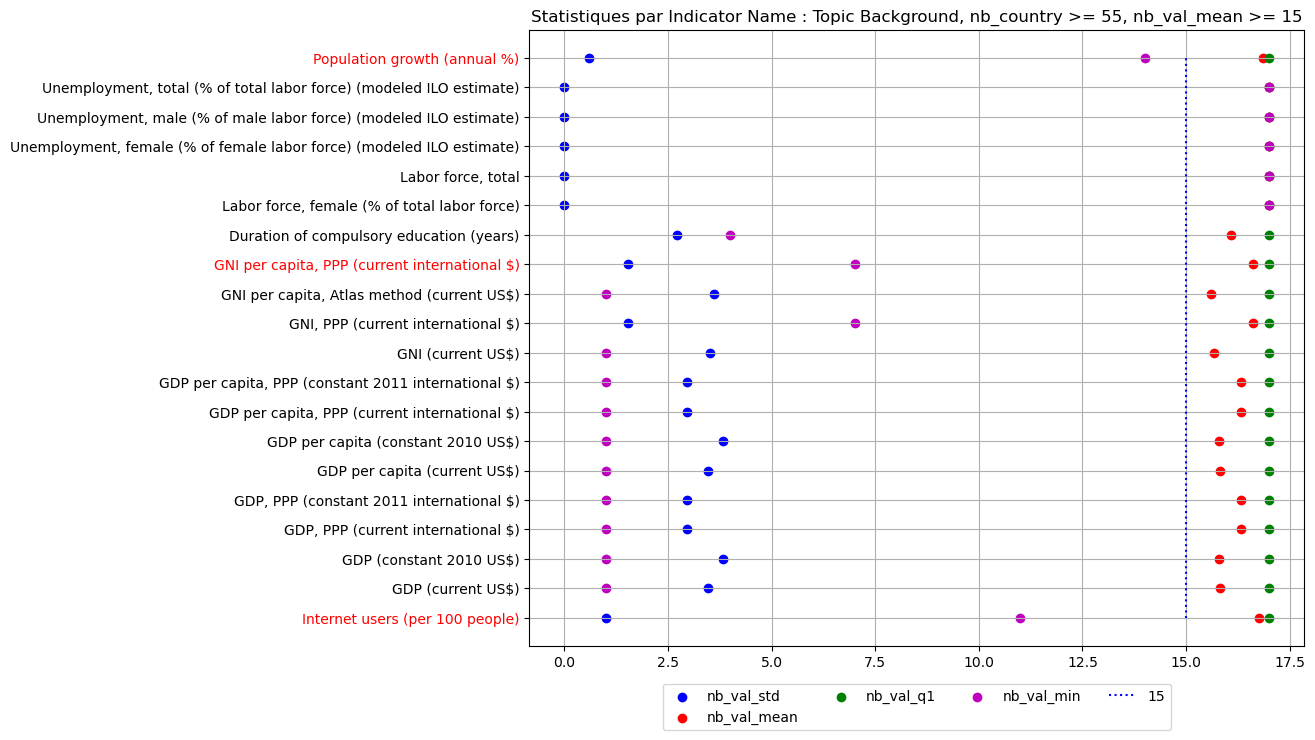

In [120]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_high_filter_topic_cond, 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [cond_high['nb_val_mean']],
                 title_topic_cond_high,
                 topic_name_array
                )

### Indicateurs choisis

#### Avant corrélation

In [121]:
indicator_deleted = 'Enrolment in secondary education, both sexes (number)'

In [122]:
indicator_name_array.shape

(11,)

In [123]:
series_2000_high_indicator = series_2000_high.loc[series_2000_high['Indicator Name'].isin(indicator_name_array)]
series_2000_high_indicator.shape

(11, 23)

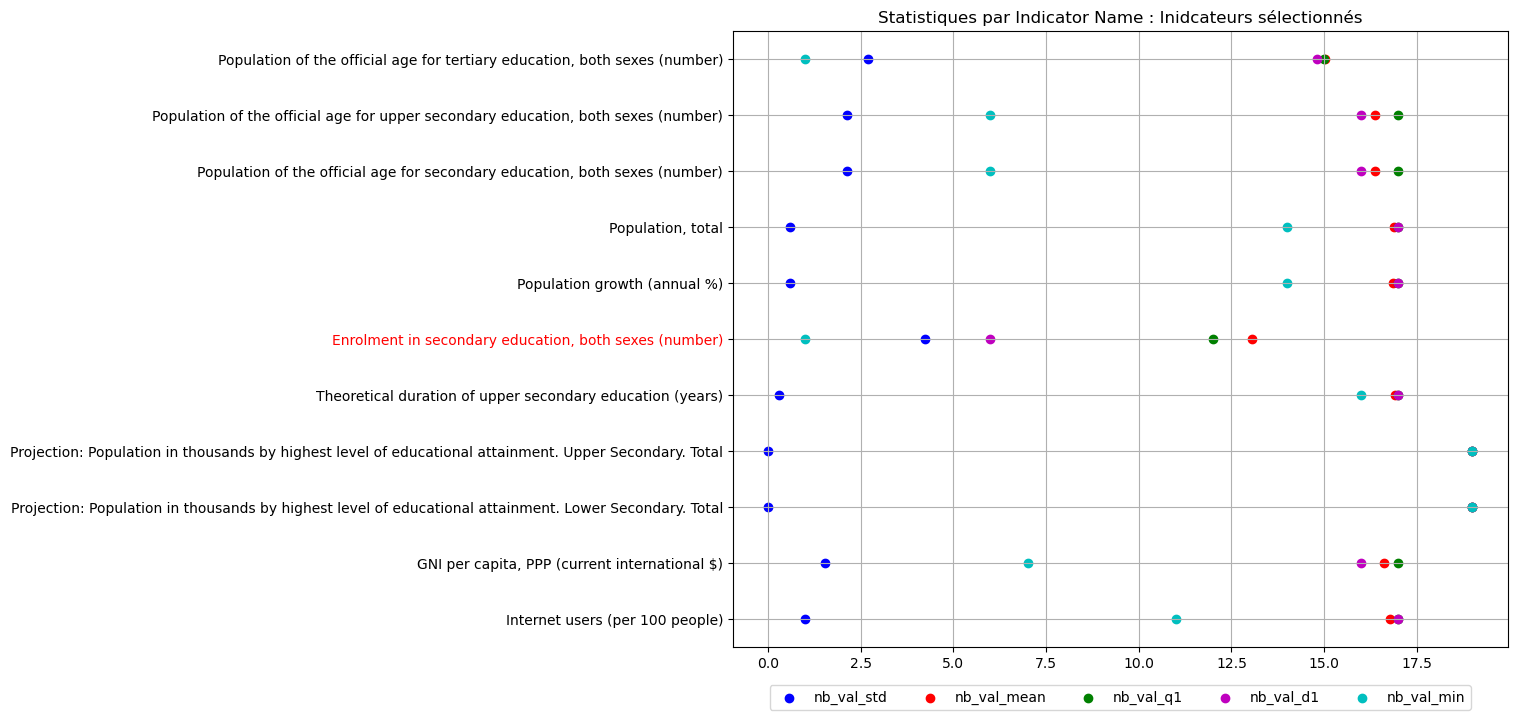

In [124]:
plt.figure(figsize=(10,8))
plot_series_stat(series_2000_high_indicator,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_d1', 'nb_val_min'],
                 [],
                 'Inidcateurs sélectionnés',
                 [indicator_deleted]
                )

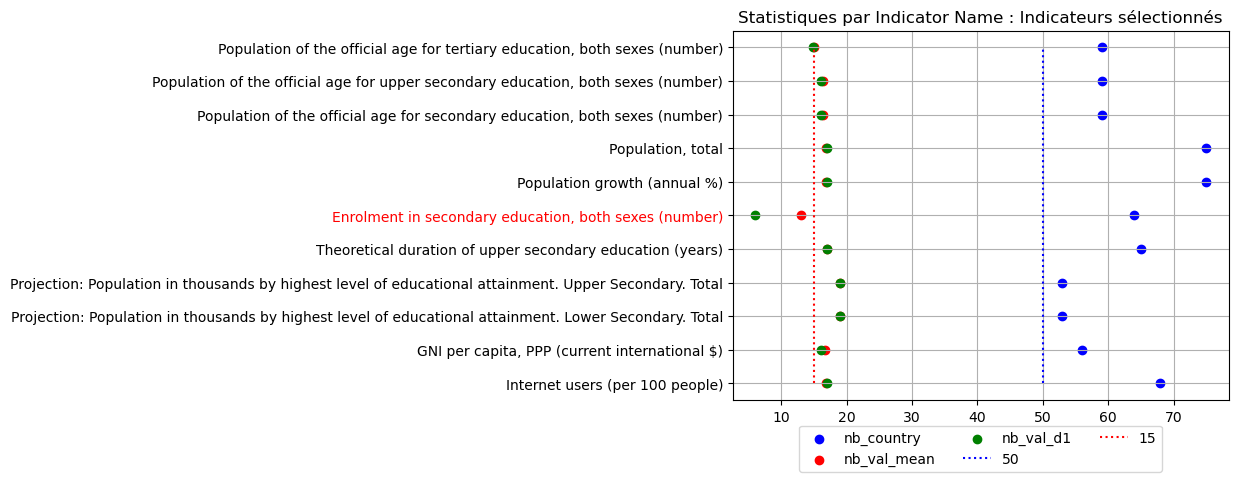

In [125]:
plot_series_stat(series_2000_high_indicator,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [50, 15],
                 'Indicateurs sélectionnés',
                 [indicator_deleted]
                )

In [126]:
indicator_name_array = list(filter(lambda str:str!=indicator_deleted, indicator_name_array))

In [127]:
series_2000_high_indicator = series_2000_high.loc[series_2000_high['Indicator Name'].isin(indicator_name_array)]
series_2000_high_indicator.shape

(10, 23)

In [128]:
series_2000_indicator = series_2000.loc[series_2000['Indicator Name'].isin(indicator_name_array)]
series_2000_indicator.shape

(10, 23)

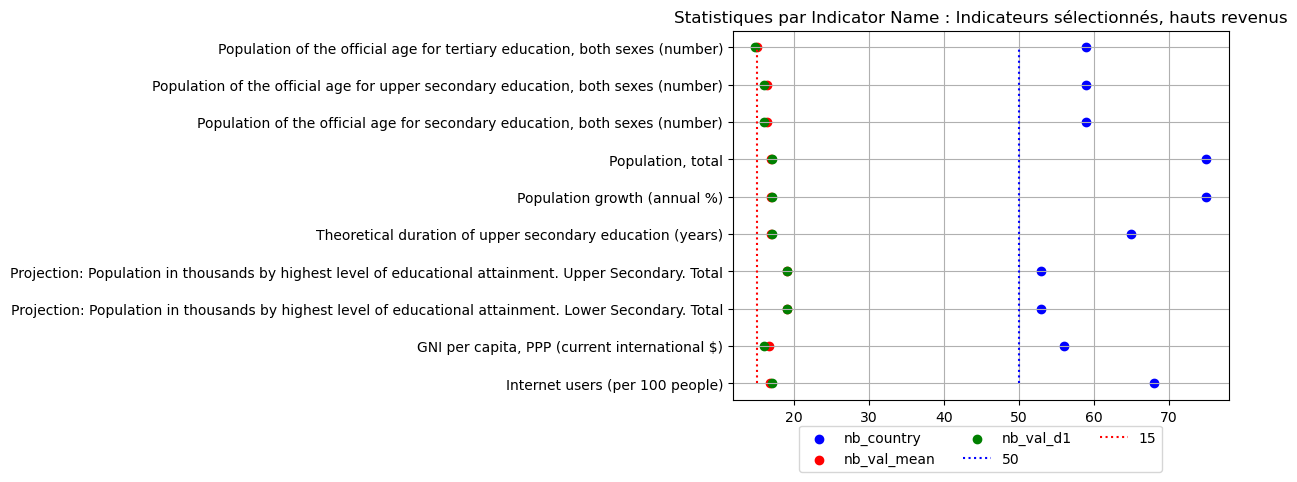

In [129]:
plot_series_stat(series_2000_high_indicator,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [50, 15],
                 'Indicateurs sélectionnés, hauts revenus',
                 []
                )

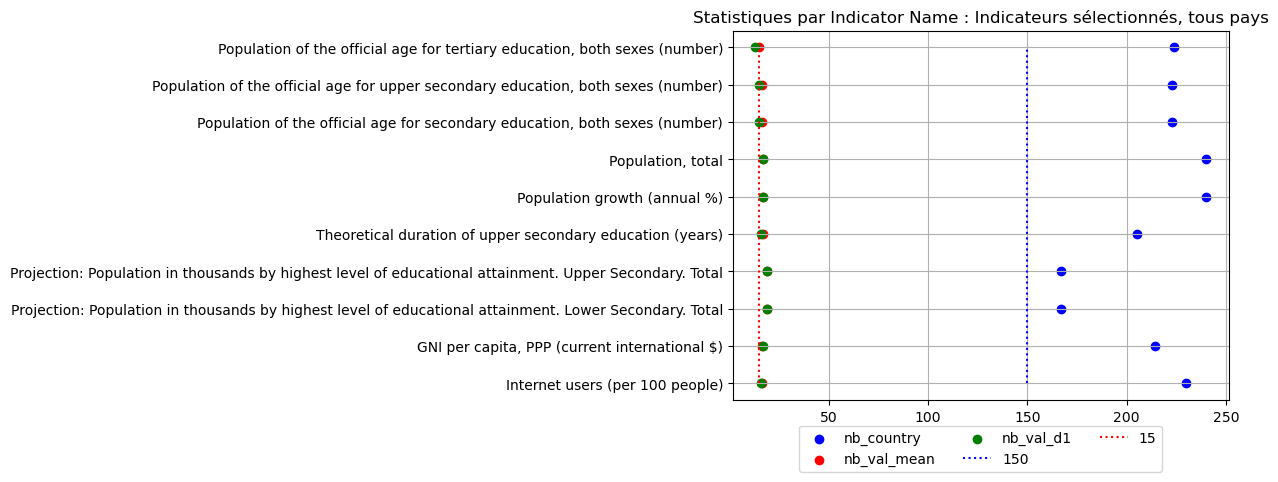

In [130]:
plot_series_stat(series_2000_indicator,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [150, 15],
                 'Indicateurs sélectionnés, tous pays',
                 []
                )

In [131]:
data_2000_indicator = data_2000.loc[(data['Indicator Code'].isin(series_2000_indicator['Series Code']))&(data_2000['nb_val'] > 0)]
data_2000_indicator.shape

(2133, 40)

#### Corrélations

In [132]:
indicator_cor1 = 'Internet users (per 100 people)'
indicator_cor2 = 'Population, total'

In [133]:
correlation_name_array = [indicator_cor1, indicator_cor2, 'Population growth (annual %)', 'Theoretical duration of upper secondary education (years)']

In [134]:
series_2000_correlation = series_2000.loc[series_2000['Indicator Name'].isin(correlation_name_array)]
series_2000_high_correlation = series_2000_high.loc[series_2000['Indicator Name'].isin(correlation_name_array)]

##### Préparation des données

In [135]:
data_2010u_indicator = pd.pivot_table(data_2000_indicator, values='2010', index='Country Code', columns='Indicator Code')
data_2015u_indicator = pd.pivot_table(data_2000_indicator, values='2015', index='Country Code', columns='Indicator Code')

In [136]:
data_2010u_indicator['nb_nan'] = data_2010u_indicator.isnull().sum(axis=1)
data_2015u_indicator['nb_nan'] = data_2015u_indicator.isnull().sum(axis=1)
data_2010u_indicator = data_2010u_indicator.loc[data_2010u_indicator['nb_nan']==0]
data_2015u_indicator = data_2015u_indicator.loc[data_2015u_indicator['nb_nan']==0]
data_2010u_indicator = data_2010u_indicator.drop(columns='nb_nan')
data_2015u_indicator = data_2015u_indicator.drop(columns='nb_nan')

In [137]:
series_2000_cor1 = series_2000.loc[series_2000['Series Code'].isin(data_2010u_indicator.columns[[0,1]])]
series_2000_cor2 = series_2000.loc[series_2000['Series Code'].isin(data_2010u_indicator.columns[[2,3,6,7,8,9]])]
series_2000_high_cor1 = series_2000_high.loc[series_2000_high['Series Code'].isin(data_2010u_indicator.columns[[0,1]])]
series_2000_high_cor2 = series_2000_high.loc[series_2000_high['Series Code'].isin(data_2010u_indicator.columns[[2,3,6,7,8,9]])]

##### Matrices de covariance

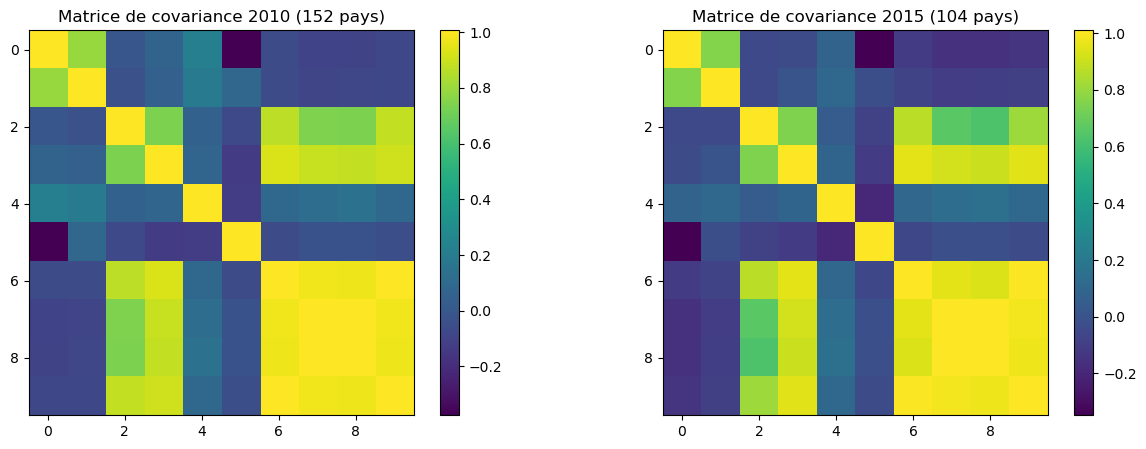

In [138]:
scaler = StandardScaler()
data_2010u_indicator_scaled = scaler.fit_transform(data_2010u_indicator)
data_2010u_indicator_scaled = pd.DataFrame(data_2010u_indicator_scaled)

scaler = StandardScaler()
data_2015u_indicator_scaled = scaler.fit_transform(data_2015u_indicator)
data_2015u_indicator_scaled = pd.DataFrame(data_2015u_indicator_scaled)

fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
img = ax.imshow(data_2010u_indicator_scaled.cov(), interpolation='nearest')
ax.set_title('Matrice de covariance 2010 ({:.0f} pays)'.format(len(data_2010u_indicator)))
plt.colorbar(img)

ax = plt.subplot(1,2,2)
img = ax.imshow(data_2015u_indicator_scaled.cov(), interpolation='nearest')
ax.set_title('Matrice de covariance 2015 ({:.0f} pays)'.format(len(data_2015u_indicator)))
plt.colorbar(img)

plt.show()

##### Choix des indicateurs corrélés

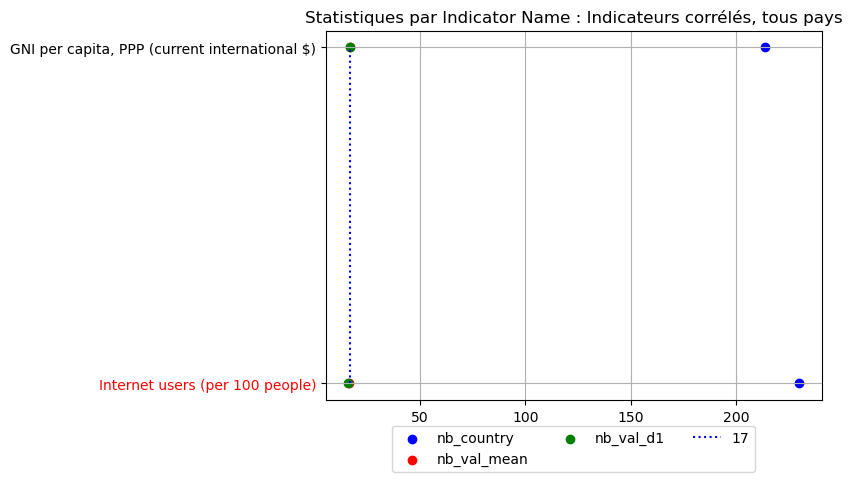

In [139]:
plot_series_stat(series_2000_cor1,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [17],
                 'Indicateurs corrélés, tous pays',
                 [indicator_cor1]
                )

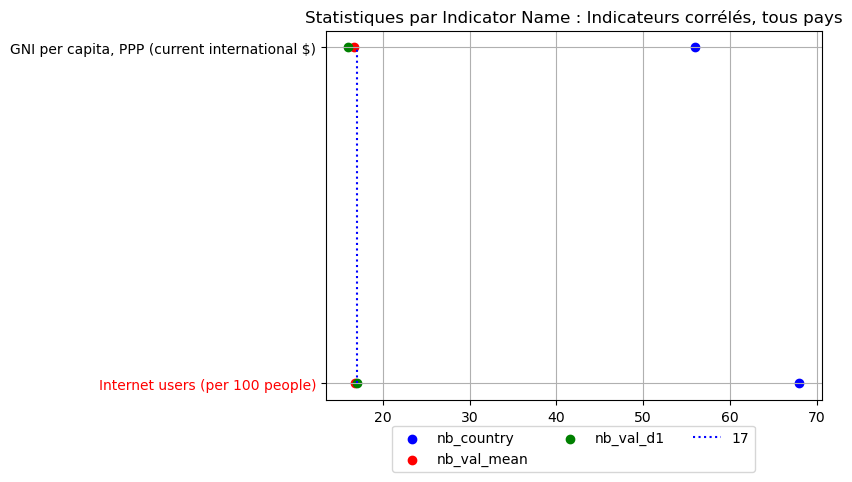

In [140]:
plot_series_stat(series_2000_high_cor1,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [17],
                 'Indicateurs corrélés, tous pays',
                 [indicator_cor1]
                )

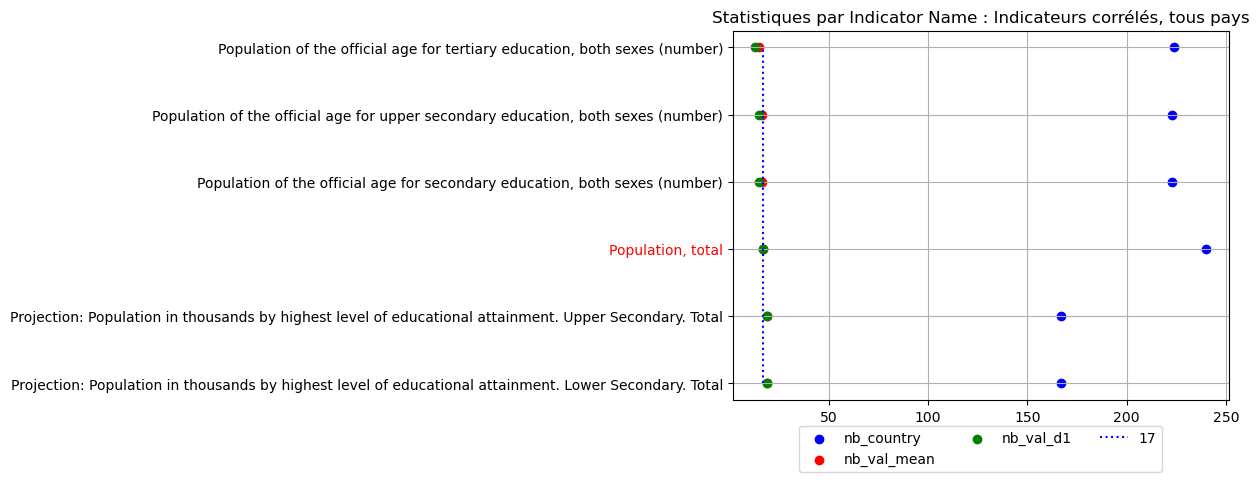

In [141]:
plot_series_stat(series_2000_cor2,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [17],
                 'Indicateurs corrélés, tous pays',
                 [indicator_cor2]
                )

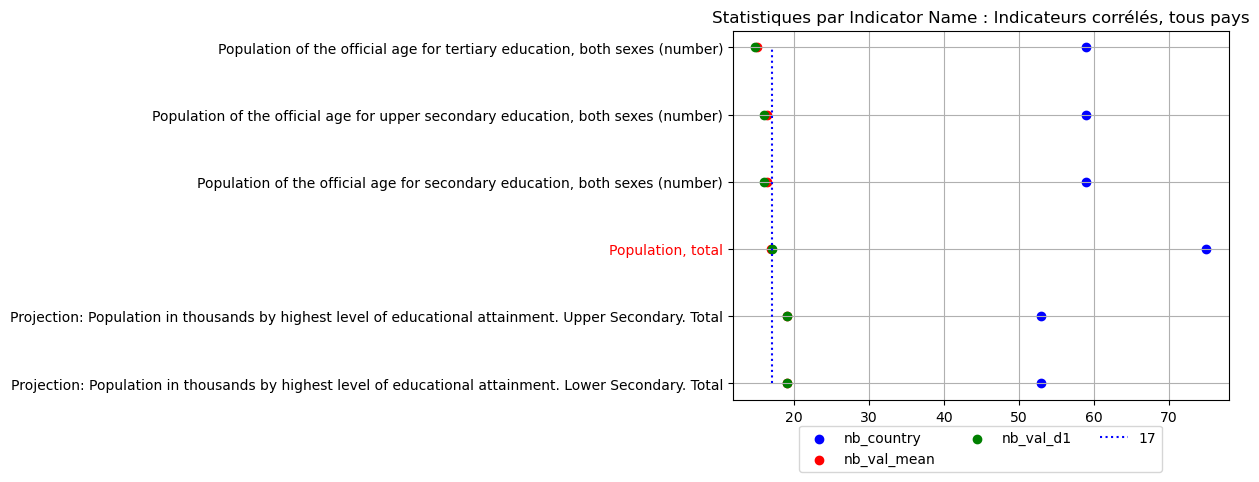

In [142]:
plot_series_stat(series_2000_high_cor2,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [17],
                 'Indicateurs corrélés, tous pays',
                 [indicator_cor2]
                )

##### Résumé des indicateurs choisis (non corrélés)

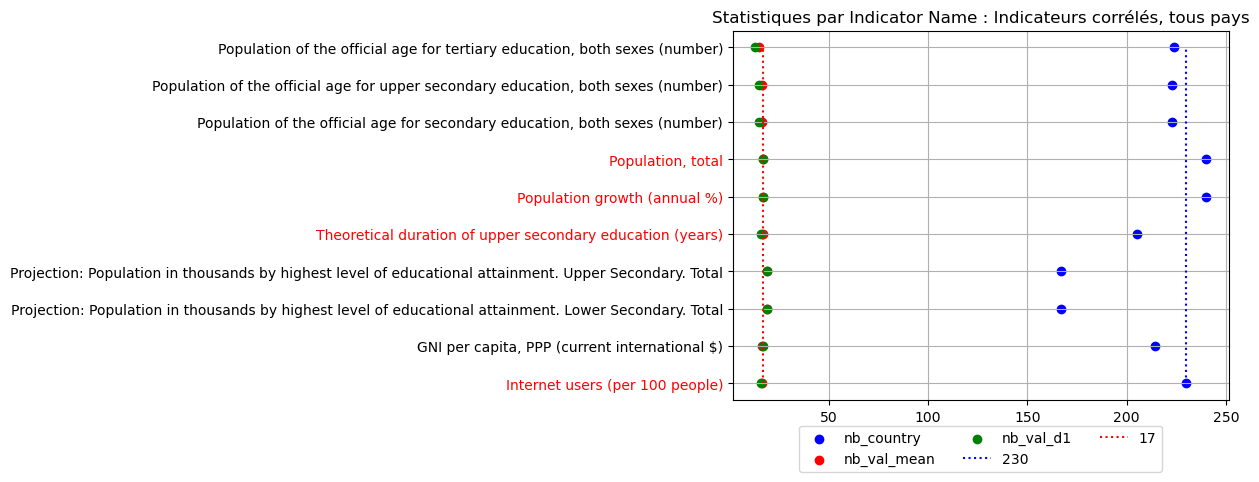

In [143]:
plot_series_stat(series_2000_indicator,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [230, 17],
                 'Indicateurs corrélés, tous pays',
                 correlation_name_array
                )

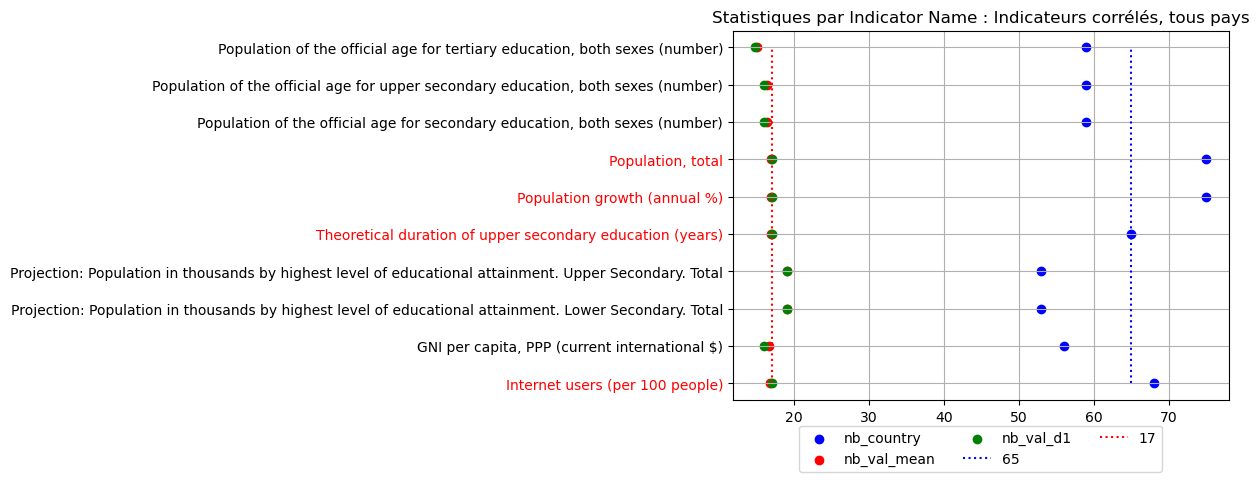

In [144]:
plot_series_stat(series_2000_high_indicator,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [65, 17],
                 'Indicateurs corrélés, tous pays',
                 correlation_name_array
                )

#### Résumé

In [145]:
series_2000_correlation['Indicator Name'].tolist()

['Internet users (per 100 people)',
 'Theoretical duration of upper secondary education (years)',
 'Population growth (annual %)',
 'Population, total']

In [146]:
series_2000_correlation['Topic'].value_counts()

Topic
Infrastructure: Communications    1
Secondary                         1
Health: Population: Dynamics      1
Health: Population: Structure     1
Name: count, dtype: int64

In [147]:
data_2000_correlation = data_2000.loc[(data['Indicator Code'].isin(series_2000_correlation['Series Code']))&(data_2000['nb_val'] > 0)]
data_2000_correlation.shape

(915, 40)

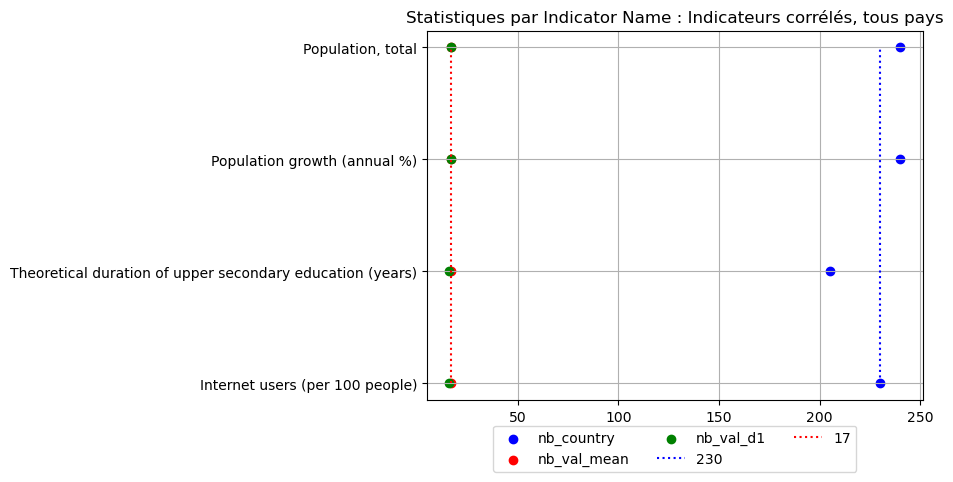

In [148]:
plot_series_stat(series_2000_correlation,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [230, 17],
                 'Indicateurs corrélés, tous pays',
                 []
                )

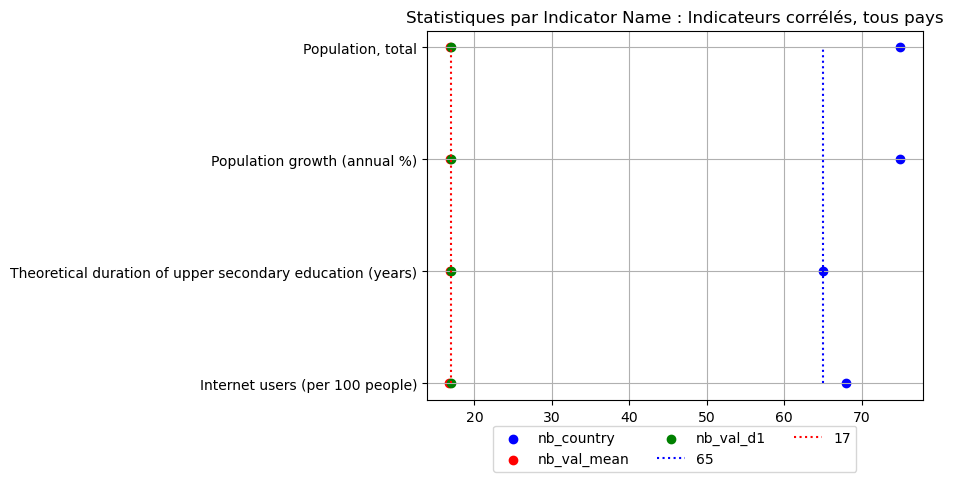

In [149]:
plot_series_stat(series_2000_high_correlation,
                 'Indicator Name',
                 ['nb_country','nb_val_mean', 'nb_val_d1'],
                 [65, 17],
                 'Indicateurs corrélés, tous pays',
                 []
                )

### Choix des pays

In [150]:
nb_series_selected_up = len(series_2000_correlation)
nb_val_selected_up = 61

#### Statistiques et sélection des données

In [151]:
country['nb_series_selected'] = country.apply(
    lambda row:len(data_2000_correlation.loc[data_2000_correlation['Country Code'] == row[0], 'nb_val']), axis=1)

In [152]:
country['nb_val_selected'] = country.apply(
    lambda row:data_2000_correlation.loc[data_2000_correlation['Country Code'] == row[0], 'nb_val'].sum(), axis=1)

In [153]:
country_selected_temp = country.loc[country['nb_series_selected'] >= nb_series_selected_up]
country_selected = country_selected_temp.loc[country_selected_temp['nb_val_selected'] >= nb_val_selected_up]
country_high_selected = country_selected.loc[country_selected['Income Group'].isin(income_high_array)]

In [154]:
country_nbseries = pd.pivot_table(country, index='nb_series_selected', columns='Income Group', aggfunc="size")
country_nbval = pd.pivot_table(country_selected_temp, index='nb_val_selected', columns='Income Group', aggfunc="size")

In [155]:
data_2000_country = data_2000_correlation.loc[data_2000_correlation['Country Code'].isin(country_selected['Country Code'])]

#### Répartition des pays

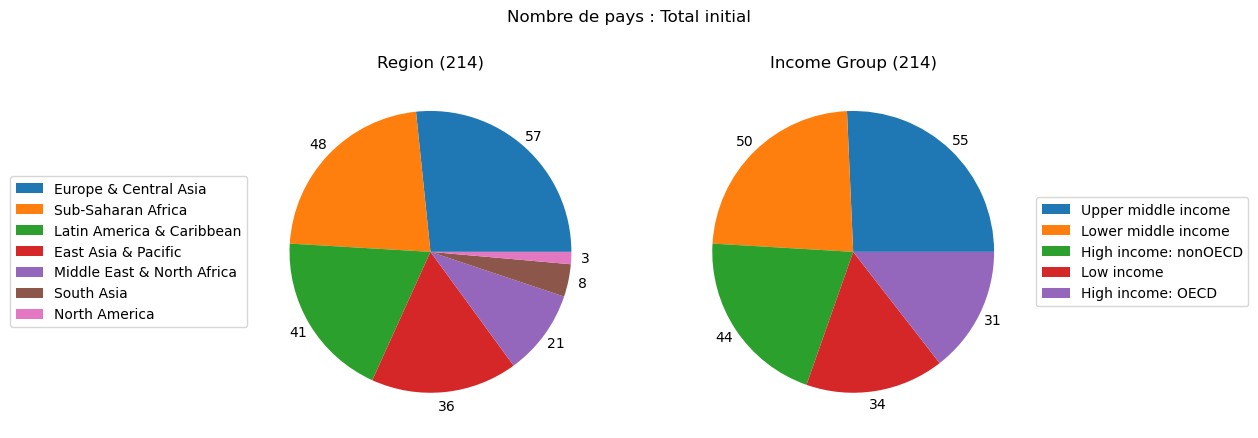

In [156]:
plot_repartition_country(country, 'Total initial')

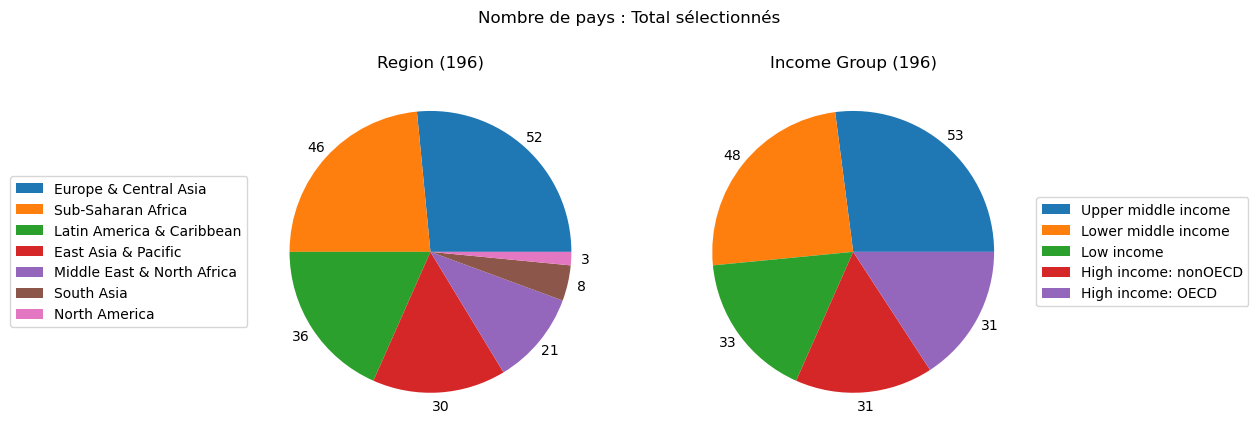

In [157]:
plot_repartition_country(country_selected, 'Total sélectionnés')

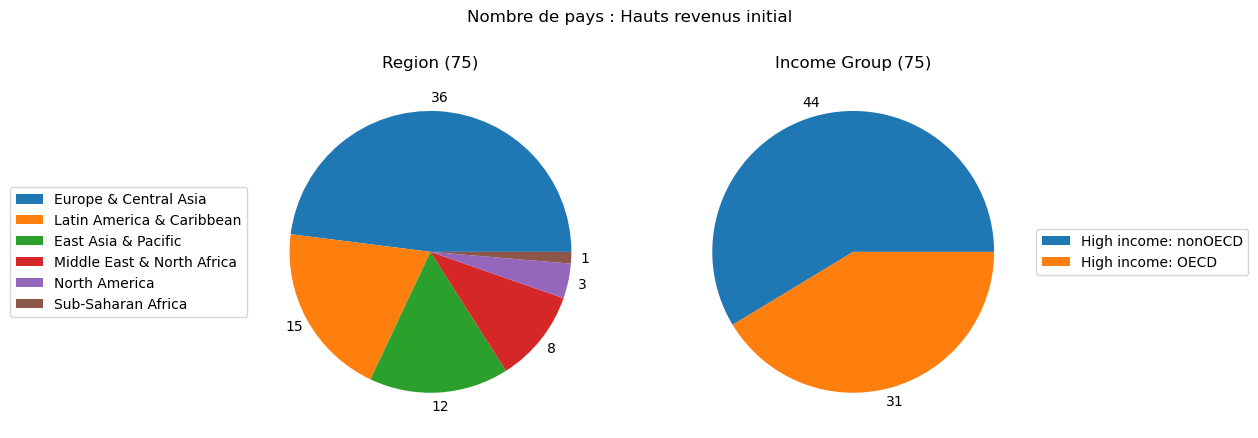

In [158]:
plot_repartition_country(country_high, 'Hauts revenus initial')

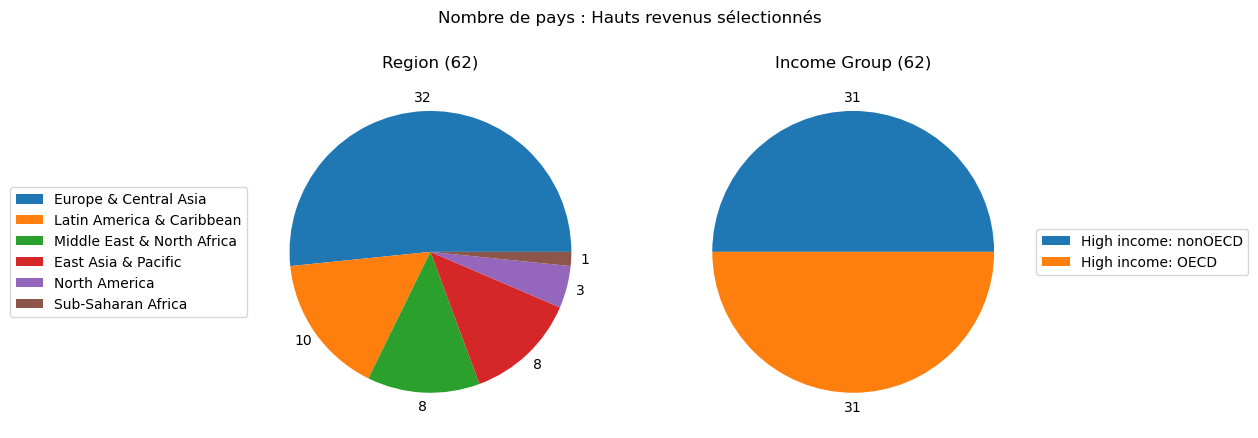

In [159]:
plot_repartition_country(country_high_selected, 'Hauts revenus sélectionnés')

#### Ratios de pays sélectionnés

In [160]:
regions = pd.DataFrame()
regions['nb_init'] = country.groupby('Region').size()

regions_selected = pd.DataFrame()
regions_selected['nb_selected'] = country_selected.groupby('Region').size()
regions = regions.join(regions_selected, on="Region")

regions_high = pd.DataFrame()
regions_high['nb_high'] = country_high.groupby('Region').size()
regions = regions.join(regions_high, on="Region")

regions_high_selected = pd.DataFrame()
regions_high_selected['nb_high_selected'] = country_high_selected.groupby('Region').size()
regions = regions.join(regions_high_selected, on="Region")

regions['ratio_high'] = regions['nb_high']/regions['nb_init']
regions['ratio_selected'] = regions['nb_selected']/regions['nb_init']
regions['ratio_high_selected'] = regions['nb_high_selected']/regions['nb_high']

In [161]:
regions = regions.sort_values('nb_init', ascending = False)

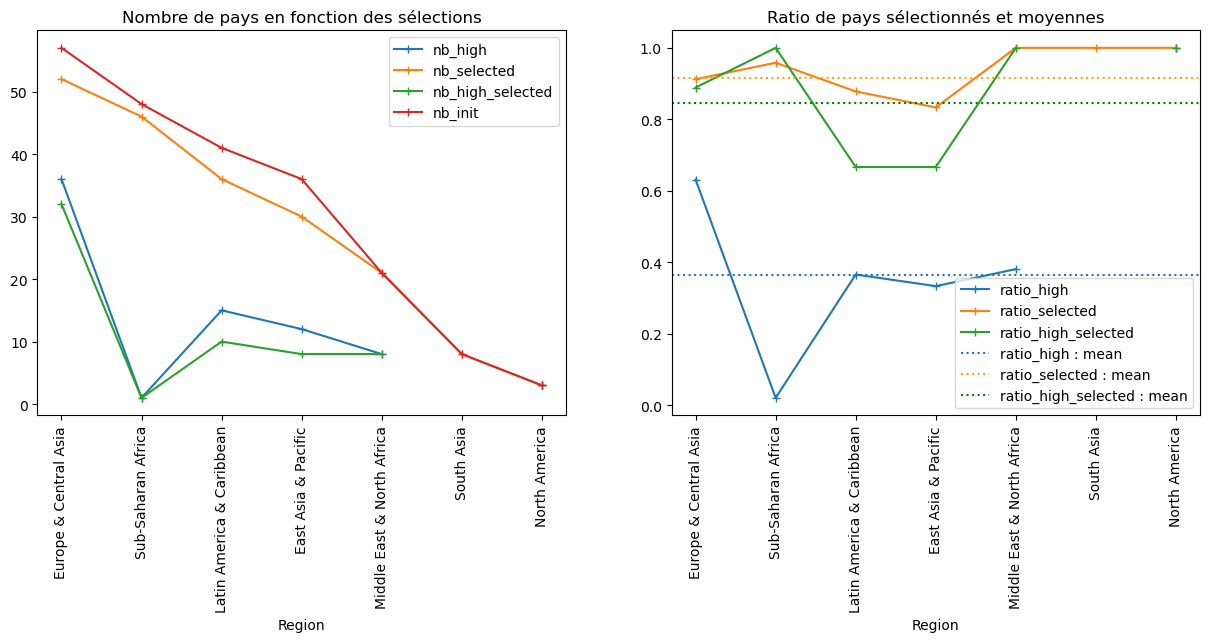

In [162]:
fig = plt.figure(figsize=(15,5))
ax = plt.subplot(1,2,1)
regions[['nb_high', 'nb_selected', 'nb_high_selected', 'nb_init']].plot(marker = '+', ax = ax, rot=90)
ax.set_title('Nombre de pays en fonction des sélections')
ax = plt.subplot(1,2,2)
regions[['ratio_high', 'ratio_selected', 'ratio_high_selected']].plot(marker = '+', ax = ax, rot=90)
ax.axhline(y=np.average(regions.loc[regions['ratio_high']>0, 'ratio_high'], weights=regions.loc[regions['ratio_high']>0, 'nb_init']),
           ls=':', label='ratio_high : mean')
ax.axhline(y=np.average(regions['ratio_selected'], weights=regions['nb_init']), color = 'orange',
           ls=':', label='ratio_selected : mean')
ax.axhline(y=np.average(regions.loc[regions['ratio_high_selected']>0, 'ratio_high_selected'], weights=regions.loc[regions['ratio_high']>0, 'nb_init']),
           ls=':', color='g', label='ratio_high_selected : mean')
ax.legend()
ax.set_title('Ratio de pays sélectionnés et moyennes')
plt.show()

#### Pays non sélectionnés

In [163]:
data_2000_high_hide = data_2000_high.loc[
    (~data_2000_high['Country Code'].isin(country_high_selected['Country Code']))
    &(data_2000['Indicator Name']=='Population, total'),
    ['Country Code', 'Country Name','2010']
]
data_2000_high_hide = data_2000_high_hide.set_index('Country Code')
data_2000_high_hide = data_2000_high_hide.merge(country, how='inner', on='Country Code')

data_2000_hide = data_2000.loc[
    (~data_2000['Country Code'].isin(country_selected['Country Code']))
    &(data_2000['Indicator Name']=='Population, total'),
    ['Country Code', 'Country Name','2010']
]
data_2000_hide = data_2000_hide.set_index('Country Code')
data_2000_hide = data_2000_hide.merge(country, how='inner', on='Country Code')

In [164]:
data_2000_high_hide_pivot = pd.pivot_table(data_2000_high_hide, values='2010', index='Country Name', columns='Region')
data_2000_hide_pivot = pd.pivot_table(data_2000_hide, values='2010', index='Country Name', columns='Income Group')

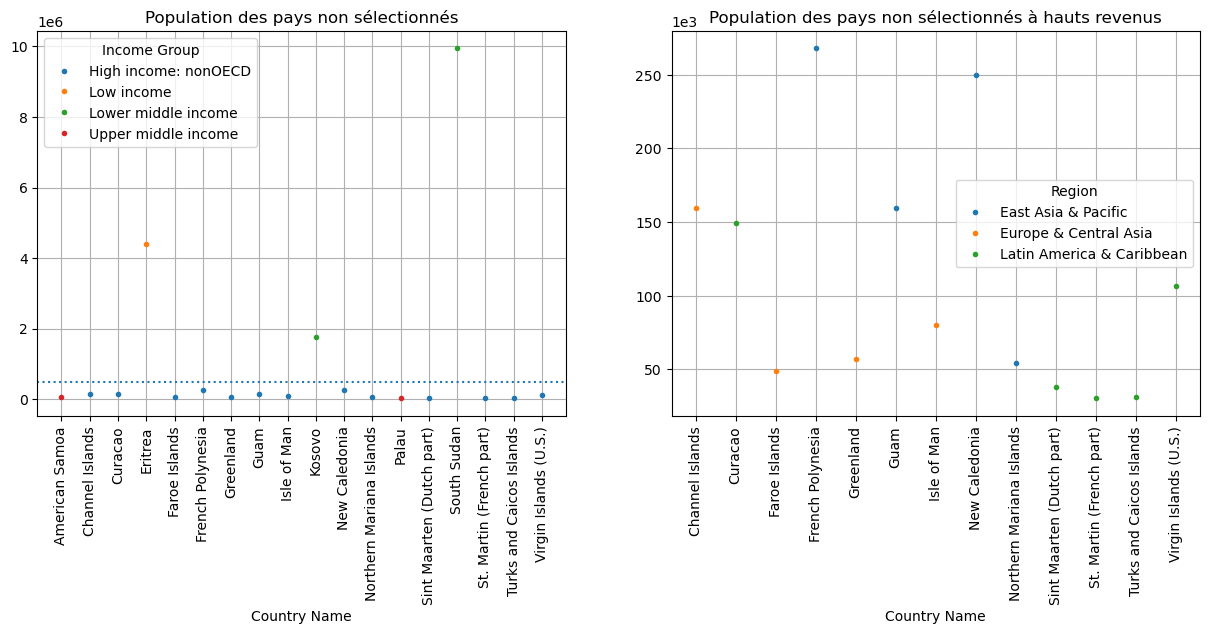

In [165]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data_2000_hide_pivot.plot(style='.', rot=90, ax=ax)
ax.set_xticks(range(len(data_2000_hide_pivot)))
ax.set_xticklabels(data_2000_hide_pivot.index.tolist())
ax.axhline(y=5e5, linestyle=':')
ax.ticklabel_format(axis='y', scilimits = (6,6))
ax.grid()
ax.set_title('Population des pays non sélectionnés')

ax = plt.subplot(1,2,2)
data_2000_high_hide_pivot.plot(style='.', rot=90, ax=ax)
ax.set_xticks(range(len(data_2000_high_hide_pivot)))
ax.set_xticklabels(data_2000_high_hide_pivot.index.tolist())
ax.ticklabel_format(axis='y', scilimits = (3,3))
ax.set_title('Population des pays non sélectionnés à hauts revenus')
ax.grid()

plt.show()

#### Répartition des valeurs de sélection

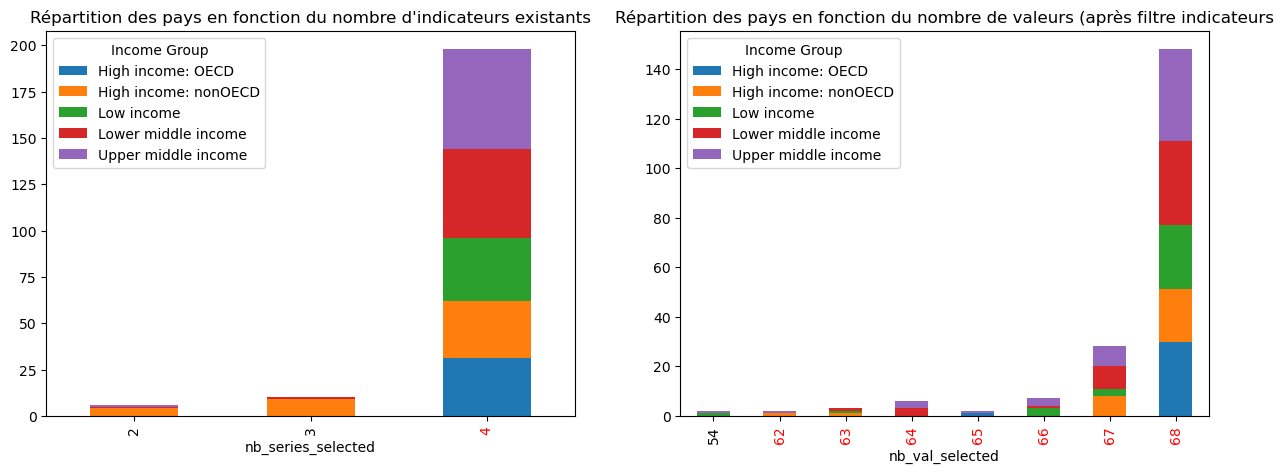

In [166]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
country_nbseries.plot(kind='bar', stacked=True, ax=ax)
y_label_index, = np.where(country_nbseries.index == nb_series_selected_up)
plt.setp(ax.get_xticklabels()[y_label_index[0]], color='red')
ax.set_title('Répartition des pays en fonction du nombre d\'indicateurs existants')

ax = plt.subplot(1,2,2)
country_nbval.plot(kind='bar', stacked=True, ax=ax)
for i in range(nb_val_selected_up, max(country_selected_temp['nb_val_selected'].value_counts().index)+1):
    if(i in country_nbval.index):
        y_label_index, = np.where(country_nbval.index == i)
        plt.setp(ax.get_xticklabels()[y_label_index[0]], color='red')
ax.set_title('Répartition des pays en fonction du nombre de valeurs (après filtre indicateurs')

plt.show()

### Complétion des valeurs manquantes

In [167]:
indicator_pop = 'Population growth (annual %)'
indicator_dur = 'Theoretical duration of upper secondary education (years)'
indicator_int = 'Internet users (per 100 people)'
income_high_array.append(np.nan)
income_upper_array = ['Upper middle income']
income_lower_array = ['Lower middle income']
income_low_array = ['Low income']

In [168]:
years = ['2000', '2005', '2010', '2015']

In [169]:
country_name_delete_array = ['Korea, Dem. People’s Rep.', 'Gibraltar', 'San Marino']
country_code_delete_array = data_2000.loc[data_2000['Country Name'].isin(country_name_delete_array), 'Country Code'].unique()

In [170]:
years_delete = ['2000', '2001', '2002', '2003', '2004', '2016', '2017', '2020']

#### Fonctions de représentation

In [171]:
def select_country_indicator_income(data, indicator, income_array):
    country_array = data.loc[(data['Indicator Name']==indicator)
                                    &(data['Country Code'].isin(country.loc[country['Income Group'].isin(income_array), 'Country Code'])),
                                    'Country Name']
    return country_array

In [172]:
def melt_pivot_merge_data_indicator_country(data_empty, data_fill, indicator, country_array):
    data_empty_melt = pd.melt(data_empty.loc[(data_empty['Indicator Name']==indicator)&(data_empty['Country Name'].isin(country_array))],
                          id_vars=data_empty.columns[:4], var_name='year')
    data_fill_melt = pd.melt(data_fill.loc[(data_empty['Indicator Name']==indicator)&(data_fill['Country Name'].isin(country_array))],
                          id_vars=data_fill.columns[:4], var_name='year')
    data_empty_pivot = pd.pivot_table(data_empty_melt, index='year', columns='Country Name', values='value')
    data_fill_pivot = pd.pivot_table(data_fill_melt, index='year', columns='Country Name', values='value')
    data_merge = data_fill_pivot.merge(data_empty_pivot, how = 'outer', on='year', suffixes=('_fill', '_empty'))
    return data_merge

In [186]:
def plot_data_fill_subplot(data_merge, years, country, country_name_delete_array, r_subplot, n_subplot, title_string):
    ax = plt.subplot(r_subplot,2,n_subplot)
    for string in years:
        ax.axvline(x=np.where(data_merge.index == string)[0][0], ls='-', color='lightgrey')
    c_int = list(colormaps['tab20'].colors[:2*len(country)]) # pour avoir une list de la bonne longueur
    styles = {}
    for i in range(len(country)):
        c_int[i] = colormaps['tab10'].colors[i]
        c_int[len(country)+i] = colormaps['tab10'].colors[i]
        styles[country.values[i]+'_fill'] = ':'
        styles[country.values[i]+'_empty'] = '+'
    
    data_merge.plot(ax=ax, style=styles, cmap=colors.ListedColormap(c_int))

    labelcolor_list = ['k' for i in range(len(data_merge.columns))]
    for string in country_name_delete_array:
        if(string+'_fill' in data_merge.columns):
            labelcolor_list[np.where(data_merge.columns == string+'_fill')[0][0]] = 'r'
            labelcolor_list[np.where(data_merge.columns == string+'_empty')[0][0]] = 'r'
    
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2, labelcolor=labelcolor_list)
    ax.set_title(title_string)

#### Traitement (complétion et sélection des pays et années)

In [174]:
data_2000_country_past = data_2000_country.drop([str(i) for i in range(2025, 2105,5)], axis=1)
data_2000_country_past = data_2000_country_past.drop('nb_val', axis=1)
data_2000_past = data_2000.drop([str(i) for i in range(2025, 2105,5)], axis=1)
data_2000_past = data_2000_past.drop('nb_val', axis=1)

In [175]:
data_empty = data_2000_country_past.loc[
        data_2000_country_past[[
            str(i) for i in range(2000,2015)]]
        .isnull().sum(axis=1)>0]

In [176]:
country_empty_pop = select_country_indicator_income(data_empty, indicator_pop, country['Income Group'].unique())
country_empty_dur = select_country_indicator_income(data_empty, indicator_dur, country['Income Group'].unique())
country_empty_high = select_country_indicator_income(data_empty, indicator_int, income_high_array)
country_empty_upper = select_country_indicator_income(data_empty, indicator_int, income_upper_array)
country_empty_lower = select_country_indicator_income(data_empty, indicator_int, income_lower_array)
country_empty_low = select_country_indicator_income(data_empty, indicator_int, income_low_array)

In [177]:
for i in range(len(data_2000_country_past)):
    for j in range(2001, 2015):
        if(math.isnan(data_2000_country_past.iloc[i,data_2000_country_past.columns.get_loc(str(j))])):
            if(not math.isnan(data_2000_country_past.iloc[i,data_2000_country_past.columns.get_loc(str(j-1))])):
                k=1
                while((math.isnan(data_2000_country_past.iloc[i,data_2000_country_past.columns.get_loc(str(j))]))
                      &(k<7)
                      &(j+k<2016)):
                    if(not math.isnan(data_2000_country_past.iloc[i,data_2000_country_past.columns.get_loc(str(j+k))])):
                        for l in range(k):
                            data_2000_country_past.iloc[
                                i,data_2000_country_past.columns.get_loc(str(j+l))
                            ]= data_2000_country_past.iloc[
                                    i,data_2000_country_past.columns.get_loc(str(j-1))
                                ]+(l+1)/(k+1)*(data_2000_country_past.iloc[
                                    i,data_2000_country_past.columns.get_loc(str(j+k))
                                ]-
                                    data_2000_country_past.iloc[
                                    i,data_2000_country_past.columns.get_loc(str(j-1))
                                ])
                    k=k+1

In [178]:
data_empty2 = data_2000_country_past.loc[
        data_2000_country_past[[
            str(i) for i in range(2000,2015)]]
        .isnull().sum(axis=1)>0]

#### Évolution des valeurs manquantes

In [179]:
data_empty['Indicator Name'].value_counts()

Indicator Name
Internet users (per 100 people)                              25
Population growth (annual %)                                  1
Theoretical duration of upper secondary education (years)     1
Name: count, dtype: int64

In [180]:
data_empty2['Indicator Name'].value_counts()

Indicator Name
Internet users (per 100 people)    11
Name: count, dtype: int64

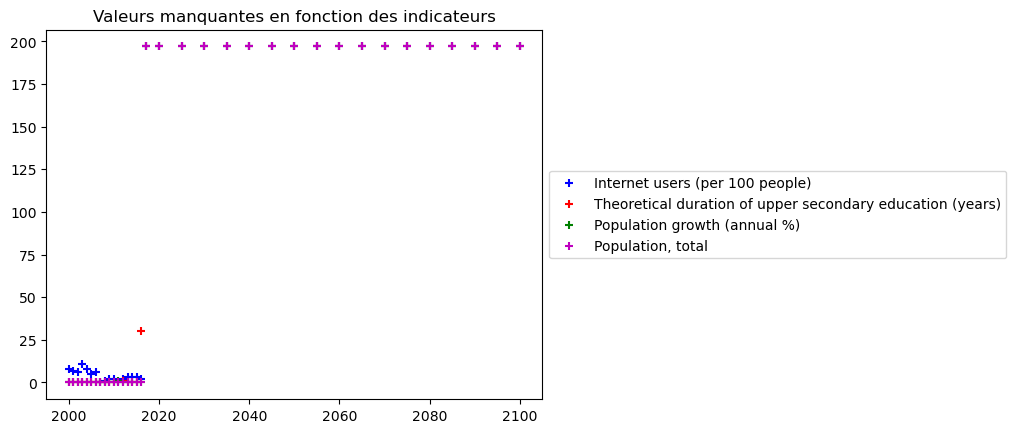

In [181]:
colors_list = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(4):
    plt.scatter(data_years,
            data_2000_country.loc[
                data_2000_country['Indicator Code']==series_2000_correlation['Series Code'].iloc[i]
                ].iloc[:,4:-1].isnull().sum(),
               color = colors_list[i], label = series_2000_correlation['Indicator Name'].iloc[i], marker='+')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Valeurs manquantes en fonction des indicateurs')
plt.show()

#### Représentation des valeurs complétées

In [182]:
data_merge_pop = melt_pivot_merge_data_indicator_country(data_empty, data_2000_country_past, indicator_pop, country_empty_pop)
data_merge_dur = melt_pivot_merge_data_indicator_country(data_empty, data_2000_country_past, indicator_dur, country_empty_dur)
data_merge_high = melt_pivot_merge_data_indicator_country(data_empty, data_2000_country_past, indicator_int, country_empty_high)
data_merge_upper = melt_pivot_merge_data_indicator_country(data_empty, data_2000_country_past, indicator_int, country_empty_upper)
data_merge_lower = melt_pivot_merge_data_indicator_country(data_empty, data_2000_country_past, indicator_int, country_empty_lower)
data_merge_low = melt_pivot_merge_data_indicator_country(data_empty, data_2000_country_past, indicator_int, country_empty_low)

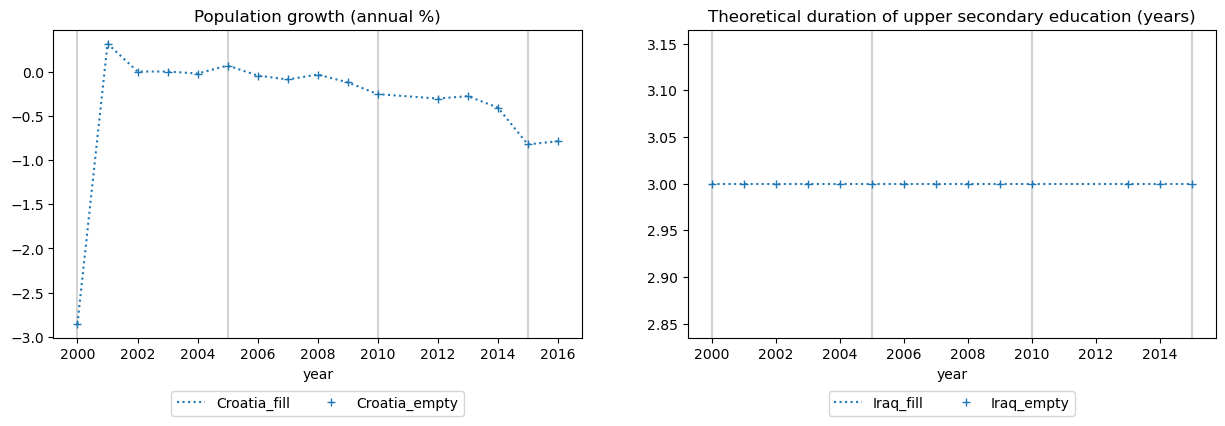

In [183]:
fig = plt.figure(figsize=(15,4))
plot_data_fill_subplot(data_merge_pop, years, country_empty_pop, country_name_delete_array, 1, 1, indicator_pop)
plot_data_fill_subplot(data_merge_dur, years, country_empty_dur, country_name_delete_array, 1, 2, indicator_dur)

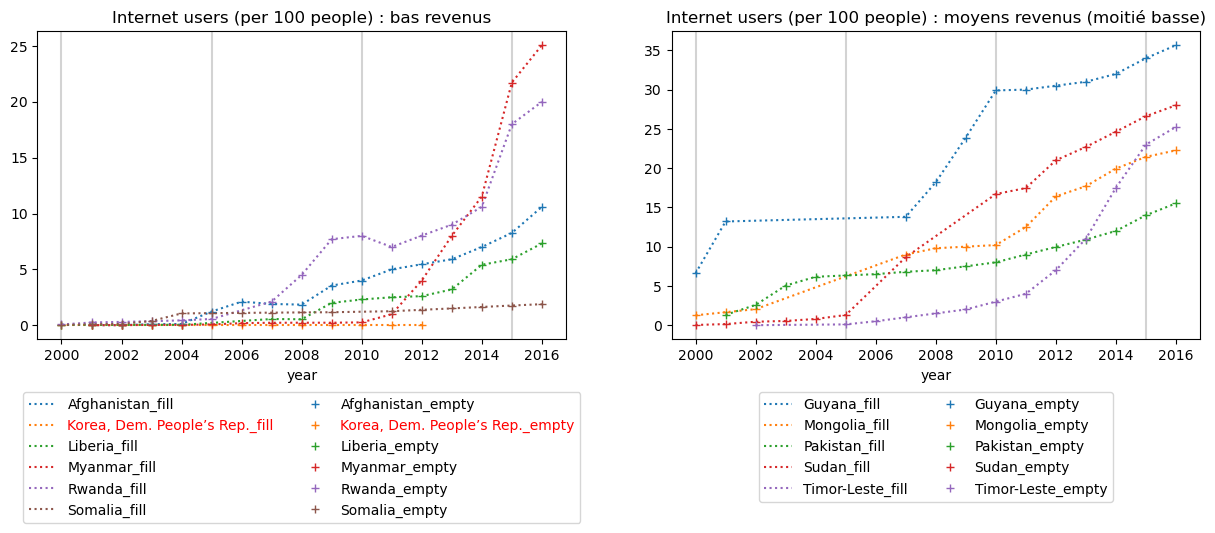

In [187]:
fig = plt.figure(figsize=(15,4))
plot_data_fill_subplot(data_merge_low, years, country_empty_low, country_name_delete_array, 1, 1, indicator_int+' : bas revenus')
plot_data_fill_subplot(data_merge_lower, years, country_empty_lower, country_name_delete_array, 1, 2, indicator_int+' : moyens revenus (moitié basse)')

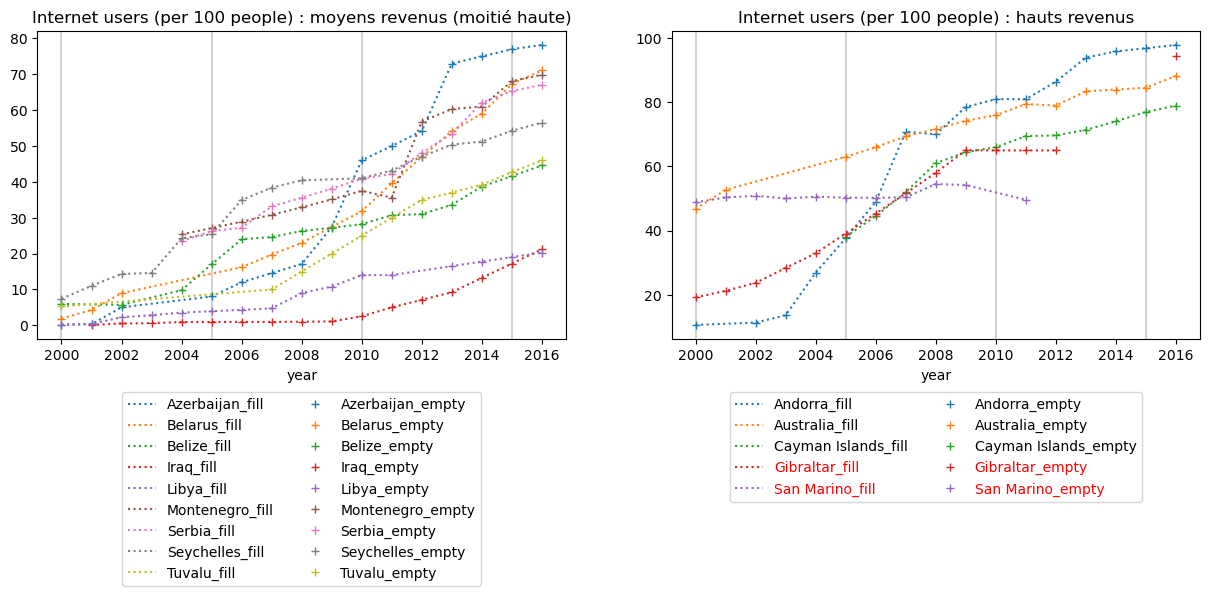

In [188]:
fig = plt.figure(figsize=(15,4))
plot_data_fill_subplot(data_merge_upper, years, country_empty_upper, country_name_delete_array, 1, 1, indicator_int+' : moyens revenus (moitié haute)')
plot_data_fill_subplot(data_merge_high, years, country_empty_high, country_name_delete_array, 1, 2, indicator_int+' : hauts revenus')

### Sélection finale des données

In [189]:
country_selected = country_selected.loc[~country_selected['Country Code'].isin(country_code_delete_array)]
country_high_selected = country_selected.loc[country_selected['Income Group'].isin(income_high_array)]

In [190]:
data_2000_selected = data_2000_country_past.drop(years_delete, axis=1)
data_2000_selected = data_2000_selected.loc[
    data_2000_selected['Country Code'].isin(country_selected['Country Code'])]

### Résumé du traitement

#### Complétude des données

In [191]:
ratio_init = pd.DataFrame(data_2000.isnull().sum()[4:-1]/data_2000.shape[0]).rename(columns={0:'init'})
ratio_indicator = pd.DataFrame(data_2000_indicator.isnull().sum()[4:-1]/data_2000_indicator.shape[0]).rename(columns={0:'indicator'})
ratio_correlation = pd.DataFrame(data_2000_correlation.isnull().sum()[4:-1]/data_2000_correlation.shape[0]).rename(columns={0:'correlation'})
ratio_country = pd.DataFrame(data_2000_country.isnull().sum()[4:-1]/data_2000_country.shape[0]).rename(columns={0:'country'})
ratio_selected = pd.DataFrame(data_2000_selected.isnull().sum()[4:]/data_2000_selected.shape[0]).rename(columns={0:'selected'})
ratio_merge = ratio_correlation.merge(ratio_country, how = 'outer', left_index=True, right_index=True)
ratio_merge = ratio_merge.merge(ratio_selected, how = 'outer', left_index=True, right_index=True)
ratio_merge = ratio_merge.merge(ratio_init, how = 'outer', left_index=True, right_index=True)
ratio_merge = ratio_merge.merge(ratio_indicator, how = 'outer', left_index=True, right_index=True)

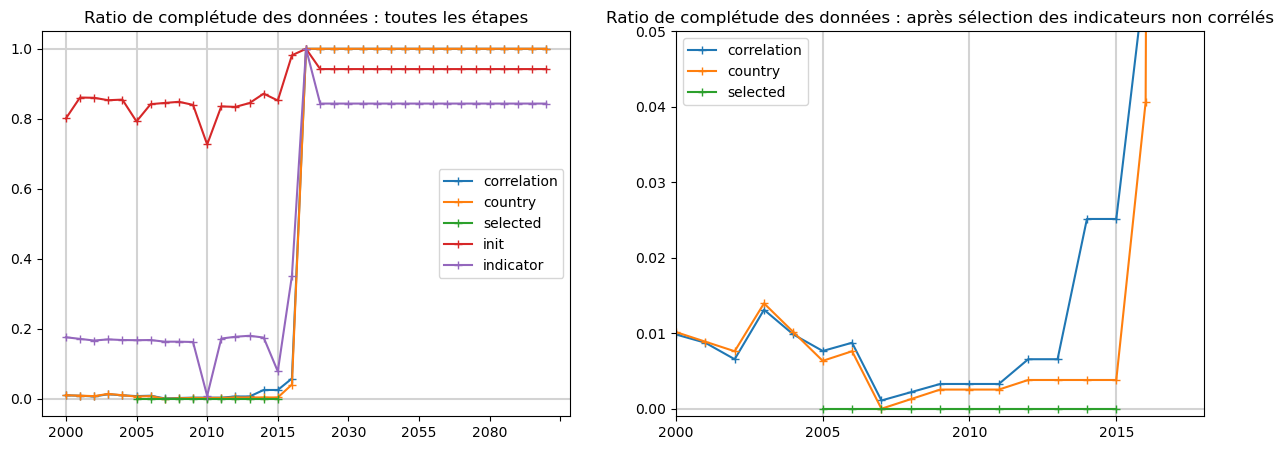

In [192]:
fig = plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
for string in years:
    ax.axvline(x=np.where(ratio_merge.index == string)[0][0], ls='-', color='lightgrey')
ax.axhline(y=0, ls='-', color='lightgrey')
ax.axhline(y=1, ls='-', color='lightgrey')
ratio_merge.plot(style='+-', ax=ax)
ax.set_title('Ratio de complétude des données : toutes les étapes')

ax=plt.subplot(1,2,2)
for string in years:
    ax.axvline(x=np.where(ratio_merge.index == string)[0][0], ls='-', color='lightgrey')
ax.axhline(y=0, ls='-', color='lightgrey')
ax.axhline(y=1, ls='-', color='lightgrey')
ratio_merge.drop(columns=['init', 'indicator'], axis=1).plot(style='+-', ax=ax)
plt.ylim(-0.001,0.05)
plt.xlim(0,np.where(ratio_merge.index == '2020')[0][0])
ax.set_title('Ratio de complétude des données : après sélection des indicateurs non corrélés')

plt.show()

#### Pays non étudiés

In [193]:
data_2000_high_hide = data_2000_high.loc[
    (~data_2000_high['Country Code'].isin(country_high_selected['Country Code']))
    &(data_2000['Indicator Name']=='Population, total'),
    ['Country Code', 'Country Name','2010']
]
data_2000_high_hide = data_2000_high_hide.set_index('Country Code')
data_2000_high_hide = data_2000_high_hide.merge(country, how='inner', on='Country Code')

data_2000_hide = data_2000.loc[
    (~data_2000['Country Code'].isin(country_selected['Country Code']))
    &(data_2000['Indicator Name']=='Population, total'),
    ['Country Code', 'Country Name','2010']
]
data_2000_hide = data_2000_hide.set_index('Country Code')
data_2000_hide = data_2000_hide.merge(country, how='inner', on='Country Code')

In [194]:
data_2000_high_hide_pivot = pd.pivot_table(data_2000_high_hide, values='2010', index='Country Name', columns='Region')
data_2000_hide_pivot = pd.pivot_table(data_2000_hide, values='2010', index='Country Name', columns='Income Group')

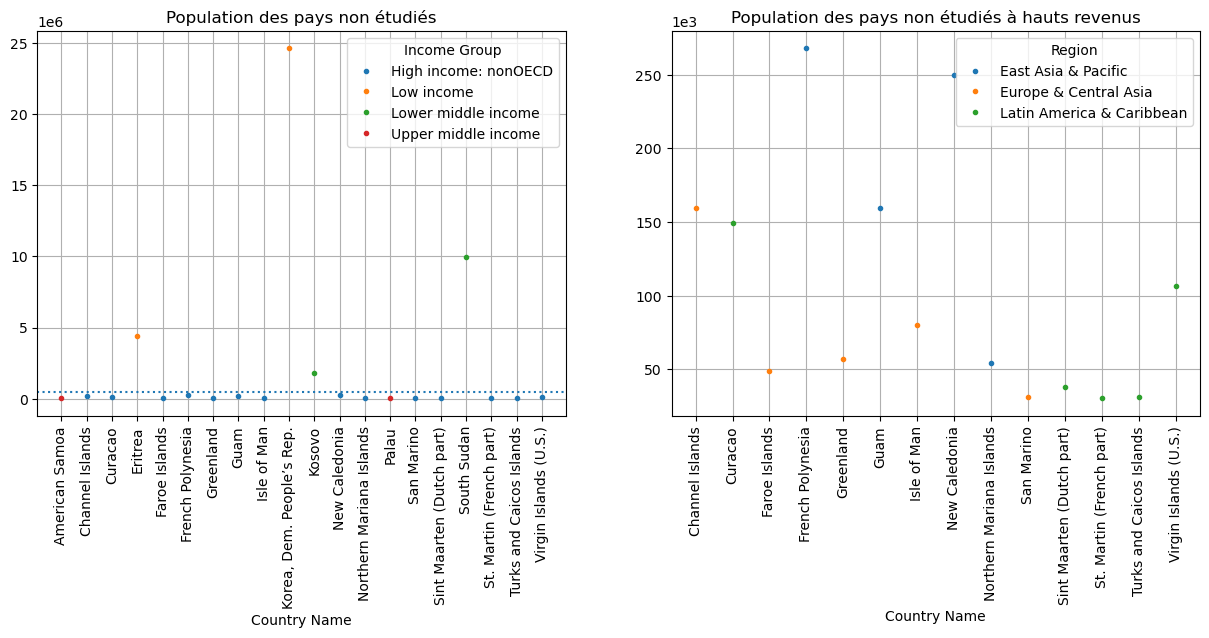

In [195]:
fig = plt.figure(figsize=(15,5))

ax = plt.subplot(1,2,1)
data_2000_hide_pivot.plot(style='.', rot=90, ax=ax)
ax.set_xticks(range(len(data_2000_hide_pivot)))
ax.set_xticklabels(data_2000_hide_pivot.index.tolist())
ax.axhline(y=5e5, linestyle=':')
ax.ticklabel_format(axis='y', scilimits = (6,6))
ax.grid()
ax.set_title('Population des pays non étudiés')

ax = plt.subplot(1,2,2)
data_2000_high_hide_pivot.plot(style='.', rot=90, ax=ax)
ax.set_xticks(range(len(data_2000_high_hide_pivot)))
ax.set_xticklabels(data_2000_high_hide_pivot.index.tolist())
ax.ticklabel_format(axis='y', scilimits = (3,3))
ax.grid()
ax.set_title('Population des pays non étudiés à hauts revenus')

plt.show()

In [196]:
country_process_array = ['South Sudan', 'Eritrea', 'Kosovo', 'Korea, Dem. People\'s Rep.']

## Création des df d'analyse

In [205]:
threshold_array = [0,1,2,4]
pop_threshold = 1e8
pop_interest_low = 2e7
internet_sep_array = [0, 25, 50, 75, 100]

#### Fonctions

In [198]:
def create_colors_legend_array(data, indicator, threshold_array):
    colors_array_tmp = list(colors.TABLEAU_COLORS.values())[0]
    legend_elements = [Line2D([0], [0], marker='o', color='w',
                              label='{:.0f} < '.format(threshold_array[-1])+indicator,
                              markerfacecolor=list(colors.TABLEAU_COLORS.values())[0])]
    for i in range(1,len(threshold_array)+1):
        colors_array_tmp = np.where(data[indicator]<threshold_array[-i], list(colors.TABLEAU_COLORS.values())[i], colors_array_tmp)
        if(i<len(threshold_array)):
            legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                          label='{:.0f} < '.format(threshold_array[-i-1])+indicator+' < {:.0f}'.format(threshold_array[-i]),
                                          markerfacecolor=list(colors.TABLEAU_COLORS.values())[i]))
    legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                          label=indicator+' < {:.0f}'.format(threshold_array[-len(threshold_array)]),
                                          markerfacecolor=list(colors.TABLEAU_COLORS.values())[len(threshold_array)]))
    
    return colors_array_tmp, legend_elements

In [199]:
def calculate_duration_size(data, duration_scale):
    indicator = 'Theoretical duration of upper secondary education (years)'
    mult = duration_scale/(len(data[indicator].unique()))
    ratio = (data[indicator]-data[indicator].min())/(data[indicator].max()-data[indicator].min())
    data['Duration_size']= mult*((len(data[indicator].unique())-1)*ratio+1)
    return data

In [200]:
def melt_pivot_dursize_indicator(data, country_code_array, duration_scale):
    data_return = pd.melt(data.loc[(data['Country Code'].isin(country_code_array))],
                          id_vars=data.columns[:4], var_name='year')
    data_return = pd.pivot_table(data_return, index=['Country Code','year'], columns='Indicator Name', values='value')
    data_return = calculate_duration_size(data_return, duration_scale)
    data_return = data_return.reset_index(level=1)
    return data_return

In [201]:
def create_colors_legend_country(data, country_code_array, country_name_array):
    colors_array_tmp = colors.rgb2hex(colormaps['tab20'].colors[0])
    legend_elements = [Line2D([0], [0], marker='o', color='w',
                              label=country_name_array[0],
                              markerfacecolor=list(colors.TABLEAU_COLORS.values())[0])]
    for i in range(1,len(country_code_array)):
        colors_array_tmp = np.where(data.index==country_code_array[-i], colors.rgb2hex(colormaps['tab20'].colors[i]), colors_array_tmp)
        legend_elements.append(Line2D([0], [0], marker='o', color='w',
                                          label=country_name_array[-i],
                                          markerfacecolor=colors.rgb2hex(colormaps['tab20'].colors[i])))
    
    return colors_array_tmp, legend_elements

In [202]:
def plot_global_subplot_year_u(
    data, indicator_x, indicator_y, indicator_s, indicator_c, threshold_array_colors, x_sep_array, y_sep_array, year_study, unit, ax
):
    for i in x_sep_array:
        ax.axvline(x=i, ls='-', color='lightgrey')
    for i in y_sep_array:
        ax.axhline(y=i, ls='-', color='lightgrey')
    colors_array, legend_elements = create_colors_legend_array(data, indicator_c, threshold_array_colors)
    data.plot(ax=ax, kind='scatter',x=indicator_x, y=indicator_y, s=indicator_s, c=colors_array)
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)
    ax.ticklabel_format(axis='y', scilimits = (unit,unit))
    ax.set_title('Année '+str(year_study)+' (taille en fonction de '+indicator_s+')')

In [203]:
def plot_global_subplot_country(
    data, country_codes, country_names, indicator_x, indicator_y, indicator_s, x_sep_array, y_sep_array, years, title_subplot, unit, ax
):
    data=data.loc[data['year'].isin(years)]
    colors_array, legend_elements = create_colors_legend_country(data, country_codes, country_names)
    for i in x_sep_array:
            ax.axvline(x=i, ls='-', color='lightgrey')
    for i in y_sep_array:
            ax.axhline(y=i, ls='-', color='lightgrey')
    if(len(years)>1):
        data.plot(ax=ax, kind='scatter', x=indicator_x, y=indicator_y, c=colors_array)
    else:
        data.plot(ax=ax, kind='scatter', x=indicator_x, y=indicator_y, s=indicator_s, c=colors_array)
    ax.ticklabel_format(axis='y', scilimits = (unit,unit))
    ax.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)
    ax.set_title(title_subplot)

### Préparation des données

In [197]:
data_2010u = pd.pivot_table(data_2000_selected, values='2010', index='Country Code', columns='Indicator Name')
data_2015u = pd.pivot_table(data_2000_selected, values='2015', index='Country Code', columns='Indicator Name')

In [206]:
data_2010u_middle = data_2010u.loc[data_2010u['Population, total']<pop_threshold]
data_2015u_middle = data_2015u.loc[data_2015u['Population, total']<pop_threshold]

In [209]:
data_2010u_high = data_2010u.loc[data_2010u['Population, total']>pop_threshold]
data_2015u_high = data_2015u.loc[data_2015u['Population, total']>pop_threshold]

In [204]:
data_2010u = calculate_duration_size(data_2010u, 50)
data_2015u = calculate_duration_size(data_2015u, 50)

In [207]:
data_2010u_middle = calculate_duration_size(data_2010u_middle, 100)
data_2015u_middle = calculate_duration_size(data_2015u_middle, 100)

In [210]:
data_2010u_high = calculate_duration_size(data_2010u_high, 150)
data_2015u_high = calculate_duration_size(data_2015u_high, 150)

In [208]:
country_pop_middle = data_2015u.loc[(data_2015u['Population, total']>pop_interest_low)&(data_2015u['Population, total']<pop_threshold)
    &(data_2015u['Internet users (per 100 people)']>50)].index.values
country_pop_middle_names = country.loc[country['Country Code'].isin(country_pop_middle), 'Short Name'].values
data_pop_middle = melt_pivot_dursize_indicator(data_2000_selected, country_pop_middle, 150)

In [211]:
country_pop_high = data_2015u.loc[data_2015u['Population, total']>pop_threshold].index.values
country_pop_high_names = country.loc[country['Country Code'].isin(country_pop_high), 'Short Name'].values
data_pop_high = melt_pivot_dursize_indicator(data_2000_selected, country_pop_high, 150)

### Représentations finales

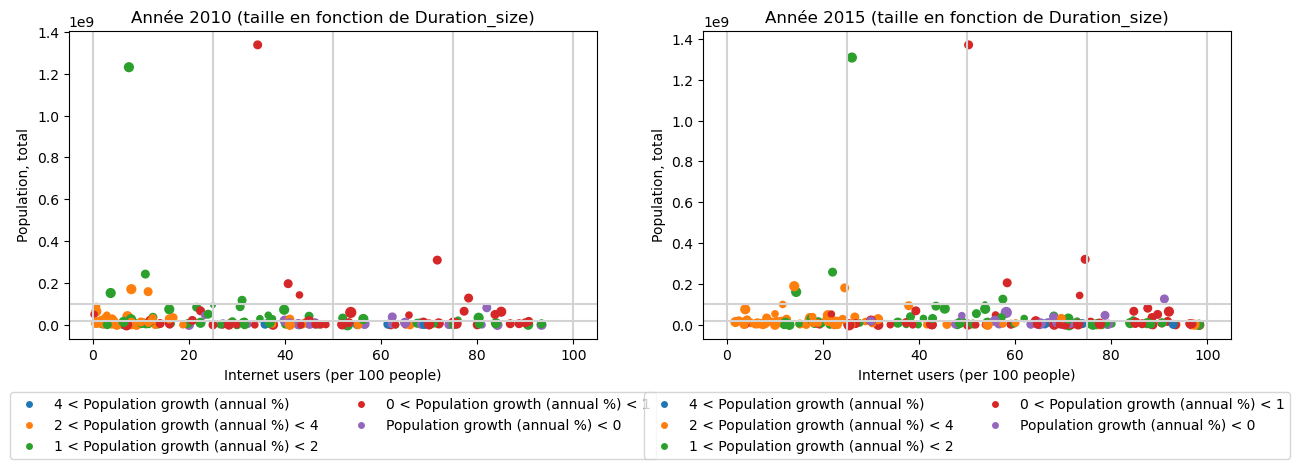

In [212]:
unit = 9
year1 = 2010
year2 = 2015
fig = plt.figure(figsize=(15,4))

ax = plt.subplot(1,2,1)
plot_global_subplot_year_u(data_2010u,'Internet users (per 100 people)', 'Population, total',
                           'Duration_size', 'Population growth (annual %)', threshold_array,
                           internet_sep_array, [pop_threshold, pop_interest_low], year1, unit, ax)

ax = plt.subplot(1,2,2)
plot_global_subplot_year_u(data_2015u,'Internet users (per 100 people)', 'Population, total',
                           'Duration_size', 'Population growth (annual %)', threshold_array,
                           internet_sep_array, [pop_threshold, pop_interest_low], year2, unit, ax)

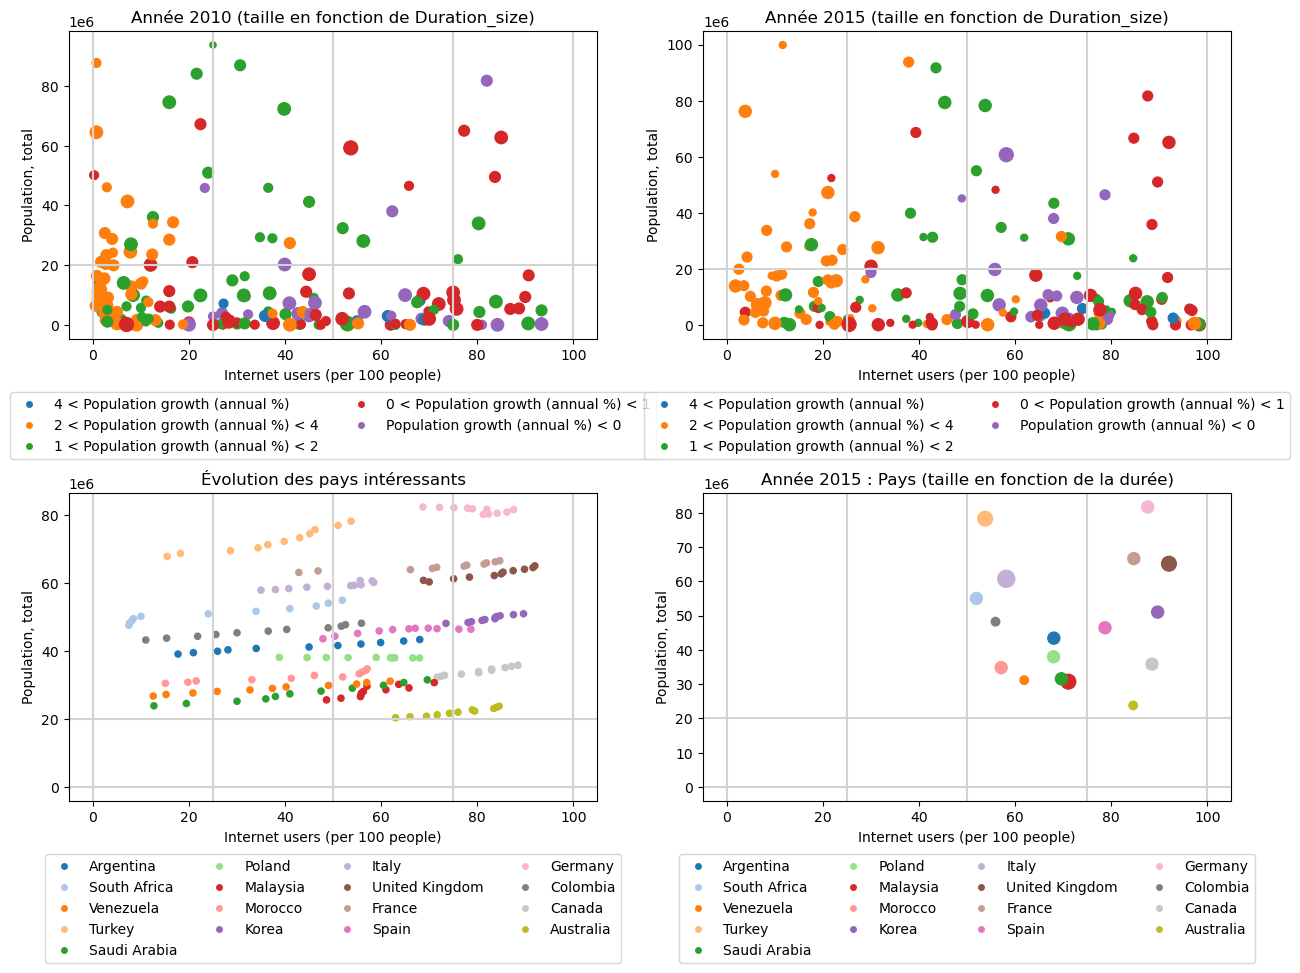

In [213]:
unit = 6
year1 = 2010
year2 = 2015
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
plot_global_subplot_year_u(data_2010u_middle,'Internet users (per 100 people)', 'Population, total',
                    'Duration_size', 'Population growth (annual %)', threshold_array, internet_sep_array, [pop_interest_low], year1, unit, ax)

ax = plt.subplot(2,2,2)
plot_global_subplot_year_u(data_2015u_middle,'Internet users (per 100 people)', 'Population, total',
                    'Duration_size', 'Population growth (annual %)', threshold_array, internet_sep_array, [pop_interest_low], year2, unit, ax)

ax = plt.subplot(2,2,3)
plot_global_subplot_country(data_pop_middle, country_pop_middle, country_pop_middle_names,
                            'Internet users (per 100 people)', 'Population, total', 'Duration_size',
                            internet_sep_array, [0,pop_interest_low], [str(i) for i in range(2000, 2016)],
                            'Évolution des pays intéressants', unit, ax)

ax = plt.subplot(2,2,4)
plot_global_subplot_country(data_pop_middle, country_pop_middle, country_pop_middle_names,
                            'Internet users (per 100 people)', 'Population, total', 'Duration_size',
                            internet_sep_array, [0,pop_interest_low], [str(year2)],
                            'Année 2015 : Pays (taille en fonction de la durée)', unit, ax)

plt.subplots_adjust(hspace=0.5)

plt.show()

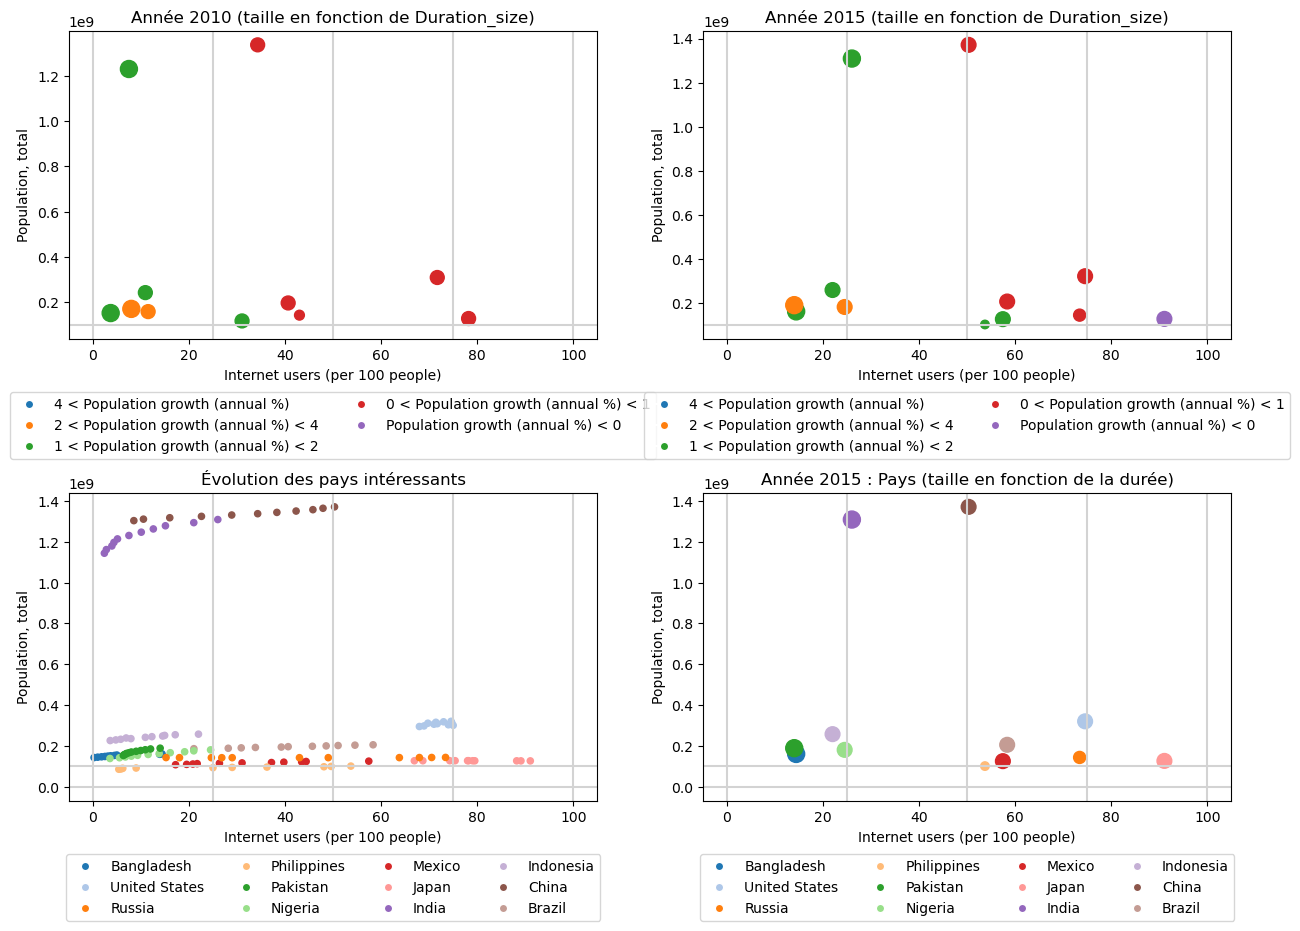

In [215]:
unit = 9
year1 = 2010
year2 = 2015
fig = plt.figure(figsize=(15,10))

ax = plt.subplot(2,2,1)
plot_global_subplot_year_u(data_2010u_high,'Internet users (per 100 people)', 'Population, total',
                    'Duration_size', 'Population growth (annual %)', threshold_array, internet_sep_array, [pop_threshold], year1, unit, ax)

ax = plt.subplot(2,2,2)
plot_global_subplot_year_u(data_2015u_high,'Internet users (per 100 people)', 'Population, total',
                    'Duration_size', 'Population growth (annual %)', threshold_array, internet_sep_array, [pop_threshold], year2, unit, ax)

ax = plt.subplot(2,2,3)
plot_global_subplot_country(data_pop_high, country_pop_high, country_pop_high_names,
                            'Internet users (per 100 people)', 'Population, total', 'Duration_size',
                            internet_sep_array, [0,pop_threshold], [str(i) for i in range(2000, 2016)],
                            'Évolution des pays intéressants', unit, ax)

ax = plt.subplot(2,2,4)
plot_global_subplot_country(data_pop_high, country_pop_high, country_pop_high_names,
                            'Internet users (per 100 people)', 'Population, total', 'Duration_size',
                            internet_sep_array, [0,pop_threshold], [str(year2)],
                            'Année 2015 : Pays (taille en fonction de la durée)', unit, ax)

plt.subplots_adjust(hspace=0.5)

plt.show()

In [ ]:
data_2010u.columns

In [ ]:
scaler = StandardScaler()
data_2010u_scaled = scaler.fit_transform(data_2010u)
data_2010u_scaled = pd.DataFrame(data_2010u_scaled)
plt.imshow(data_2010u_scaled.cov(), interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
data_2015u = pd.concat([
        data_selected_country_past[['Country Code', 'Indicator Name', '2015']],
        data_selected_country_fut[['Country Code', 'Indicator Name', '2015']]
    ])
data_2015u = pd.pivot_table(data_2015u, values='2015', index='Country Code', columns='Indicator Name')

In [ ]:
scaler = StandardScaler()
data_2015u_scaled = scaler.fit_transform(data_2015u)
data_2015u_scaled = pd.DataFrame(data_2015u_scaled)
plt.imshow(data_2015u_scaled.cov(), interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
data_2010u = data_2010u.iloc[:,[1,2,5,7]]
data_2015u = data_2015u.iloc[:,[1,2,5,7]]

In [ ]:
scaler = StandardScaler()
data_2010u_scaled = scaler.fit_transform(data_2010u)
data_2010u_scaled = pd.DataFrame(data_2010u_scaled)
plt.imshow(data_2010u_scaled.cov(), interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
data_2010u.iloc[:,3].hist(bins=20)
plt.show()

In [ ]:
pop_limit_low = 1e4
pop_limit_high = 2.5e4

data_2010u_lowpop = data_2010u.loc[data_2010u.iloc[:,3]<pop_limit_low]
data_2010u_middlepop = data_2010u.loc[
    (data_2010u.iloc[:,3]>=pop_limit_low)&(data_2010u.iloc[:,3]<pop_limit_high)
]
data_2010u_highpop = data_2010u.loc[data_2010u.iloc[:,3]>=pop_limit_high]

In [ ]:
country_low = country_selected.loc[country_selected['Country Code'].isin(data_2010u_lowpop.index)]
country_middle = country_selected.loc[country_selected['Country Code'].isin(data_2010u_middlepop.index)]
country_high = country_selected.loc[country_selected['Country Code'].isin(data_2010u_highpop.index)]

In [ ]:
data_2015u_lowpop = data_2015u.loc[country_low['Country Code']]
data_2015u_middlepop = data_2015u.loc[country_middle['Country Code']]
data_2015u_highpop = data_2015u.loc[country_high['Country Code']]

In [ ]:
data_2010u_lowpop.iloc[:,3].hist(bins=20)
plt.show()

In [ ]:
data_2010u_middlepop.iloc[:,3].plot(kind='bar')
plt.grid()
plt.show()

In [ ]:
data_2015u_middlepop.iloc[:,3].plot(kind='bar')
plt.grid()
plt.show()

In [ ]:
data_2010u_highpop.iloc[:,3].plot(kind='bar')
plt.yticks(range(0, 200000, 25000))
plt.grid()
plt.show()

In [ ]:
data_2015u_highpop.iloc[:,3].plot(kind='bar')
plt.yticks(range(0, 200000, 25000))
plt.grid()
plt.show()

In [ ]:
array_middle_high = ['PAK', 'NGA']
array_high_middle = ['JPN', 'RUS', 'DEU']

In [ ]:
country_hp = pd.concat([
        country_high.loc[~country_high['Country Code'].isin(array_high_middle)],
        country_middle.loc[country_middle['Country Code'].isin(array_middle_high)]
    ])
country_mp = pd.concat([
        country_high.loc[country_high['Country Code'].isin(array_high_middle)],
        country_middle.loc[~country_middle['Country Code'].isin(array_middle_high)]
    ])

In [ ]:
country_mphi = country_mp.loc[country_mp['Income Group']=='High income: OECD']
country_mpoi = country_mp.loc[country_mp['Income Group']!='High income: OECD']

In [ ]:
data_2010u_hp = data_2010u.loc[country_hp['Country Code']]
data_2010u_mphi = data_2010u.loc[country_mphi['Country Code']]
data_2010u_mpoi = data_2010u.loc[country_mpoi['Country Code']]

In [ ]:
plt.figure(figsize=(15,10))
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
markers = ['.', 'o', 'D', '+', 'v']
for j in range(0,2):
    indicator = data_2010u_hp.columns[j]
    ax = plt.subplot(2,3, j+1)
    i=0
    for str in country_hp['Country Code']:
        ax.scatter(data_years_past_mod,
                    data_selected_country_past.loc[(data_selected_country_past['Indicator Name'] == indicator)
                                                   &(data_selected_country_past['Country Code'] == str)].iloc[:,4:-1],
                   color=colors[i], label=str)
        i=i+1
    ax.set_title(indicator)

ax = plt.subplot(2,3, 3)
data_2010u_hp.iloc[:,2].plot(kind='bar', color=colors)
ax.set_title(data_2010u_hp.columns[2])

indicator = data_2010u_highpop.columns[3]
ax = plt.subplot(2,1,2)
i=0
for str in country_hp['Country Code'].values:
    ax.scatter(data_years_fut,
                data_selected_country_fut.loc[(data_selected_country_fut['Indicator Name'] == indicator)
                                               &(data_selected_country_fut['Country Code'] == str)].iloc[:,4:-1],
               marker=markers[k], color=colors[i], label=str)
    i=i+1
ax.set_title(indicator)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
markers = ['.', 'o', 'D', '+', 'v']
for j in range(0,2):
    indicator = data_2010u_mphi.columns[j]
    ax = plt.subplot(2,3, j+1)
    i=0
    for str in country_mphi['Country Code']:
        ax.scatter(data_years_past_mod,
                    data_selected_country_past.loc[(data_selected_country_past['Indicator Name'] == indicator)
                                                   &(data_selected_country_past['Country Code'] == str)].iloc[:,4:-1],
                   color=colors[i], label=str)
        i=i+1
    ax.set_title(indicator)

ax = plt.subplot(2,3, 3)
data_2010u_mphi.iloc[:,2].plot(kind='bar', color=colors)
ax.set_title(data_2010u_mphi.columns[2])

indicator = data_2010u_mphi.columns[3]
ax = plt.subplot(2,1,2)
i=0
for str in country_mphi['Country Code'].values:
    ax.scatter(data_years_fut,
                data_selected_country_fut.loc[(data_selected_country_fut['Indicator Name'] == indicator)
                                               &(data_selected_country_fut['Country Code'] == str)].iloc[:,4:-1],
               marker=markers[k], color=colors[i], label=str)
    i=i+1
ax.set_title(indicator)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
markers = ['.', 'o', 'D', '+', 'v']
for j in range(0,2):
    indicator = data_2010u_mpoi.columns[j]
    ax = plt.subplot(2,3, j+1)
    i=0
    for str in country_mpoi['Country Code']:
        ax.scatter(data_years_past_mod,
                    data_selected_country_past.loc[(data_selected_country_past['Indicator Name'] == indicator)
                                                   &(data_selected_country_past['Country Code'] == str)].iloc[:,4:-1],
                   color=colors[i], label=str)
        i=i+1
    ax.set_title(indicator)

ax = plt.subplot(2,3, 3)
data_2010u_mpoi.iloc[:,2].plot(kind='bar', color=colors)
ax.set_title(data_2010u_mpoi.columns[2])

indicator = data_2010u_mpoi.columns[3]
ax = plt.subplot(2,1,2)
i=0
for str in country_mpoi['Country Code'].values:
    ax.scatter(data_years_fut,
                data_selected_country_fut.loc[(data_selected_country_fut['Indicator Name'] == indicator)
                                               &(data_selected_country_fut['Country Code'] == str)].iloc[:,4:-1],
               marker=markers[k], color=colors[i], label=str)
    i=i+1
ax.set_title(indicator)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
data_2010u_lowpop.iloc[:,0].hist(bins=20)
plt.show()

In [ ]:
data_2010u.iloc[:,1].hist(bins=20)
plt.show()

In [ ]:
valeurs = []
labels = []
for str in data_2010u_lowpop.columns.values:
    scaler = StandardScaler()
    valeurs.append(scaler.fit_transform(data_2010u_lowpop[[str]]))
    labels.append(str)
plt.boxplot(valeurs, vert=False)
plt.yticks(range(1,data_2010u_lowpop.shape[1]+1), labels)
plt.show()

In [ ]:
len(data_2010u_lowpop.columns)

In [ ]:
plt.figure(figsize=(15,10))

for i in range (len(data_2010u_lowpop.columns)):
    valeurs = []
    labels = []

    ax=plt.subplot(2,2,i+1)
    for str in country_low['Region'].value_counts().index:
        valeurs.append(data_2010u_lowpop.loc[
                list(country_low.loc[
                        country_low['Region'] == str,
                        'Country Code']),
                          data_2010u_lowpop.columns.values[i]])
        labels.append(str)

    valeurs.append(data_2010u_lowpop[[data_2010u_lowpop.columns.values[i]]])
    labels.append('Total')

    ax.boxplot(valeurs, vert=False)
    plt.yticks(range(1,len(country_low['Region'].value_counts().index)+2), labels)
    if ((i==1)|(i==3)):
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
    ax.set_title(data_2010u_lowpop.columns.values[i])

plt.show()

In [ ]:
plt.figure(figsize=(15,10))

for i in range (len(data_2010u_lowpop.columns)):
    valeurs = []
    labels = []

    ax=plt.subplot(2,2,i+1)
    for str in country_low['Income Group'].value_counts().index:
        valeurs.append(data_2010u_lowpop.loc[
                list(country_low.loc[
                        country_low['Income Group'] == str,
                        'Country Code']),
                          data_2010u_lowpop.columns.values[i]])
        labels.append(str)

    valeurs.append(data_2010u_lowpop[[data_2010u_lowpop.columns.values[i]]])
    labels.append('Total')

    ax.boxplot(valeurs, vert=False)
    plt.yticks(range(1,len(country_low['Income Group'].value_counts().index)+2), labels)
    if ((i==1)|(i==3)):
        ax.yaxis.set_label_position("right")
        ax.yaxis.tick_right()
    ax.set_title(data_2010u_lowpop.columns.values[i])

plt.show()

In [ ]:
valeurs = []
labels = []
for str in country_low['Region'].value_counts().index:
    valeurs.append(data_2010u_lowpop.loc[
            list(country_low.loc[
                    (country_low['Region'] == str)&(country_low['Income Group'].isin(income_high_array)),
                    'Country Code']),
                      'GNI per capita, PPP (current international $)'])
    labels.append(str)
plt.boxplot(valeurs, vert=False)
plt.yticks(range(1,data_2010u_lowpop.shape[1]+1), labels)
plt.show()

In [ ]:
plt.plot(data_2010u_lowpop.iloc[:,0], data_2010u_lowpop.iloc[:,2], "o")
plt.show()

In [ ]:
plt.plot(data_2010u_lowpop.iloc[:,3], data_2010u_lowpop.iloc[:,4], "o")
plt.show()

In [ ]:
plt.plot(data_2010u_lowpop.iloc[:,6], data_2010u_lowpop.iloc[:,7], "o")
plt.show()

In [ ]:
scaler = StandardScaler()
data_2010u_lowpop_scaled = scaler.fit_transform(data_2010u_lowpop)
data_2010u_lowpop_scaled = pd.DataFrame(data_2010u_lowpop_scaled)
plt.imshow(data_2010u_lowpop_scaled.cov(), interpolation='nearest')
plt.colorbar()
plt.show()

In [ ]:
scaler = StandardScaler()
data_2010u_highpop_scaled = scaler.fit_transform(data_2010u_highpop)
data_2010u_highpop_scaled = pd.DataFrame(data_2010u_highpop_scaled)
plt.imshow(data_2010u_highpop_scaled.cov(), interpolation='nearest')
plt.show()

## Autres

In [ ]:
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(1):
    plt.scatter(data_years,
            data_selected_country_def.loc[data_selected_country_def['Indicator Name']==indicator_name_progress[i]].iloc[:,4:-1].isnull().sum(),
               color = colors[i], label = series_selected['Indicator Name'].iloc[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP0'], color='b', label = indicator_name_progress[0])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP1'], color='r', label = indicator_name_progress[1])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP2'], color='g', label = indicator_name_progress[2])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP3'], color='m', label = indicator_name_progress[3])
plt.scatter(country_selected_def.index.values, country_selected_def['nb_val_INP4'], color='c', label = indicator_name_progress[4])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
data_test = data_selected_country_def.loc[(data_selected_country_def['Indicator Name'] == 'Expenditure on tertiary as % of government expenditure on education (%)')&
                                 (data_selected_country_def['nb_val']>15)]
data_test

In [ ]:
plt.scatter(data_years, data_test.iloc[0,4:-1], color='b')
plt.scatter(data_years, data_test.iloc[1,4:-1], color='r')
plt.show()

In [ ]:
plt.scatter([int(numeric_string) for numeric_string in data_selected_country.iloc[:,4:-1].columns],
            data_selected_country_indicatorTest.iloc[:,4:-1].isnull().sum())

### Valeurs dupliquées

In [ ]:
print("Valeurs dupliquées DF country ('Country Code') : %i"%country['Country Code'].duplicated().sum())
print("Valeurs dupliquées DF series ('Series Code') : %i"%series['Series Code'].duplicated().sum())


In [ ]:
series['Topic'].value_counts()

In [ ]:
series['Unit of measure'].unique()

In [ ]:
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_std'])
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_mean'],
            color='red')
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_q1'],
            color='green')
plt.scatter(series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_country'],
            series.loc[(series['nb_val_mean']>20)&(series['nb_country']>200)&(series['Topic']=="Secondary"), 'nb_val_min'],
            color='orange')

In [ ]:
plt.scatter(series['nb_country'], series['nb_val_max'])
plt.scatter(series['nb_country'], series['nb_val_mean'], color='red')
plt.xlim(220, 250)
plt.ylim(30,50)

In [ ]:
plt.scatter(series['nb_val_mean'], series['nb_val_std']/25)
plt.scatter(series['nb_val_mean'], series['nb_country']/245, color='red')

In [ ]:
series.loc[(series['nb_country']>230) & (series['nb_val_mean']>30), 'Topic']

In [ ]:
plt.scatter(series.loc[series['nb_val_std']<10, 'nb_country'], series.loc[series['nb_val_std']<10, 'nb_val_std'])
plt.scatter(series.loc[series['nb_val_std']<10, 'nb_country'], series.loc[series['nb_val_std']<10, 'nb_val_mean'], color='red')

In [ ]:
plt.scatter(series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_country'],
            series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_val_std'])
plt.scatter(series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_country'],
            series.loc[(series['nb_val_std']<10)&(series['nb_country']>200), 'nb_val_mean'],
            color='red')

In [ ]:
series.loc[(series['nb_val_std']<10)&(series['nb_country']>200)&(series['nb_val_mean']>20), 'Topic'].value_counts()

In [ ]:
series['Topic'].value_counts()

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(country.isnull().sum().values, np.arange(len(country.isnull().sum().index.values)))
plt.yticks(np.arange(len(country.isnull().sum().index.values)), country.isnull().sum().index.values)
plt.plot(country_dim[0]*np.ones(((country_dim[1],1))), np.arange(len(country.isnull().sum().index.values)))
plt.show()

## Tertiary (1)

In [ ]:
series_filter = series.loc[(series['nb_val_q1']>0)
           &(series['nb_country']>150)
           &(series['Topic']=="Tertiary")
           &(series['nb_val_mean']>10)]
plt.figure(figsize=(10,8))
plot_series_stat(series_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_min'],
                 [])

In [ ]:
series_high_filter = series_high.loc[(series['nb_val_q1']>0)
           &(series_high['nb_country']>60)
           &(series_high['Topic']=="Tertiary")
           &(series_high['nb_val_mean']>10)]
plt.figure(figsize=(10,8))
plot_series_stat(series_high_filter,
                 'Indicator Name',
                 ['nb_val_std','nb_val_mean', 'nb_val_q1', 'nb_val_d1', 'nb_val_min'],
                 [])

In [ ]:
indicator_name_array_tertiary = ["Enrolment in tertiary education, all programmes, both sexes (number)"]

In [ ]:
series_selected['Indicator Name'].values

In [ ]:
indicator_name_def = ['Internet users (per 100 people)',
       'GNI per capita, PPP (current international $)',
       'Projection: Population in thousands by highest level of educational attainment. Lower Secondary. Total',
       'Projection: Population in thousands by highest level of educational attainment. Upper Secondary. Total',
       'Theoretical duration of upper secondary education (years)',
       'Population growth (annual %)',
       'Population of the official age for secondary education, both sexes (number)',
       'Population of the official age for upper secondary education, both sexes (number)']

In [ ]:
indicator_name_progress = ['Enrolment in secondary education, both sexes (number)']

In [ ]:
colors = ['b', 'r', 'g', 'm', 'c', 'k', 'y']
for i in range(1):
    plt.scatter(data_years,
            data_selected_country.loc[data_selected_country['Indicator Name']==indicator_name_progress[i]].iloc[:,4:-1].isnull().sum(),
               color = colors[i], label = indicator_name_progress[i])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [ ]:
country_selected = country_selected.reset_index(drop=True)
country_selected.head()

In [ ]:
country_selected['nb_val_INP0'] = country_selected.apply(
    lambda row:data_selected_country.loc[(data_selected_country['Country Code'] == row[0])&
                                         (data_selected_country['Indicator Name'] == indicator_name_progress[0]),
                                         'nb_val'].sum(), axis=1)

In [ ]:
country_selected_INP10 = country_selected.loc[(country_selected['nb_val_INP0']<5)]

In [ ]:
country_selected_INP10

In [ ]:
plt.scatter(country_selected_INP10.index.values,
            country_selected_INP10['nb_val_INP0'],
            color='b', label = indicator_name_progress[0])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [ ]:
len(country_selected_INP10.index)

In [ ]:
country_selected_INP10['Region'].value_counts()

In [ ]:
country_selected_def = country_selected.loc[(country_selected['nb_val_INP0']>=5)]

In [ ]:
len(country_selected_def)

In [ ]:
country_selected_def['Region'].value_counts()

In [ ]:
print("ratio de pays conservés")
for string in country_selected_def['Region'].value_counts().index:
    print('{} : {}'.format(string, country_selected_def['Region'].value_counts()[string]/country_high['Region'].value_counts()[string]))

In [ ]:
data_selected_country_def = data_selected_country.loc[data_selected_country['Country Code'].isin(country_selected_def['Country Code'])]